<a href="https://colab.research.google.com/github/catastropiyush/simulations/blob/main/Advanced_Computational_Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python/FORTRAN/C++ Material** \\
*If you find anything useful put the links here in this box* \\
https://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html \\
https://www.johndcook.com/blog/2020/02/02/stiff-differential-equations/  \\
https://github.com/lukepolson/youtube_channel/tree/main/Python%20Tutorial%20Series  \\
https://www.cs.toronto.edu/~jlucas/teaching/csc411/lectures/lec10_handout.pdf \\

https://www.pdfdrive.com/numerical-methods-of-mathematics-implemented-in-fortran-e190128359.html \\

https://web.mat.bham.ac.uk/R.W.Kaye/numerics/2npcontents.html \\

FORTRAN Programs
https://www.physics.unlv.edu/~pang/cp_f77.html


# New Section

In [ ]:
import pandas as pd

num_rows    = 108
num_columns = 40

df_h = pd.DataFrame(index=range(num_rows), columns=[f'Column{i}' for i in range(1, num_columns + 1)])
df   = pd.read_csv('C342Y-set1-cmap.dat')

for index, row in df.iterrows():
    input_string = row[0]
    split_input = input_string.split()
    values = [float(value) for value in split_input]

    if len(values) == num_columns:
        df_h.loc[index] = values
    else:
        print(f"Number of values does not match the number of columns in df_h for index {index}.")

df_h = df_h.astype(float)
matrix_data = df_h.values
# Create a heatmap using plt.imshow
plt.figure(figsize=(3,7))
plt.imshow(matrix_data, cmap='RdPu', aspect='auto', interpolation='none')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = [1, 1.5, 6, 2, 3]
y = [4, 7, 12, 8, 7]
X = np.asarray([np.ones(5), x]).T
print(X)

[[1.  1. ]
 [1.  1.5]
 [1.  6. ]
 [1.  2. ]
 [1.  3. ]]


In [ ]:
from numpy.linalg import inv
beta_0, beta_1 = inv(X.T @ X) @ X.T @ y
print(beta_0, beta_1)

4.028481012658228 1.3227848101265818


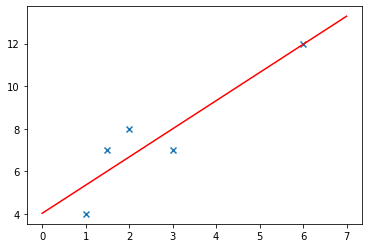

In [ ]:
x_lin_space = np.linspace(0, 7, 100)
y_hat = beta_0 + beta_1 * x_lin_space
plt.scatter(x, y, marker='x')
plt.plot(x_lin_space, y_hat, color='r')

In [ ]:
!     FORTRAN PROGRAM TO COMPUTE SIN(X), USING THE SERIES
PROGRAM sinseries
  IMPLICIT NONE
  DOUBLE PRECISION :: sum, x, a,angle
  character(len=*), parameter :: OUT_FILE = 'data.txt' ! Output file.
  INTEGER :: k

  PRINT *, "give x: "
  READ *, angle
  x=0.0174532925*angle

  sum = 0.0d0
  k   = 0
  a   = x ! initial value of a is the term for n=0.
  open (1,action='write', file=OUT_FILE,status='replace')
  DO
     sum = sum + a
     !     next term is ...
     k = k+1
     a = a * (-x*x) / ((2*k+1)*(2*k))
     write (1, *) k,sum
     IF (sum + a == sum) EXIT
  ENDDO

 close (1)
  PRINT * , k
  PRINT *, "The sum of Taylor series for SIN at ", x, " is ", sum
  PRINT *, "The correct value is ", SIN(x)

END PROGRAM sinseries


In [ ]:
# plot.plt
set term x11 font "-*-helvetica-medium-r-*-*-14-*-*-*-*-*-*-*"
#set title "Projectile"
set xlabel "x"
set ylabel "y"
m="data.txt"
plot m using 1:2 w l lw 2 lc rgb'#FF69B4',m using 1:3 w l lw 2 lc rgb'#FF8243'

In [ ]:
!     FORTRAN PROGRAM TO COMPUTE COS(X), USING THE SERIES
!         1 - X^2/2! + X^4/4! + ... + (-1)^k X^(2k)/(2k)!
PROGRAM cosseries
  IMPLICIT NONE
  DOUBLE PRECISION :: sum, x, a,angle
  character(len=*), parameter :: OUT_FILE = 'data.txt' ! Output file.
  INTEGER :: k

  PRINT *, "give x: "
  READ *, angle
  x=0.0174532925*angle

  sum = 0.0d0
  k   = 0
  a   = 1.0d0 ! initial value of a is the term for n=0.
  open (1,action='write', file=OUT_FILE,status='replace')
  DO
     sum = sum + a
     !     next term is ...
     k = k+1
     a = a * (-x*x) / (2*k*(2*k-1))
     IF (sum + a == sum) EXIT
  ENDDO

  PRINT *, "The sum of Taylor series for COS at ", x, " is ", sum
  PRINT *, "The correct value is ", COS(x)

END PROGRAM cosseries


In [ ]:
PROGRAM MILL
! Program to fit the Millikan experimental data to a linear curve
! p(x) = a*x+b directly.  One can find a and b from partial D/partial
! a = 0 and partial D/partial b = 0 with D = sum (p(x_i)-f(x_i))**2.
! The result is a = (c1*c3-c4*n)/(c1**2-c2*n) and b = (c1*c4-c2*c3)
! /(c1**2-c2*n) with n being the number of points, c1 = sum x_i, c2
! = sum x_i**2, c3 = sum f(x_i), and c4 = sum x_i*f(x_i).
! Copyright (c) Tao Pang 1997.
!
  IMPLICIT NONE
  INTEGER, PARAMETER :: N=15
  INTEGER :: I
  REAL :: C1,C2,C3,C4,C,A,B
  REAL, DIMENSION (N) :: X,F
  DATA X /4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0, &
          12.0,13.0,14.0,15.0,16.0,17.0,18.0/
  DATA F /6.558,8.206,9.880,11.50,13.14,14.81,16.40,18.04, &
          19.68,21.32,22.96,24.60,26.24,27.88,29.52/
!
  C1 = 0.0
  C2 = 0.0
  C3 = 0.0
  C4 = 0.0
  DO I = 1, N
    C1 = C1+X(I)
    C2 = C2+X(I)*X(I)
    C3 = C3+F(I)
    C4 = C4+F(I)*X(I)
  END DO
  C = C1*C1-C2*N
  A = (C1*C3-C4*N)/C
  B = (C1*C4-C2*C3)/C
  WRITE (6, "('The fundamental charge is 'F6.4,'+-'F6.4)") A,ABS(B)
END PROGRAM MILL

In [ ]:
a=[-0.019,0.040         ,-0.040,0.044       ,  -0.137        , -0.044         ,-0.718        , -2.223      ,  -2.591       ,  -3.277       ,  -1.127      ,   -2.102       ,  -0.321        , -0.786,2.043 ,        -0.268       ,  -4.316      ,   -2.967         -2.561,0.216        , -0.603         -0.086,0.034         -0.048         -0.021,0.156         -0.028,0.025      ,   -0.033,0.055       ,  -0.108   ,      -0.115       , -1.032       ,  -7.179         -4.534     ,    -2.406       ,  -1.215       ,  -1.163     ,    -0.196         -1.277,2.011       ,  -0.085       ,  -0.076      ,   -0.464     ,    -0.181  ,      -0.357       ,  -0.954      ,   -0.054,0.006      ,   -0.028       ,  -0.013,0.719         -0.035,0.007         -0.029,0.034       ,  -0.067       ,  -0.136     ,    -0.160         -6.284         -5.441         -4.037       ,  -0.533        , -0.250       ,  -0.070         -1.333,1.118      ,   -0.004       ,  -0.134    ,     -0.035     ,    -0.050    ,     -0.866      ,   -0.955       ,  -0.028,0.020         -0.021    ,     -0.019,0.937
-0.037       ,  -0.010    ,     -0.017      ,   -0.015,0.033    ,     -0.098,0.296       ,  -1.429,0.092,0.181     ,    -0.192       ,  -0.054      ,   -0.024      ,   -1.259,   0.959,0.019         -0.024       ,  -0.006         -0.004   ,      -0.530    ,     -0.986       ,  -0.017         -0.007         -0.009         -0.009,0.824,  0.001       ,  -0.005,0.015     ,    -0.026,0.031         -0.088,0.116    ,     -0.177,0.018     ,    -0.009,0.008      ,   -0.036        , -0.018 , 2.137   ,     -0.977      ,  -22.601    ,    -10.323   ,      -6.597      ,    1.563      ,   -0.000     ,    -0.101      ,    0.038        , -0.010       ,  -0.097      ,   -0.638 ,-1.123  ]

In [ ]:
print(sum(a))

-99.99699999999999


In [ ]:
leu=[2.137 ,-1.557 ,-3.532 ,-3.560,-2.006, -22.669]

In [ ]:
print(sum(leu)/len(leu))

-5.1978333333333335


In [ ]:
program averager
implicit none
real(kind=8),allocatable ::a(:),b(:),c(:),aver(:)
character,allocatable :: d(:)
integer::N,i,num

N = 0
OPEN (1, file ='data.txt')
DO
    READ (1,*, END=10)
    N = N + 1
END DO
10 CLOSE (1)

allocate (a(N),b(N),c(N),d(N))  !allocate the arrays from the text file
!Reading the coefficients from the file

open (unit = 1, file ='data.txt', status ='old')
do i = 1,N
     read (1,*) a(i),b(i),c(i),d(i)
end do
close (1)

do i = 1,N
 print*,(a(i)+b(i)+c(i))/3
end do
end program averager


#Research Thesis

https://arxiv.org/pdf/1202.0374.pdf \
https://www.researchgate.net/publication/222319739_Formation_of_molecular_hydrogen_on_a_graphite_surface_via_an_Eley-Rideal_mechanism \
https://aip.scitation.org/doi/10.1063/1.1896353 \
https://aip.scitation.org/doi/pdf/10.1063/1.1781118 \
https://aip.scitation.org/doi/pdf/10.1063/1.1896353 \


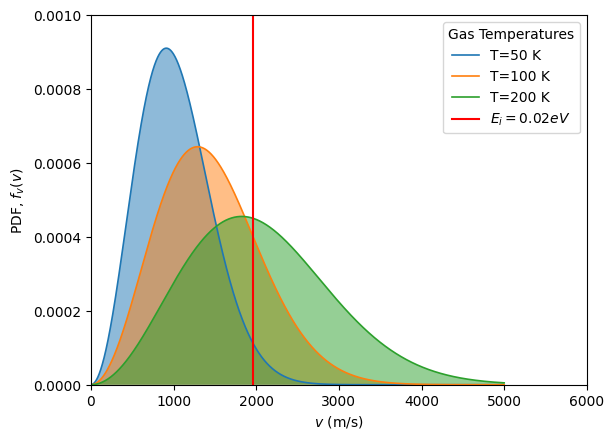

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def MB_speed(v,m,T):
    """ Maxwell-Boltzmann speed distribution for speeds """
    kB = 1.38e-23
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

fig = plt.figure()
ax = fig.add_subplot(111)
v = np.arange(0,5E3,1)
amu = 1.66e-27
mass = 1*amu

for T in [50,100,200]:
    fv = MB_speed(v,mass,T)
    ax.plot(v,fv,label='T='+str(T)+' K',lw=1.2)
    ax.fill_between(v, fv, 0, alpha=.5)
plt.ylim([0,0.001])
plt.xlim([0,6000])
#plt.axvline(4000,color='red',label=r'$E_i=0.3eV$')
plt.axvline(1957,color='red',label=r'$E_i=0.02eV$')
ax.legend(loc=0,title='Gas Temperatures')
ax.set_xlabel(r'$v$ (m/s)')
ax.set_ylabel(r'PDF, $f_v(v)$')
plt.draw()

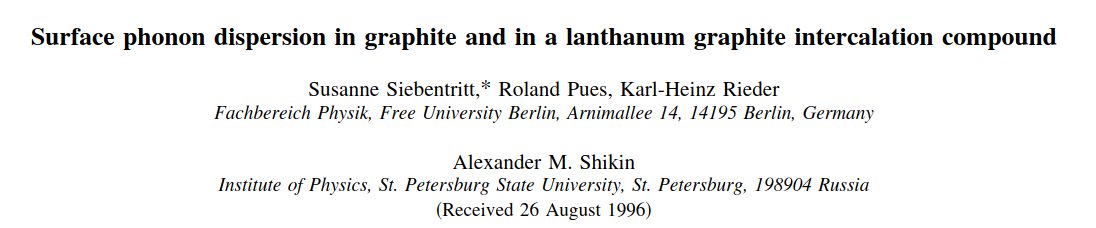

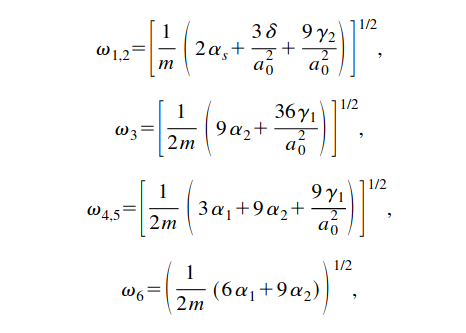

In [ ]:
#Siebentritt et.al 1997
#Graphite Frequencies at K point
import numpy as np

a_s = 0 ; a_0 = 1.42E-10 ; a_1 = 364 ; a_2 =  62
y_1 = 8.30E-19; y_2 = 3.38E-19
m   = 12*1.66E-27;delta = 3.17E-19
def Graphite_K(a_s,a_0,a_1,a_2,y_1,y_2,m,delta):   #Siebentritt et.al 1996
#ZA/ZO mode
  w12  = ((2*a_s+((3*delta)/(a_0*a_0))+((9*y_2)/(a_0**2)))*(1/m))**(0.5)
#SH mode
  w3   =  ((1/(2*m))*((9*a_2)+((36*y_1)/(a_0**2))))**(0.5)
#LO/LA mode
  w45  = ((1/(2*m))*((3*a_1)+(9*a_2)+((9*y_1)/(a_0**2))))**(0.5)
  w6   =  ((1/(2*m))*((6*a_1)+(9*a_2)))**(0.5)
  print("Siebentritt et.al K")
  print("ZA,ZO =","{:e}".format(w12/(2*np.pi)))
  print("SH    =","{:e}".format(w3/(2*np.pi)))
  print("LO    =","{:e}".format(w45/(2*np.pi)))
  print("LA    =","{:e}".format(w6/(2*np.pi)))
  print("")

def Graphite_TM(a_s,a_0,a_1,a_2,y_1,y_2,m,delta):      #Aizawa et.al 1990
#ZA_M
  w_ZAM = ((((12*y_2)/(a_0**2))+((16*delta)/(a_0**2))*(1/m)))**(0.5)
#ZA_T
  w_ZAT = (a_s/m)**(0.5)
#ZO_T
  w_ZOT = ((((108*y_2)/(a_0**2))+(a_s))*(1/m))**(0.5)
#ZO_M
  w_ZOM = ((((48*y_2)/(a_0**2))+(a_s))*(1/m))**(0.5)
  print("Aizawa et.al M")
  print("ZA,T =","{:e}".format(w_ZAT/(2*np.pi)))
  print("ZA,M =","{:e}".format(w_ZAM/(2*np.pi)))
  print("ZO,T =","{:e}".format(w_ZOT/(2*np.pi)))
  print("ZO,M =","{:e}".format(w_ZOM/(2*np.pi)))
  print("")
Graphite_K(0,1.42E-10,344,62,9.30E-19,3.08E-19,12*1.66E-27,4.17E-19) # Siebentritt et. al 1996
Graphite_K(0,1.42E-10,364,62,8.30E-19,3.38E-19,12*1.66E-27,3.17E-19) # Aizawa et.al 1990
Graphite_TM(0,1.42E-10,364,62,8.30E-19,3.38E-19,12*1.66E-27,3.17E-19)

Siebentritt et.al K
ZA,ZO = 1.592803e+13
SH    = 3.755596e+13
LO    = 3.570492e+13
LA    = 4.082976e+13

Siebentritt et.al K
ZA,ZO = 1.586853e+13
SH    = 3.601301e+13
LO    = 3.584147e+13
LA    = 4.175363e+13

Aizawa et.al M
ZA,T = 0.000000e+00
ZA,M = 1.788450e+13
ZO,T = 4.797968e+13
ZO,M = 3.198645e+13



In [ ]:
import numpy as np
def Graphite_TM(a_s,a_0,a_1,a_2,y_1,y_2,m,delta):      #Aizawa et.al 1990
#ZA_M
  w_ZAM = ((((12*y_2)/(a_0**2))+((16*delta)/(a_0**2))*(1/m)))**(0.5)
#ZA_T
  w_ZAT = (a_s/m)**(0.5)
#ZO_T
  w_ZOT = ((((108*y_2)/(a_0**2))+(a_s))*(1/m))**(0.5)
#ZO_M
  w_ZOM = ((((48*y_2)/(a_0**2))+(a_s))*(1/m))**(0.5)
  print("Aizawa et.al M")
  print("ZA,T =","{:e}".format(w_ZAT/(2*np.pi)))
  print("ZA,M =","{:e}".format(w_ZAM/(2*np.pi)))
  print("ZO,T =","{:e}".format(w_ZOT/(2*np.pi)))
  print("ZO,M =","{:e}".format(w_ZOM/(2*np.pi)))
  print("")
Graphite_TM(0,1.42E-10,364,62,8.30E-19,3.38E-19,12*1.66E-27,3.17E-19)

Aizawa et.al M
ZA,T = 0.000000e+00
ZA,M = 1.788450e+13
ZO,T = 4.797968e+13
ZO,M = 3.198645e+13



In [ ]:
#Siebentritt et.al 1997
#Graphite Frequencies at K point
import numpy as np
def Graphite_K(a_s,a_0,a_1,a_2,y_1,y_2,m,delta):   #Siebentritt et.al 1996
#ZA/ZO mode
  part  =(2*a_s)+((3*delta)/(a_0**2))+((9*y_2)/(a_0**2))
  w12  =((1/m)*(part))**(0.5)
  print("ZA,ZO =","{:e}".format(w12/(2*np.pi)))
  print("")
Graphite_K(0,1.42E-10,344,62,9.30E-19,3.08E-19,1.99E-26,4.17E-19) # Siebentritt et. al 1996

ZA,ZO = 1.593603e+13



$$\hbar=6.582119569\times10^{-16} eV\:s$$
$$\hbar\omega=0.11eV=2.66\times10^{13}\:Hz$$

In [ ]:
#Kerwin et.al 2006
h=6.582*1E-16
w = 0.11/(6.582*2*3.14)    #hw_Q
#w = 0.07/(6.582*2*3.14)    #hw_c
#w=0.11/(6.582)
scientific_notation="{:e}".format(w*1E+16)
print(scientific_notation)

2.661186e+13


In [ ]:
import numpy as np

a_s = 0 ; a_0 = 1.42E-10 ; a_1 = 364 ; a_2 =  62
y_1 = 8.30E-19; y_2 = 3.38E-19
m   = 12*1.66E-27;delta = 3.17E-19
def Graphite_K(a_s,a_0,a_1,a_2,y_1,y_2,m,delta):   #Siebentritt et.al 1996
#ZA/ZO mode
  w12  = ((2*a_s+((3*delta)/(a_0*a_0))+((9*y_2)/(a_0**2)))*(1/m))**(0.5)
#SH mode
  w3   =  ((1/(2*m))*((9*a_2)+((36*y_1)/(a_0**2))))**(0.5)
#LO/LA mode
  w45  = ((1/(2*m))*((3*a_1)+(9*a_2)+((9*y_1)/(a_0**2))))**(0.5)
  w6   =  ((1/(2*m))*((6*a_1)+(9*a_2)))**(0.5)
  print("Siebentritt et.al K")
  print("ZA,ZO =","{:e}".format(w12/(2*np.pi)))
  print("SH    =","{:e}".format(w3)/(2*np.pi))
  print("LO    =","{:e}".format(w45)/(2*np.pi))
  print("LA    =","{:e}".format(w6)/(2*np.pi))
  print("")
  Graphite_K(0,1.42E-10,344,62,9.30E-19,3.08E-19,12*1.66E-27,4.17E-19) # Siebentritt et. al 1996

In [ ]:
def Gauss(x, mu, sigma, A = 1):
    gaussian = A/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)
    return gaussian

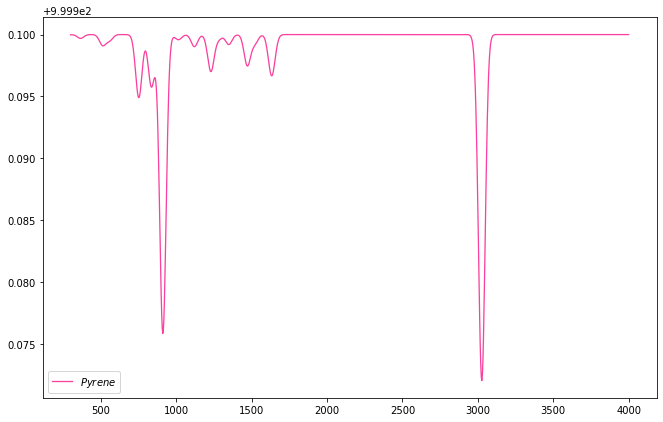

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x,y = np.loadtxt('Pyrene.out.ir.dat', unpack=True)
plt.figure(figsize = (11, 7))
plt.plot(x,y, linewidth=1.3, color='#F9429E',label=r'$Pyrene$')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Q=np.linspace(-5,5,100)


In [ ]:
#Wavenumber to Hz converter
wave=[752.28,835.20,911.88,1229.90,1472.27,1630.99,3023.98]
N=len(wave)
for i in range(0,N):
  Freq=wave[i]*29.9792458 #GHz
  scientific_notation = "{:e}".format(Freq*1e+09)
  print(scientific_notation)

2.255279e+13
2.503867e+13
2.733747e+13
3.687147e+13
4.413754e+13
4.889585e+13
9.065664e+13


In [ ]:
#Wavenumber to Hz converter
wave=[0,900,2000,3000,4000]
N=len(wave)
for i in range(0,N):
  Freq=wave[i]*29.9792458 #GHz
  scientific_notation = "{:e}".format(Freq*1e+09)
  print(scientific_notation)

0.000000e+00
2.698132e+13
5.995849e+13
8.993774e+13
1.199170e+14


In [ ]:
atom=(2*3.14*2.69E+13)/(4.13E+16)
print(atom)

0.004090363196125908


In [ ]:
print(atom**2)

1.673107107622135e-05


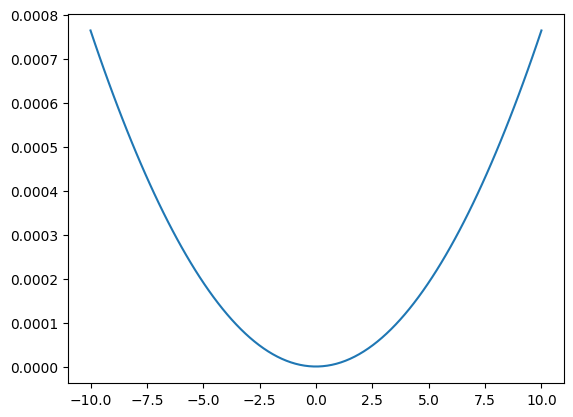

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Q=np.linspace(-10,10,100)
def funcQ(Q):
   m_q    = 36.0321
   omega2 = 4.242330E-07
   return (0.5*m_q*omega2)*Q**2
plt.plot(Q,funcQ(Q))

# Encryption

<BarContainer object of 19 artists>

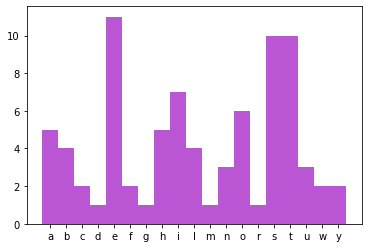

In [ ]:
#25 Feb 2023
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

a_string='thisisoneofthebestthingsinlifethatweareabletodosomuchbuteatbicuitsaswellsoyesyes'
#text_file = open("Comet69P.txt", "r")
 #read whole file to a string
#a_string = text_file.read()
#close file
#text_file.close()

col =Counter(a_string)
myKeys = list(col.keys())
myKeys.sort()
sort_col = {i: col[i] for i in myKeys}
#print(sorted_dict)
#plt.hist(collection)
plt.bar(sort_col.keys(), sort_col.values(), width=1, color='#BA55D3')

In [ ]:
def CaesarCipher(message, shift):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    #make sure the message we work with is lowercased to match symbols in alphabet
    message = message.lower()
    result = ""
    #run on each letter in the message
    for letter in message:
        if letter in alphabet:
            #find the index of the letter in the alphabet
            index = alphabet.find(letter)
            #determine the shift
            index = (index + shift)%(len(alphabet))
            #deals with wrap around if index is greater than 26 or less than 0
            if index < 0:
                index = index + len(alphabet)
            #adds letter to result
            result = result + alphabet[index]
        #if the symbol isn't a letter (like punctuation), just print that
        else:
            result = result + letter
    #prints what the text would read if it were decrypted using each possible shift
    #go through the list and figure out which shift gives you a sensible message
    return result

print(CaesarCipher("hello",1))
print(CaesarCipher("ifmmp",25))

ifmmp
hello


In [ ]:
def CaesarCipherSolver(message):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    #make sure the message we work with is lowercased to match symbols in alphabet
    message = message.lower()

    for key in range(len(alphabet)):

            result = ""
            #run on each letter in the message
            for letter in message:
                if letter in alphabet:
                    #find the index of the letter in the alphabet
                    index = alphabet.find(letter)
                    #determine the shift
                    index = (index + key)%(len(alphabet))

                    #deals with wrap around if index is greater than 26 or less than 0
                    if index < 0:
                        index = index + len(alphabet)

                    #adds letter to result
                    result = result + alphabet[index]

                #if the symbol isn't a letter (like punctuation), just print that
                else:
                    result = result + letter
            #prints what the text would read if it were decrypted using each possible shift
            #go through the list and figure out which shift gives you a sensible message
           print("Shift #%s: %s" %(26-key, result))



print CaesarCipherSolver("n xtqaji ymj uwtgqjr!"


In [ ]:
h=6.582*1E-16
w = 0.11/6.582
scientific_notation="{:e}".format(w*1E+16)
print(scientific_notation)

1.671225e+14


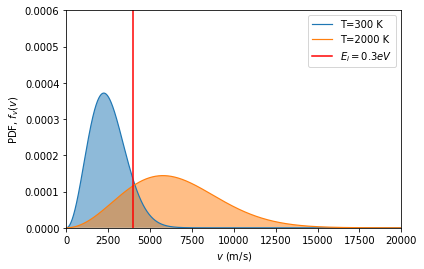

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def MB_speed(v,m,T):
    """ Maxwell-Boltzmann speed distribution for speeds """
    kB = 1.38e-23
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

fig = plt.figure()
ax = fig.add_subplot(111)
v = np.arange(0,3E4,1)
amu = 1.66e-27
mass = 1*amu

for T in [300,2000]:
    fv = MB_speed(v,mass,T)
    ax.plot(v,fv,label='T='+str(T)+' K',lw=1.2)
    ax.fill_between(v, fv, 0, alpha=.5)
plt.ylim([0,0.0006])
plt.xlim([0,20000])
plt.axvline(4000,color='red',label=r'$E_i=0.3eV$')
ax.legend(loc=0)
ax.set_xlabel(r'$v$ (m/s)')
ax.set_ylabel(r'PDF, $f_v(v)$')
plt.draw()

In [ ]:
The net result, for H2 formation, is that the reaction is ef-
ficient only in a narrow window of dust temperatures, ranging
typically from 11 K to 19 K, depending on the values of desorp-
tion and diffusion barriers, as also pointed out by Chang et al.
(2006). Such a restricted range of grain temperatures is difficult
to reconcile with H2 observations towards dense PDRs (Habart
et al. 2004, 2005; Cazaux & Tielens 2004, 2010; Habart et al.
2011) where the dust temperatures reach values close to and even
larger than 30 K. As a result, new scenario have been suggested
such as the reaction between a physisorbed and a chemisorbed
atom (Habart et al. 2004) or reactions between two chemisorbed
atoms (Cazaux & Tielens 2004, 2010)

In [ ]:
Pyrene with H adsorbed and another H coming in

In [ ]:
27
Coordinates from ORCA-job PyH
  C   -4.76907817233880     -6.16033114168611     -0.03810096127989
  C   -3.37883466481090     -6.15812933152763      0.09251395893354
  C   -2.67337729181350     -4.94582395268373      0.23093574303778
  C   -3.39818252289852     -3.73183178080697      0.24533726271594
  C   -4.80307215979414     -3.72674987861971      0.08548956236243
  C   -5.47738978925500     -4.95695168227021     -0.04963873569977
  C   -1.22303961318810     -4.90436519390418      0.30560344185988
  C   -2.67630707699867     -2.43541997536902      0.53703418139935
  C   -1.19344692694081     -2.45785927120973      0.22178993287342
  C   -0.53053774438083     -3.72090489880719      0.25326149315019
  C   -0.54323917529624     -1.24764650014292      0.00345808938777
  C   -1.25939120773813     -0.04161462612337     -0.12924264811505
  C   -2.66825433620582     -0.03182784803475     -0.14649167132438
  C   -3.40557441278874     -1.19192804255947      0.06644450146268
  C   -4.82616920462260     -1.26200911501749     -0.04656895354734
  C   -5.50160539589171     -2.45507424902210      0.01024206576572
  H   -6.59151330233591     -2.47264485969461     -0.08922014323390
  H   -5.37921931497980     -0.33138951632329     -0.21539757872160
  H   -0.68131976454187     -5.85539894281648      0.31849188841941
  H   -5.30496479388114     -7.10886308444578     -0.14280210314482
  H   -2.82354030875602     -7.10152532846301      0.08066069165911
  H   -6.56518330513330     -4.95978071154921     -0.17283603233953
  H   0.56377133368946     -3.73323122580988      0.20023317238907
  H   -0.71409626439043      0.88990886315646     -0.30789562001603
  H   -3.19703687877898      0.89933523321567     -0.37807718785256
  H   0.54600319121167     -1.24299573621827     -0.11386086588362
  H   -2.70807432714113     -2.35220344326695      1.66293237574218


In [ ]:
#Kerwin et.al
def V(zh,zc):
  return C1(zc)

#Computational Methods

**Scipy**
https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/16-scipy.html

$$I=\int_{a}^{b} f(x)dx$$

In [ ]:
from math import cos, exp, pi
from scipy.integrate import quad
# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2
# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)
print("The numerical result is {:f} (+-{:g})".format(res, err))

Text(0, 0.5, 'y(t)')

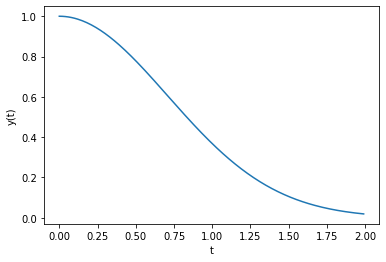

In [ ]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as N

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

t = N.arange(a, b, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, y0, t)      #actual computation of y(t)

import pylab            #plotting of results
pylab.plot(t, y)
pylab.xlabel('t'); pylab.ylabel('y(t)')

https://campus.datacamp.com/courses/statistical-simulation-in-python/basics-of-randomness-simulation?ex=3

In [ ]:
# Initialize seed and parameters
np.random.seed(123)
lam, size_1, size_2 = 5, 3, 1000

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(____, ____)
samples_2 = np.random.poisson(____, ____)
answer_1 = abs(____)
answer_2 = abs(____)

print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))

In [ ]:
from sympy import *
init_printing(use_unicode=True)

In [ ]:
Matrix([[1, -1], [3, 4], [0, 2]])

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦

In [ ]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N

⎡5⎤
⎢ ⎥
⎣3⎦

In [ ]:
np.shape(M)

In [ ]:
M.row(1)

[3  2  1]

In [ ]:
M = M.row_insert(1, Matrix([[2, 2,1]]))

In [ ]:
M = M.row_del(1)

In [ ]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
M,N,M+N

⎛⎡1   3⎤  ⎡0  3⎤  ⎡1   6 ⎤⎞
⎜⎢     ⎥, ⎢    ⎥, ⎢      ⎥⎟
⎝⎣-2  3⎦  ⎣0  7⎦  ⎣-2  10⎦⎠

In [ ]:
C=M+N
C.rref()

⎛⎡1  0⎤        ⎞
⎜⎢    ⎥, (0, 1)⎟
⎝⎣0  1⎦        ⎠

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
Eq(x, y)

In [ ]:
Eq(x**2, 1)

In [ ]:
solveset(Eq(x**2, 1), x)

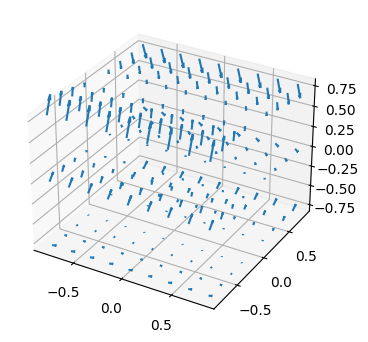

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                     np.arange(-0.8, 1, 0.2),
                     np.arange(-0.8, 1, 0.8))
u = 0
v = y**2
w = -2*y*z - y
ax.quiver(x, y, z, u, v, w, length=0.1)
#ax.axis('off')
plt.show()

**Numerov Algorithm**

$$\Psi_{n+1}=\frac{2(1-\frac{5}{12}l^2k^2_{n+1})\Psi_{n}-(1+\frac{1}{12}l^2k^2_{n-1})\Psi_{n-1}}{1+\frac{1}{12}l^2k^2_{n+1}}$$

Text(0.5, 0, '$\\tilde{x}$')

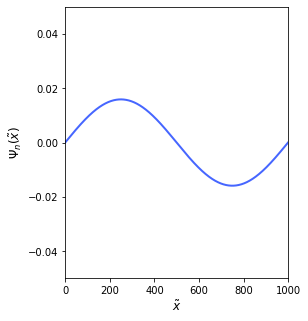

In [ ]:
#Last update piyush 4 Oct 2022 Particle in a box
import numpy as np
import matplotlib.pyplot as plt
N   = 1000
psi = np.zeros(N)              # wavefunction
x   = np.linspace(0,1000,N)    # grid points
v   = (-1)*np.ones(N)
g2  = 200            #gamma square
ep  = -0.802053       # intiial energy
k2  = g2*(ep-v)
l2 = (1.0/(N-1))**2
def wavefunction(ep,N):   #Numerov Algorithm
   psi[0] = 0
   psi[1] = 1e-4
   for i in range(2,N):
      psi[i] = (2*(1-(5.0/12)*l2*k2[i-1])*psi[i-1]-(1+(1.0/12)*l2*k2[i-2])*psi[i-2])/(1+(1.0/12)*l2*k2[i])
   return psi
plt.figure(figsize=(4,5));
plt.xlim([0,N]); plt.ylim([-0.05,0.05])
#plt.plot(x,wavefunction(-0.95065,N),linewidth=2.0,color='magenta')
#plt.plot(x,wavefunction(-0.80260,N),linewidth=2.0,color='cornflowerblue')
plt.plot(x,wavefunction(ep,N),linewidth=2.0,color='#4666FF')
plt.ylabel(r'$\Psi_{n}(\tilde{x})$',fontsize=12)
plt.xlabel(r'$\tilde{x}$',fontsize=12)

In [ ]:
#LAst update Piyush Eigenstate calculator

import numpy as np
import matplotlib.pyplot as plt
N   = 1000; psi = np.zeros(N)
x   = np.linspace(0,1000,N)
g2  = 200 ; v   = (-1)*np.ones(N) ; ep  = -0.95
k2  = g2*(ep-v) ; l2  = (1.0/(N-1))**2

def wavefunction(psi,k2,N):
   psi[0] = 0
   psi[1] = 1e-4
   for i in range(2,N):
      psi[i] = (2*(1-(5.0/12)*l2*k2[i-1])*psi[i-1]-(1+(1.0/12)*l2*k2[i-2])*psi[i-2])/(1+(1.0/12)*l2*k2[i])
   return psi

def epsilon(eps,deps,N):   #takes trial energy,change in energy
    k2 = g2*(eps-v)        #updates k each time
    wavefunction(psi,k2,N)
    P1 = psi[N-1]
    eps = eps+deps

    while(abs(deps) > 1e-12):
       k2 = g2*(eps-v)
       wavefunction(psi,k2,N)
       P2 = psi[N-1]

       if P1*P2<0:
          deps = -deps/2.0

       eps = eps+deps
       P1=P2
    return eps
epsilon(-1,1e-3,N)   #energy must be greater than -1 which is the potential well depth

-0.9506519779963418

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 0, '$\\tilde{x}$')

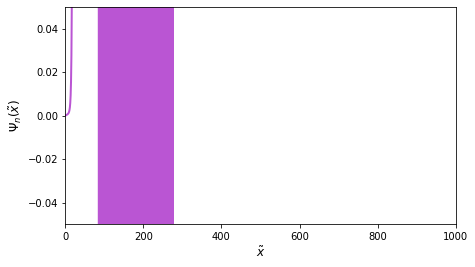

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N   = 1000
psi = np.zeros(N)
v   = np.zeros(N)
x   = np.linspace(0,1000,N)
for i in range(len(x)):
  v[i] = 8*(x[i]-0.5)**2-1
  k2[i]= g2*(ep-v[i])
g2  = 200
ep  = -0.91
l2 = (1.0/(N-1))**2
def wavefunction(ep,N):
   psi[0] = 0
   psi[1] = 1e-4
   for i in range(2,N):
      psi[i] = (2*(1-(5.0/12)*l2*k2[i-1])*psi[i-1]-(1+(1.0/12)*l2*k2[i-2])*psi[i-2])/(1+(1.0/12)*l2*k2[i])
   return psi
plt.figure(figsize=(7,4));
plt.xlim([0,N]); plt.ylim([-0.05,0.05])
plt.plot(x,wavefunction(ep,N),linewidth=2.0,color='mediumorchid')
plt.ylabel(r'$\Psi_{n}(\tilde{x})$',fontsize=12)
plt.xlabel(r'$\tilde{x}$',fontsize=12)

**Spline Interpolation**

In [ ]:
https://jmahaffy.sdsu.edu/courses/f16/math541/beamer/spline-04.pdf
https://blog.scottlogic.com/2020/05/18/cubic-spline-in-python-and-alteryx.html

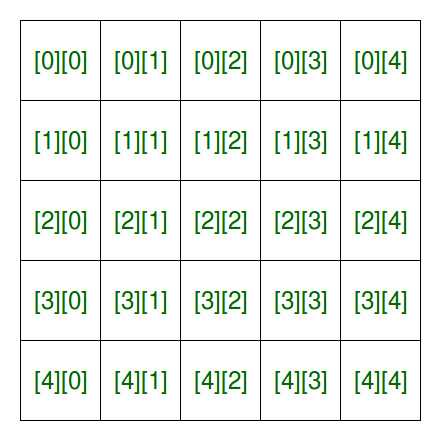

In [ ]:
#Spline Interpolation Piyush Oct 12,2022
#3:33 spline ho gaya
import numpy as np
import matplotlib.pyplot as plt

#input data
x=[1,3,4,5,9] ; y=[2,5,8,7,15]
N=len(x)-1

h =[0]*N   ; H =[0]*N   #x diff and y diff
b =[0]*N   ; d =[0]*N

for i in range(0,N):
  h[i]=x[i+1]-x[i]
  H[i]=y[i+1]-y[i]
A = np.zeros((5,5))
print("h");print(h)
print("H");print(H)

A[0][0]=1; A[N,N]=1 #Boundary conditions

#Constructing A
for w in range(1,N):
  A[w][w+1]   = h[w]
for k in range(0,N-1):
  A[k+1][k]   = h[k]
for l in range(1,N):
  A[l][l] = 2*(A[l][l-1]+A[l][l+1])
print("Matrix A");print(A)

B=np.zeros((5,1))
for s in range(1,len(B)-1):
  B[s][0]=3*((H[s]/h[s])-(H[s-1]/h[s-1]))
print("Matrix B");print(B)

#Thomas Algorithm to solve tridiagonal matrix
gamma  = [0]*N
rho    = [0]*(N+1)
gamma[0] = A[0][1]/A[0][0]
rho[0]   = B[0][0]/A[0][0]

for o in range(1,N):
  gamma[o]=A[o][o+1]/(A[o][o]-gamma[o-1]*A[o][o-1])
for z in range(1,N+1):
   rho[z]=(B[z][0]-rho[z-1]*A[z][z-1])/(A[z][z]-gamma[z-1]*A[z][z-1])
print("rho");print(rho)
print("gamma"); print(gamma)

c=[0]*(N+1)
c[-1]=rho[-1]
for t in reversed(range(0,N)):
  c[t]=rho[t]-gamma[t]*c[t+1]
print("c");print(c)

#calculate coefficients
b = [(H[g]/h[g])-(h[g]/3)*(2*c[g]+c[g+1]) for g in range(0,N)]
print("b");print(b)
d = [(c[e+1]-c[e])/(3*h[e]) for e in range(0,N)]
print("d");print(d)

h
[2, 1, 1, 4]
H
[3, 3, -1, 8]
Matrix A
[[ 1.  0.  0.  0.  0.]
 [ 2.  6.  1.  0.  0.]
 [ 0.  1.  4.  1.  0.]
 [ 0.  0.  1. 10.  4.]
 [ 0.  0.  0.  0.  1.]]
Matrix B
[[  0. ]
 [  4.5]
 [-12. ]
 [  9. ]
 [  0. ]]
rho
[0.0, 0.75, -3.326086956521739, 1.2656249999999998, 0.0]
gamma
[0.0, 0.16666666666666666, 0.2608695652173913, 0.4107142857142857]
c
[0.0, 1.359375, -3.6562499999999996, 1.2656249999999998, 0.0]
b
[0.59375, 3.3125, 1.0156249999999996, -1.3749999999999991]
d
[0.2265625, -1.671875, 1.6406249999999998, -0.10546874999999999]


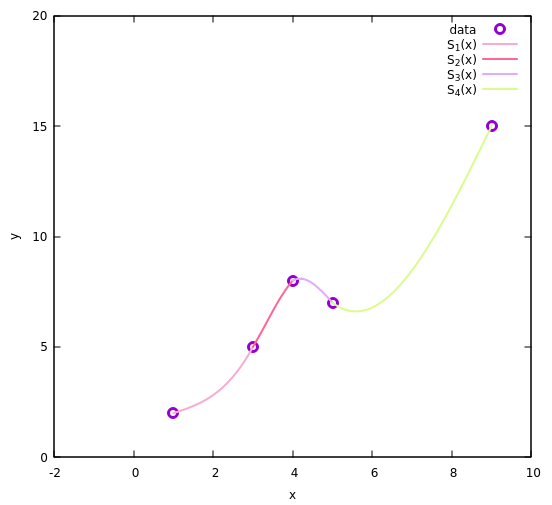

In [ ]:
-157.2322-(-157.2941)

0.06189999999998008

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 3, 5],
    [2, -1, -3],
    [4, 5, -1]])
B = np.array([[14],[3],[7]])
N=len(A)
k1 = [(A[i][0]/A[0][0]) for i in range(1,N)]
for i in range(0,N):
  A[1][i] = A[1][i] - k1[0]*A[0][i]
  A[2][i] = A[2][i] - k1[1]*A[0][i]
print("A")
print(A)

print("B");print(B)
#B[0][0]=(-1)*(B[1][0]-k1[0]*B[0][0])
B[1][0]=(-1)*(B[1][0]-k1[0]*B[0][0])
B[2][0]=(-1)*(B[2][0]-k1[1]*B[1][0])
B[2][0]=B[2][0]-k2[0]*B[1][0]

print("B");print(B)
#k2 = [(A[k][1]/A[1][1]) for k in range(2,N)]

for l in range(0,N):
  A[1][l]=-A[1][l]
  A[2][l]=-A[2][l]
#print(A)
for j in range(1,N):
  A[2][j]=A[2][j]-k2[0]*A[1][j]
print("Triangularization")
print(A)

x      = [0]*(len(A))
x[-1]  = B[N-1][0]/A[N-1][N-1]
x

A
[[  1   3   5]
 [  0  -7 -13]
 [  0  -7 -21]]
B
[[14]
 [ 3]
 [ 7]]
B
[[14]
 [25]
 [68]]
Triangularization
[[ 1  3  5]
 [ 0  7 13]
 [ 0  0  8]]


[0, 0, 8.5]

In [ ]:
B[1][0]

2

In [ ]:
# Program to add two matrices using list comprehension
X = [[12,7,3],
    [4 ,5,6],
    [7 ,8,9]]
Y = [[5,8,1],
    [6,7,3],
    [4,5,9]]
result = [[X[i][j] + Y[i][j]  for j in range(len(X[0]))] for i in range(len(X))]
for r in result:
   print(r)

[17, 15, 4]
[10, 12, 9]
[11, 13, 18]


In [ ]:
Z = np.array([[1, 4, 5, 12],
    [-5, 8, 9, 0],
    [-6, 7, 11, 19]])
print("Z[:,0] =",Z[:,0]) # First Column
print("Z[0] =", Z[0]) # First Row
print(Z)

Z[:,0] = [ 1 -5 -6]
Z[0] = [ 1  4  5 12]
[[ 1  4  5 12]
 [-5  8  9  0]
 [-6  7 11 19]]


In [ ]:
Z[1][3]

0

In [ ]:
# gaussian
import matplotlib.pyplot as plt
import numpy as np

R=np.linspace()

def f(R):
  return

In [ ]:
import numpy as np
def harmonic_trial(x,alpha):
  return (alpha/np.pi)**0.5*np.exp(-alpha*(x**2))
def local_en(x,alpha):
 return alpha+(0.5-2*alpha**2)*x**2

def distribution (x , alpha ):
 return harmonic_trial(x,alpha)**2

def variational_int (alpha,Npoints=1000) :
   l = 3*(1/(2*alpha))**0.5
   X  = np.linspace(-l,l,Npoints)
   N  =  0
   su = 0
   for x in X:
      if np.random.random()<distribution(x,alpha):
          su+=local_en(x,alpha)
          N +=1
   return su / N

da =0.05
alphas = []
energies = []
alpha0 =0.1
N = 20
for i in range(N):
  alpha = alpha0 +i*da
  alphas.append(alpha)
  energies.append(variational_int(alpha,10000))
for i in range(N):
  print(energies[i])
plt.plot(i)
#display((r'The Ground State Energy is: {}$\ hbar \ omega$'.format(E)))

1.394917404239539
0.9337531137882938
0.7358251683117742
0.6316131922209297
0.5690955966950497
0.5285026005459518
0.5230525892156015
0.5008197327084596
0.5
0.5033534271862539
0.5040043528599405
0.5053198464743175
0.5197012113593767
0.5463290790262547
0.5420702605181706
0.5636315809465866
0.589964400710694
0.6414260444364486
0.6276109283767791
0.6158861336392951


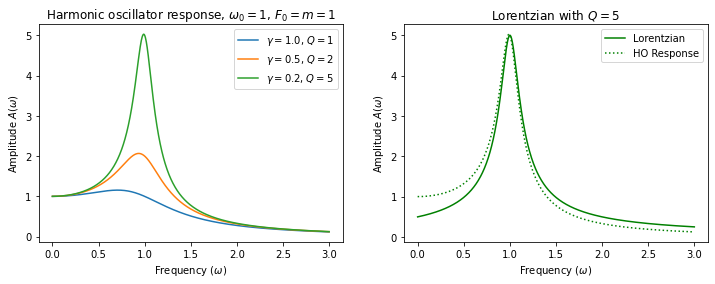

In [ ]:
#https://qsm.quantumtinkerer.tudelft.nl/3_noise_in_HOs/
import matplotlib.pyplot as plt
import numpy as np


plt.subplots(figsize=(12,4))
w = np.linspace(0,3,1000)
def HO_response(w,gamma):
    return 1/np.sqrt(w**2*gamma**2+(1-w**2)**2)

def lorentzian(w,gamma):
    return 1/(gamma**2/4+(1-w)**2)/4

plt.subplot(121)
for gamma in (1,0.5,0.2):
    plt.plot(w, HO_response(w,gamma), label="$\gamma = %.1f$, $Q = %.0f$" % (gamma,1/gamma))
plt.title("Harmonic oscillator response, $\omega_0=1$, $F_0=m=1$")
plt.xlabel("Frequency ($\omega$)")
plt.ylabel("Amplitude $A(\omega)$")
plt.legend()

plt.subplot(122)
gamma = 0.2
plt.plot(w, np.sqrt(lorentzian(w,gamma)), label="Lorentzian",c='g')
plt.plot(w, HO_response(w,gamma), c='g', ls=':', label = "HO Response")
plt.title("Lorentzian with $Q = 5$")
plt.xlabel("Frequency ($\omega$)")
plt.ylabel("Amplitude $A(\omega)$")
plt.legend()
plt.show()

I=0.5008035470074022.


Text(0.5, 0, '$x$')

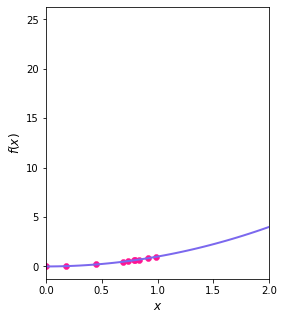

In [ ]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,5,100)
a = 0; b = 1 ; N = 10
points = np.zeros(N)
for i in range (len(points)):
	points[i] = random.uniform(a,b)

I = 0.0
def f(x):
	return x**2
for i in points:
	I += f(i)
result = ((b-a)/float(N))*I
print ("I={}.".format(result))

plt.figure(figsize=(4,5));
plt.plot(x,f(x),color='mediumslateblue',Linewidth=2.0)
plt.scatter(points, f(points),linewidth=0.5, c ="deeppink")
plt.xlim([0,2]); #plt.ylim([-0.05,0.05])
plt.ylabel(r'$f(x)$',fontsize=12)
plt.xlabel(r'$x$',fontsize=12)

In [ ]:
from random import uniform

def monte_carlo_integrate(f, a, b, c, d, num_points):
    inside_count = 0
    for i in range(num_points):
        x = uniform(a,b)
        y = uniform(c,d)
        if y <= f(x):
            inside_count += 1
    return inside_count/num_points * (b-a)*(d-c)

1.444


<ipython-input-16-351f012b0f50>:8: RuntimeWarning: divide by zero encountered in divide
  return (np.sin(1/(2*x-x**2)))**2
<ipython-input-16-351f012b0f50>:8: RuntimeWarning: invalid value encountered in sin
  return (np.sin(1/(2*x-x**2)))**2


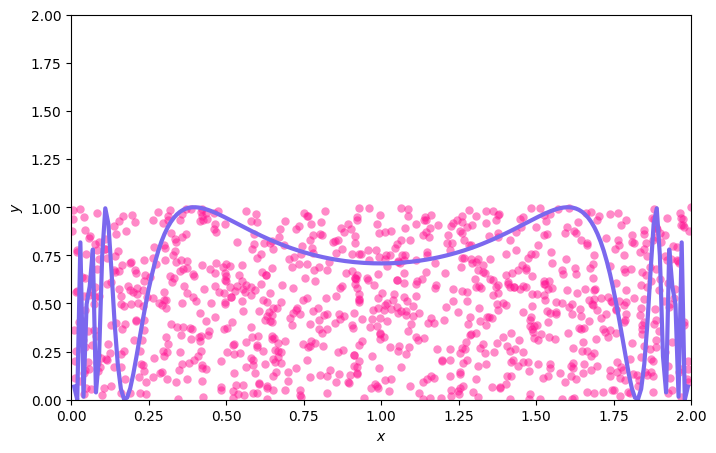

In [ ]:
#19 Nov 2022
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
x_ran,y_ran=[],[]
def funci(x):
  #return 1/(np.log(x**2)+np.exp(x**3))
  return (np.sin(1/(2*x-x**2)))**2
def monte_carlo_integrate(f, a, b, c, d, num_points):
    inside_count = 0
    for i in range(num_points):
        x = uniform(a,b)
        y = uniform(c,d)
        x_ran.append(x);y_ran.append(y)
        if 0 <= y <= f(x):
          inside_count += 1
        elif f(x) <= y <= 0:
          inside_count -= 1
    return inside_count/num_points*(b-a)*(d-c)
ans=monte_carlo_integrate(funci,0,2,0,1,1000)
print(ans)
x1=np.linspace(0,2,200)
plt.figure(figsize=(8,5));
plt.xlim([0,2]); plt.ylim([0,2])
plt.plot(x1,funci(x1),color='mediumslateblue',linewidth=3.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.scatter(x_ran,y_ran,linewidth=0.007,c ="deeppink",alpha=0.5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1.4518440000000001


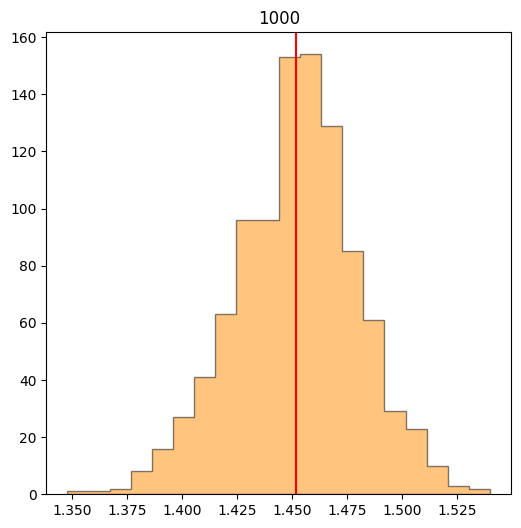

In [ ]:
monty=[]
N=1000
def funci(x):
  return (np.sin(1/(2*x-x**2)))**2
for k in range(0,N):
  monty.append(monte_carlo_integrate(funci,0,2,0,1,1000))
sum=0
for i in range(0, len(monty)):
   sum = sum + monty[i];
average=sum/len(monty)
print(average)
plt.figure(figsize=(6,6));
plt.hist(monty,histtype='stepfilled',color='darkorange',alpha=0.5,edgecolor='black', bins=20)
plt.title(N)
plt.axvline(average,color='red')

3.36


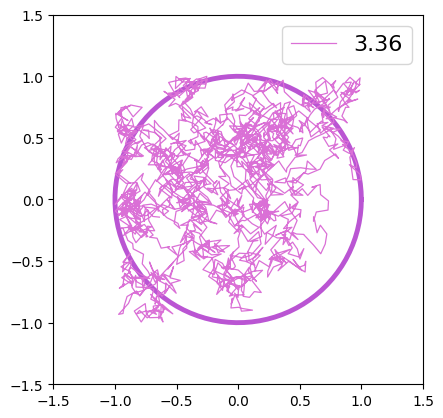

In [ ]:
#Nov 3 2022
#letsss goooo
import random
x_pos,y_pos =[],[]

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            x_pos.append(x)
            y_pos.append(y)
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

#n_runs = 10
n_trials = 2000
delta = 0.1
pi_val = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
print(pi_val)
#print(4.0 * markov_pi(n_trials, delta) / float(n_trials))
#for run in range(n_runs):
    #print(4.0 * markov_pi(n_trials, delta) / float(n_trials))
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
#ax.set_yticklabels([-1,0,1])
#ax.set_xticklabels([-1,0,1])
# Plot the circle
ax.plot(x, y,linewidth=3.5,color='mediumorchid')
plt.plot(x_pos,y_pos,linewidth=0.90,color='orchid',label=pi_val)
plt.legend(fontsize='16')
plt.show()

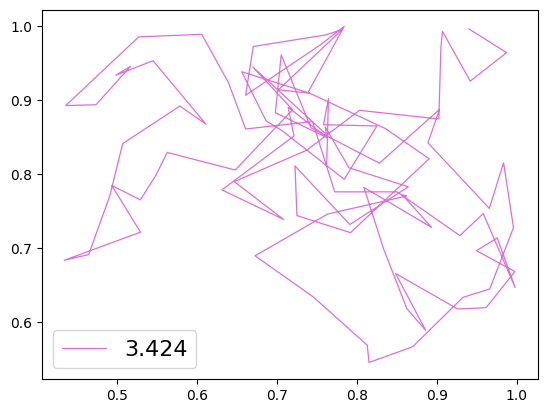

In [ ]:
ax.plot(x, y,linewidth=3.5,color='mediumorchid')
plt.plot(x_pos[0:100],y_pos[0:100],linewidth=0.90,color='orchid',label=pi_val)
plt.legend(fontsize='16')
plt.show()

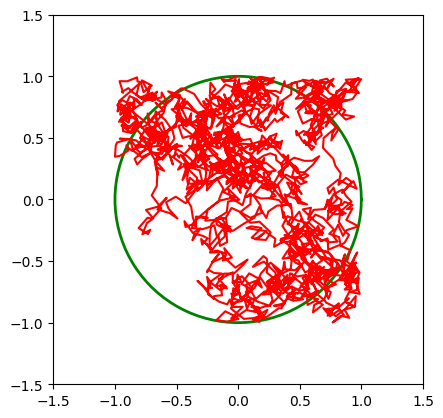

In [ ]:
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
# Plot the circle
ax.plot(x, y,linewidth=2.0,color='green')
plt.plot(x_pos,y_pos,color='red')
plt.show()


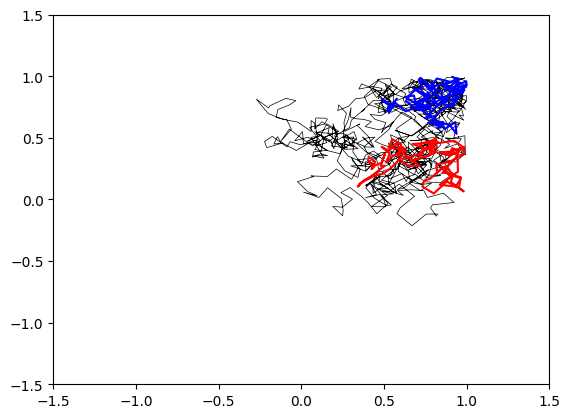

In [ ]:
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.plot(x_pos[100:900],y_pos[100:900],color='black',linewidth=0.5)
plt.plot(x_pos[0:100],y_pos[0:100],color='blue',linewidth=1.5)
plt.plot(x_pos[-100:],y_pos[-100:],color='red',linewidth=1.5)

Practice quiz 1: spotting a correct algorithm

1.
Question 1

Consider a one-dimensional system of N sites with periodic boundary conditions, with a single particle hopping between neighboring sites at times t = 0, 1, 2, ... as shown here.

A move from site i to site i + 1 modulo N is "to the right", and a move from site i to site i - 1 is "to the left".

We consider the following programs



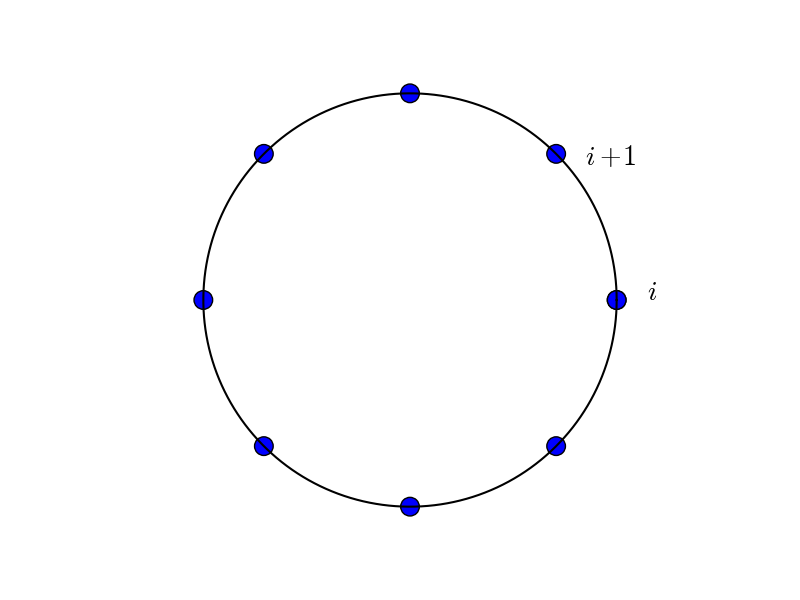

In [ ]:
#Program A1
import random
N = 20
position = 0
for t in range(100000):
    if random.uniform(0.0, 1.0) < 0.5:
        position = (position + 1) % N
    elif random.uniform(0.0, 1.0) > 0.5:
        position = (position - 1) % N

In [ ]:
#Program B1
import random
N = 20
position = 0
for t in range(100000):
    dir = random.choice([-1, 1])
    position = (position + dir) % N


In [ ]:
#Program C1
import random
N = 20
position = 0
for t in range(100000):
    if random.uniform(0.0, 1.0) < 0.5:
        position = (position + 1) % N
    else:
        position = (position - 1) % N


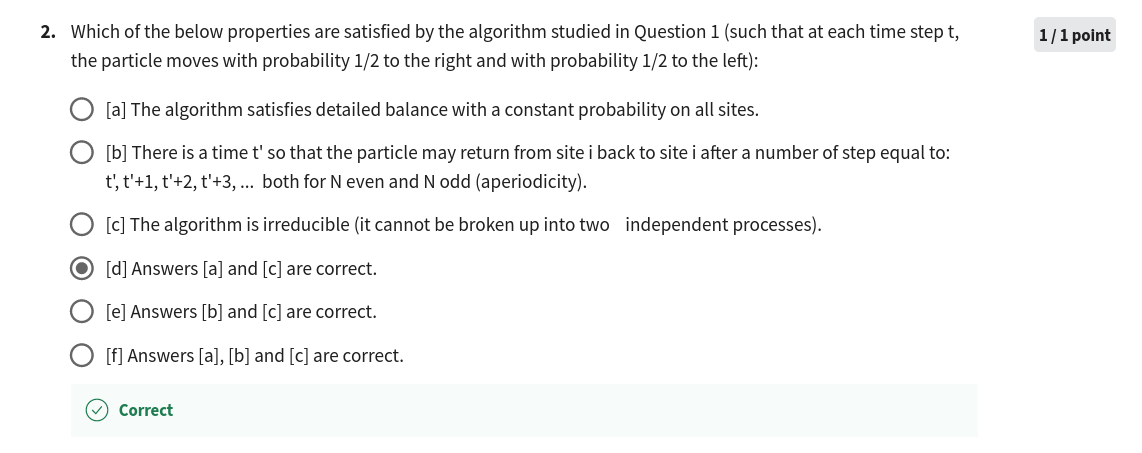

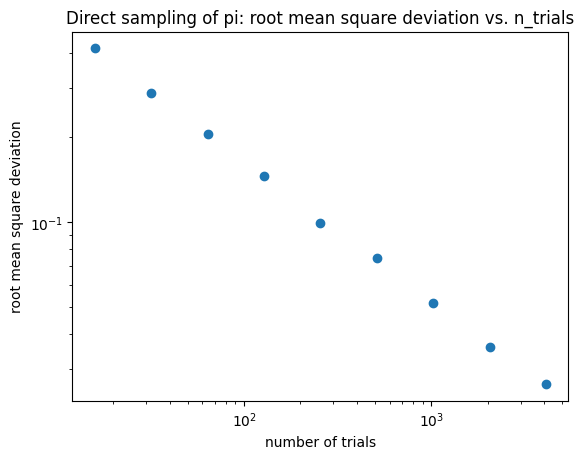

In [ ]:
import random, math, pylab

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, 'o')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()

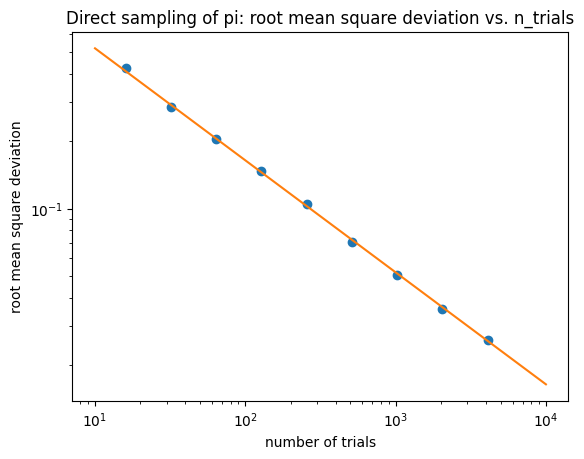

In [ ]:
import random, math, pylab

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, 'o')
pylab.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)])
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()

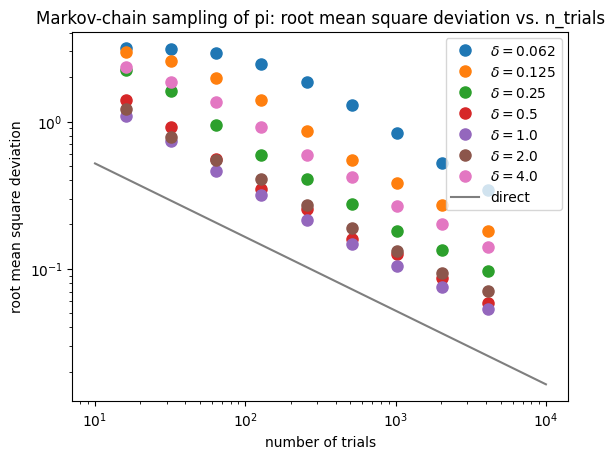

In [ ]:
import random, math, pylab

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_est = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

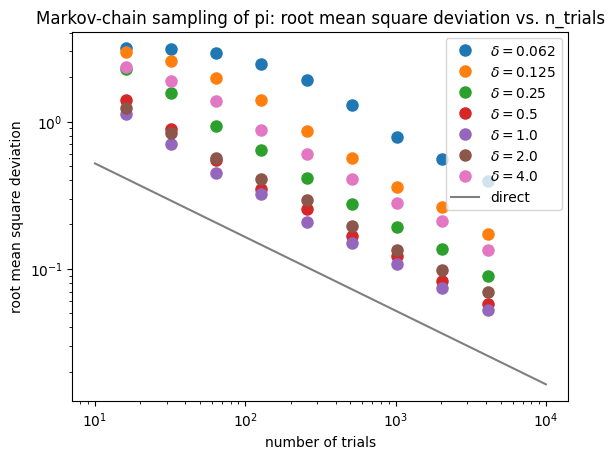

In [ ]:
import random, math, pylab
acceptance_rat = []
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    acceptance_rat.append(n_hits/N)
    return n_hits

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_est = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

In [ ]:
#Nov 8 2023
#Acceptance probabilty calculator
import random

x, y = 1.0, 1.0
delta = 4.0
n_trials = 2**12
n_hits = 0
n_accept = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
        n_accept += 1
    if x**2 + y**2 < 1.0: n_hits += 1
#print(4.0 * n_hits / float(n_trials))
print(n_accept/n_trials)

0.060791015625


In [ ]:
n_hits

2785

In [ ]:
n_accept

3752

In [ ]:
n_trials

4000

In [ ]:
n_accept/n_trials

0.938

In [ ]:
import numpy as np

In [ ]:
import random, math
n_trials = 400000
n_hits = 0
var = 0.0
mean_temp = []
mean_sqtemp = []
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
    mean_temp.append(Obs)
    mean_sqtemp.append(Obs**2)
    var += (Obs - math.pi)**2
a   = np.sum(mean_temp)/n_trials         # Obs
b   = np.sum(mean_sqtemp)/n_trials       # Obs^2
var = b-a**2                             # <Obs^2>-<Obs>^2
print(4.0 * n_hits / float(n_trials), math.sqrt(var / n_trials),a,b,np.sqrt(var))

3.14374 0.0025941563235472144 3.14374 12.57496 1.640688517787578


In [ ]:
np.sum(mean_temp)/n_trials
np.sum(mean_sqtemp)/n_trials

3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi
3.1593894958496094 mean value, estimate of pi


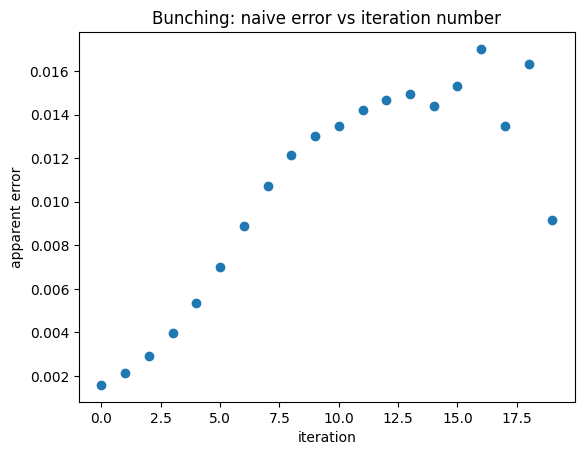

In [ ]:
import random, pylab, math

def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

poweroftwo = 20
n_trials = 2 ** poweroftwo
delta = 0.1
data = markov_pi_all_data(n_trials, delta)
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    data = new_data[:]
    print(mean / float(N), 'mean value, estimate of pi')
pylab.plot(bunches, errors, 'o')
pylab.xlabel('iteration')
pylab.ylabel('apparent error')
pylab.title('Bunching: naive error vs iteration number')
pylab.savefig('apparent_error_bunching.png')
pylab.show()

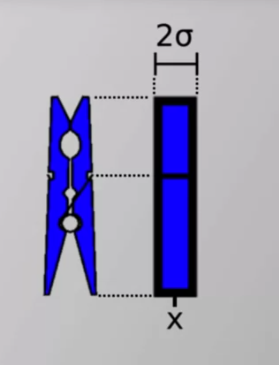

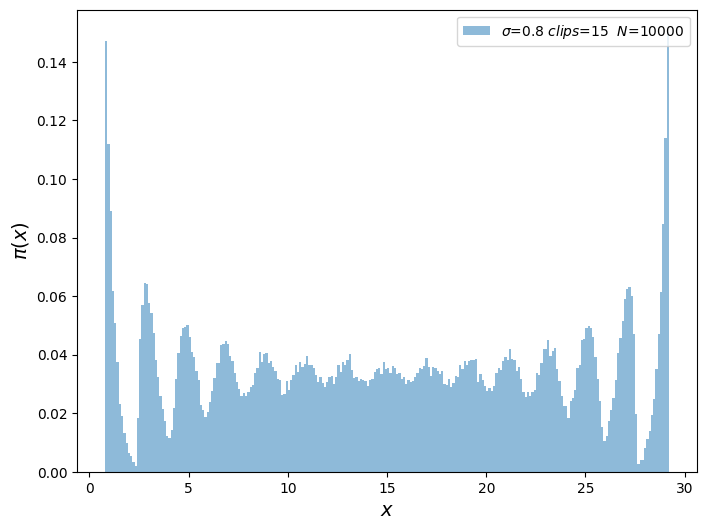

In [ ]:
import random, pylab
N        =  15
L        =  30.0
sigma    =  0.80
n_runs   =  10000
data     =  []

for run in range(n_runs):
    y = [random.uniform(0.0, L-2*N*sigma) for k in range(N)]
    y.sort()
    data += [y[i] + (2*i+1)*sigma for i in range(N)]

pylab.figure(figsize=(8,6))
pylab.xlabel(r'$x$', fontsize=14)
pylab.ylabel(r'$\pi(x)$', fontsize=14)
#pylab.title('Density of %i clothes-pins ($\sigma$=%s) on a line of length L=%s' % (N, sigma, L))

ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
pylab.hist(data,alpha=0.5,bins=250,density=True,label='$\sigma$=%s $clips$=%i  $N$=%i'% (sigma,N,n_runs) )
#pylab.hist(data1,alpha=0.5,bins=200,color="red",density=True,label='$\sigma$=%s $N$=%i'% (sigma,N) )

pylab.savefig('plot-direct_pins_noreject.png')
pylab.legend(loc="upper right")
pylab.show()

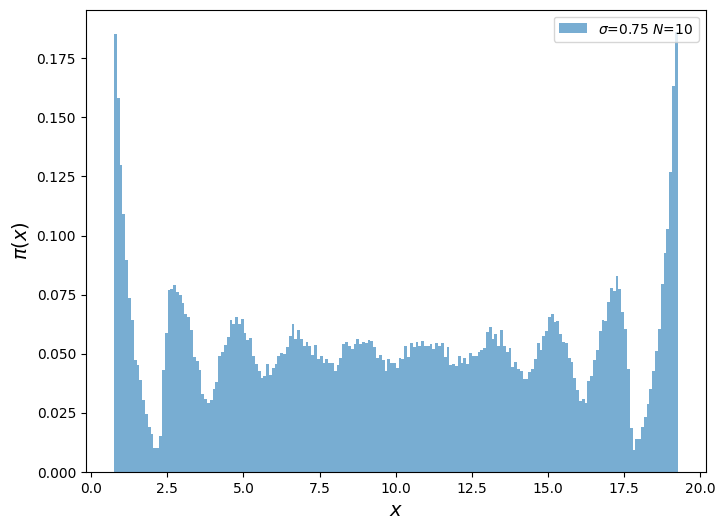

In [ ]:
N = 10
L = 20.0
sigma = 0.75
n_runs = 10000
data1 = []

for run in range(n_runs):
    y = [random.uniform(0.0, L - 2 * N * sigma) for k in range(N)]
    y.sort()
    data1 += [y[i] + (2 * i + 1) * sigma for i in range(N)]

pylab.figure(figsize=(8,6))
pylab.xlabel(r'$x$', fontsize=14)
pylab.ylabel(r'$\pi(x)$', fontsize=14)
#pylab.title('Density of %i clothes-pins ($\sigma$=%s) on a line of length L=%s' % (N, sigma, L))
pylab.hist(data1,alpha=0.6,bins=200,density=True,label='$\sigma$=%s $N$=%i'% (sigma,N) )
pylab.savefig('plot-direct_pins_noreject.png')
pylab.legend(loc="upper right")
pylab.show()

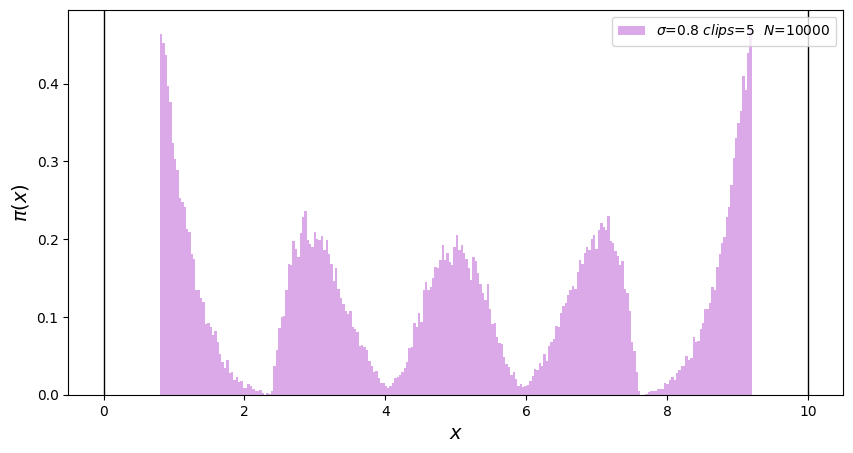

In [ ]:
import random
import matplotlib.pyplot as plt
#Parameters

N        =  5         # number of pins
L        =  10.0       # length of the line
sigma    =  0.80       # sigma value of the Halo
n_runs   =  10000      # number of runs
data     =  []         # empty list to fill the values of
                       # the positions of the clips
for run in range(n_runs):
    y = [random.uniform(0.0, L-2*N*sigma) for k in range(N)]
    y.sort()
    data += [y[i] + (2*i+1)*sigma for i in range(N)]

plt.figure(figsize=(10,5))
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\pi(x)$', fontsize=14)
#pylab.title('Density of %i clothes-pins ($\sigma$=%s) on a line of length L=%s' % (N, sigma, L))

#Boundary points
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=L, color='black', linestyle='-', linewidth=1)

plt.hist(data,color='mediumorchid',alpha=0.5,bins=250,density=True,label='$\sigma$=%s $clips$=%i  $N$=%i'% (sigma,N,n_runs) )
plt.savefig('plot-direct_pins_noreject.png')
plt.legend(loc="upper right")
plt.show()

In [ ]:
data.sort()
data[0]

0.1229446419258621

In [ ]:
data[0:10]

[0.9232384249696712,
 2.6440755653744032,
 4.474701514146821,
 6.213718573346598,
 8.217217896936692,
 9.959205055585896,
 12.67105846709898,
 15.13781163043743,
 16.823411426003943,
 18.541806488221464]

In [ ]:
for i in range(0,len(data[0:11])-1):
  print(data[i],data[i+1]-data[i])

2.7064263430989492 0.20022552184844367
2.906651864947393 0.21730836961822186
3.123960234565615 0.7506015604422815
3.8745617950078963 1.8928370262294876
5.767398821237384 0.8369509729557976
6.6043497941931815 7.954170847333142
14.558520641526323 0.3525905775592495
14.911111219085573 1.0883827265634203
15.999493945648993 2.1401775411871284
18.13967148683612 -16.51542849983274


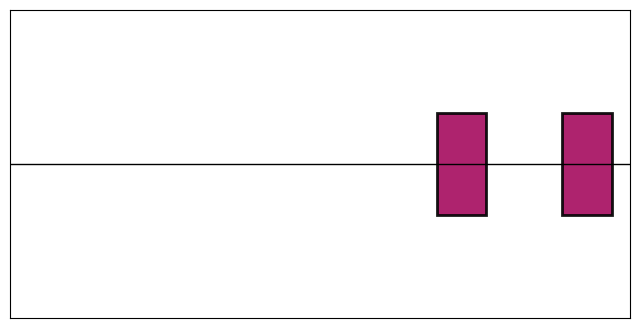

In [ ]:
# Define the rectangle parameters
a = np.random.randint(0, len(data)-20)
start_points    = data[a:a+2]
#start_points = data[30:45]
rectangle_width = sigma

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,4))

ax.axhline(y=0.5, color='black', linestyle='-', linewidth=1)

# Create rectangles and add them to the plot
for start_point in start_points:
    rectangle = patches.Rectangle((start_point - 0.2 * rectangle_width, 0),
                                  rectangle_width, 1, linewidth=2, edgecolor='black', facecolor='#A50B5E', alpha=0.9)
    ax.add_patch(rectangle)

# Set plot limits
ax.set_xlim(0, 10)
ax.set_ylim(-1, 2)
ax.set_xticks([])

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

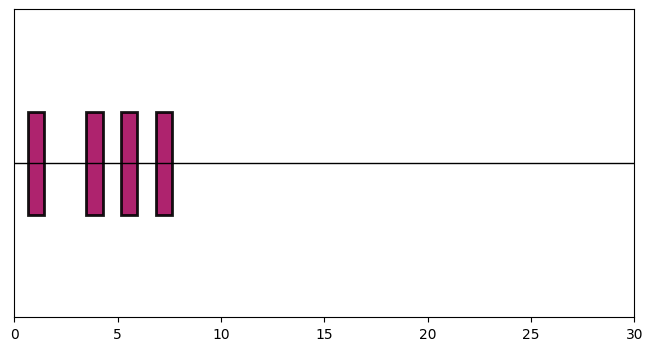

In [ ]:
# Define the rectangle parameters
a = np.random.randint(0, len(data)-20)
start_points    = data[a:a+15]
#start_points = data[30:45]
rectangle_width = sigma

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,4))

ax.axhline(y=0.5, color='black', linestyle='-', linewidth=1)

# Create rectangles and add them to the plot
for start_point in start_points:
    rectangle = patches.Rectangle((start_point - 0.5 * rectangle_width, 0),
                                  rectangle_width, 1, linewidth=2, edgecolor='black', facecolor='#A50B5E', alpha=0.9)
    ax.add_patch(rectangle)

# Set plot limits
ax.set_xlim(0, 30)
ax.set_ylim(-1, 2)
ax.set_xticks([0,5,10,15,20,25,30])

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Show the plot
plt.show()

In [ ]:
data[1]-sigma

2.313533294680871

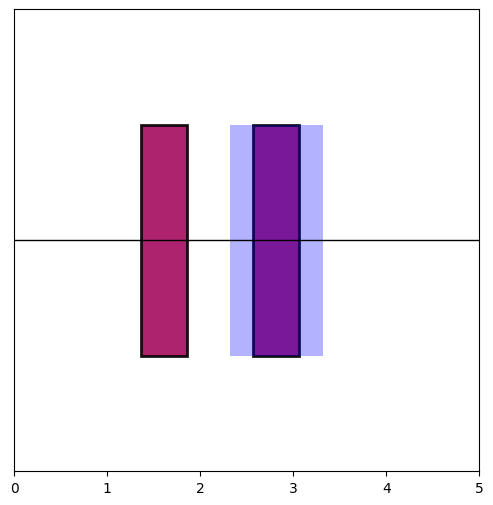

In [ ]:
start_points = data[0:3]
rectangle_width = sigma

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,6))

ax.axhline(y=0.5, color='black', linestyle='-', linewidth=1)

# Create rectangles and add them to the plot
for start_point in start_points:
    rectangle = patches.Rectangle((start_point - 0.5 * rectangle_width, 0),
                                  rectangle_width, 1, linewidth=2, edgecolor='black', facecolor='#A50B5E', alpha=0.9)
    ax.add_patch(rectangle)
rectangle1 = patches.Rectangle((data[1]-(sigma/2) - 0.5 * rectangle_width, 0),
                                  rectangle_width, 1, linewidth=0.1,facecolor='blue', alpha=0.3)
ax.add_patch(rectangle1)

rectangle2 = patches.Rectangle((data[1]+(sigma/2) - 0.5* rectangle_width, 0),
                                  rectangle_width, 1, linewidth=0.1,facecolor='blue', alpha=0.3)
ax.add_patch(rectangle2)
# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(-0.5,1.5)
ax.set_xticks([0,1,2,3,4,5])

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])
# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
import numpy as np

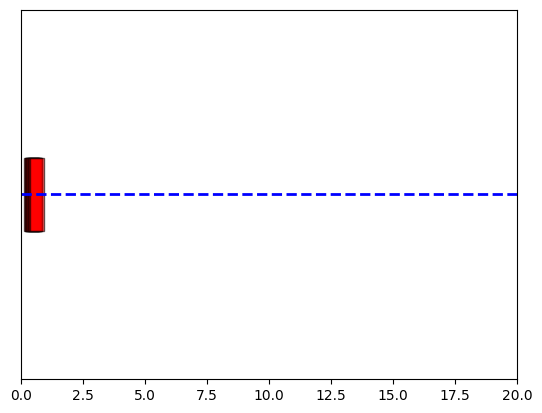

In [ ]:
# Define the rectangle parameters
#a = np.random.randint(0, len(data))
#start_points    = data[a:a+10]
start_points  =  data[0:10]
rectangle_width = 0.55

# Create a figure and axis
fig, ax = plt.subplots()
ax.axhline(y=0.5, color='blue', linestyle='--', linewidth=2)

# Create rectangles and add them to the plot
for start_point in start_points:
    rectangle = patches.Rectangle((start_point, 0), rectangle_width, 1, linewidth=1, edgecolor='black', facecolor='red', alpha=0.6)
    ax.add_patch(rectangle)
# Set plot limits

ax.set_xlim(0, 20)
ax.set_ylim(-2, 3)
# Remove y-axis ticks and labels

ax.set_yticks([])
ax.set_yticklabels([])
# Show the plot
plt.show()

In [ ]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

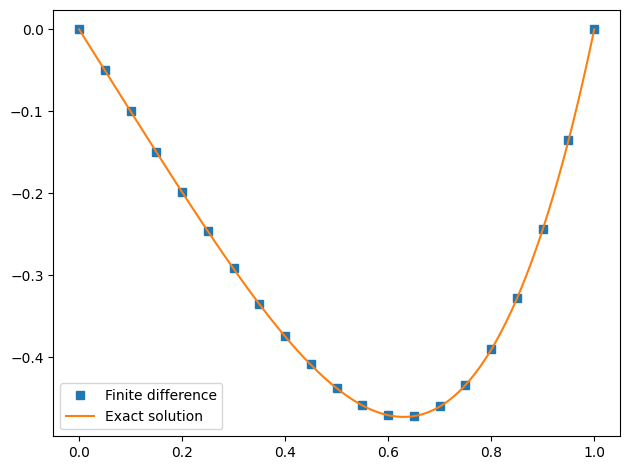

In [ ]:
#https://github.com/ja-vazquez/Python_compendium/blob/master/Curso_python/PDE.ipynb
#Dec 15 2023
M = 20     #number of grid points
h = 1./M   #grid spacing

x      = np.linspace(0, 1, M+1).T
b      = np.zeros(M+1)
b[1:M] = 12*(h*x[1:M])**2         #right hand side vector | equation

main_diag = -2*np.ones(M+1)
off_diag  = 1*np.ones(M+1)

#constructing tridiagonal matrix
diagonals = [main_diag, off_diag, off_diag]
A = sparse.diags(diagonals, [0,-1,1], shape=(M+1,M+1)).toarray()

#Boundary conditions
A[0, 0]   = 1
A[0, 1]   = 0
A[M, M]   = 1
A[M, M-1] = 0

#print(A)

y  = np.linalg.solve(A,b)
xf = np.linspace(0,1,100)
yexact = xf**4 - xf

plt.plot(x, y, 's')
plt.plot(xf, yexact)
plt.legend(['Finite difference', 'Exact solution'])
plt.tight_layout()
plt.show()

In [ ]:
2D Partial Differential Equation

In [ ]:
import sympy

In [ ]:
x = sympy.Symbol('x')

In [ ]:
expr = sympy.Expr(x + 1)
expr

Expr(x + 1)

In [ ]:
# Create a symbol
x = sympy.Symbol('x')
# Create an expression
expr = x + 1
# Evaluate the expression
expr.evalf(subs={x: 4})
# Simplify the expression
sympy.simplify(expr)
# Factor the expression
#sympy.factor(expr)
# Solve the equation
#sympy.solve(expr, x)

x + 1

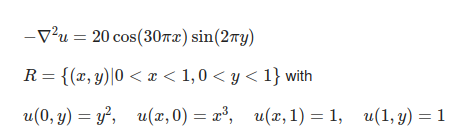

In [ ]:
def generate_lhs_matrix(M, hx, hy):
    alpha = hx**2/hy**2

    main_diag = 2 * (1 + alpha) * np.ones(M - 2)
    off_diag  = -1 * np.ones(M - 2)

    a = len(main_diag)
    diagonals = [main_diag, off_diag, off_diag]

    B  = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
    #print(B)

    e1 = sparse.eye(M-2).toarray()
    #Repeat and fill up with zeros
    A1 = sparse.kron(e1,B).toarray()
    #print(A1)
    C = sparse.diags([-1*np.ones(M+1)], [0], shape=(a,a)).toarray()
    e2 = sparse.diags([1*np.ones(M),1*np.ones(M)], [-1,1], shape=(a,a)).toarray()
    A2 = sparse.kron(e2,C).toarray()

    return A1+A2

In [ ]:
def bc_dirichlet(X, Y, M):
    lBC = Y[:,0]**2
    leftBC = lBC[1:M-1]

    rBC = np.ones(M)
    rightBC = rBC[1:M-1]

    tBC = X[0,:]**3
    topBC = tBC[1:M-1]

    bBC = np.ones(M)
    bottomBC = bBC[1:M-1]

    g1 = np.zeros((M-2)**2)
    #for loop to impose Bcs
    for i in range(M-2):
        g1[(M-2)*i]       = topBC[i]
        g1[(M-2)*(i+1)-1] = bottomBC[i]

    k1 = np.zeros(len(leftBC))
    k1[0] = 1.0
    leftBCk = sparse.kron(k1, leftBC).toarray().flatten()

    k2 = np.zeros(len(rightBC))
    k2[-1] = 1.0
    rightBCk = sparse.kron(k2,rightBC).toarray().flatten()

    g = g1 + leftBCk + rightBCk

    return [g, lBC, tBC, rBC, bBC]

In [ ]:
def rhs_func(x, y, M):
    g = (20 * np.multiply(np.cos(3*np.pi*X[1:-1, 1:-1]), np.sin(2*np.pi*Y[1:-1, 1:-1]))).flatten()
    f = [g[i::M-2] for i in range(M-2)]
    f = np.asarray(f).flatten()
    return f

In [ ]:
M = 100
(x0, xf) = (0.0, 1.0)
(y0, yf) = (0.0, 1.0)

hx = (xf - x0)/(M-1)
hy = (yf - y0)/(M-1)

x1 = np.linspace(x0, xf, M)
y1 = np.linspace(y0, yf, M)

X, Y = np.meshgrid(x1, y1)
#---
A = generate_lhs_matrix(M, hx, hy)

fbc = bc_dirichlet(X, Y, M)
frhs = rhs_func(X, Y, M)
rhs = frhs*(hx**2) + fbc[0]

V = np.linalg.solve(A,rhs)

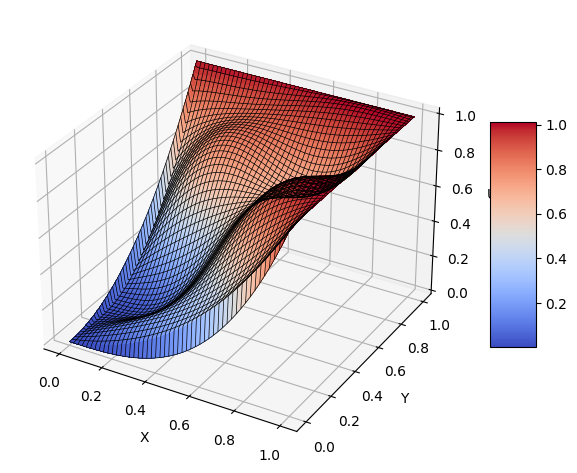

In [ ]:
V = V.reshape((M-2, M-2))
U = np.zeros((M,M))

U[1:M-1, 1:M-1] = V
U[:,0]   = fbc[1]
U[0,:]   = fbc[2]
U[:,M-1] = fbc[3]
U[M-1,:] = fbc[4]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.coolwarm,
                       linewidth=0.5, antialiased=False, shade=False, rstride=1, cstride=1)
ax.plot_wireframe(X, Y, U,color='black',linewidth=0.5,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
plt.tight_layout()
#ax.view_init(20, -106)
plt.show()

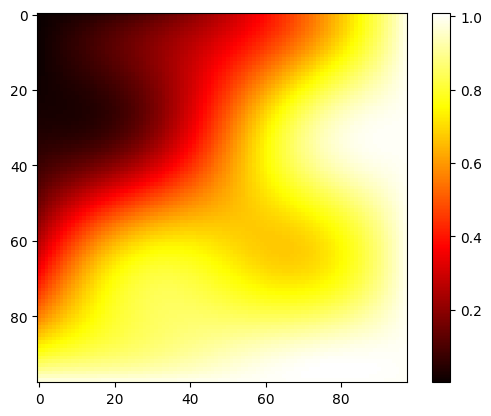

In [ ]:
plt.imshow(V, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
#Nov 2 2023
#Statistics and Probability course
#NCL :)
r = 1.         # assumption
n = 100    # number of samples

x = np.random.uniform(0, r, n) # draw random numbers in interval
y = np.random.uniform(0, r, n) # draw random numbers in interval

In [ ]:
counter = 0. # cumulative counter (<= n)
pi_arr = []
for i in range(n):
    if x[i] ** 2 + y[i] ** 2 <= 1.:
        counter += 1
        pi = 4 * counter / (i + 1)
        pi_arr.append(pi)

In [ ]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

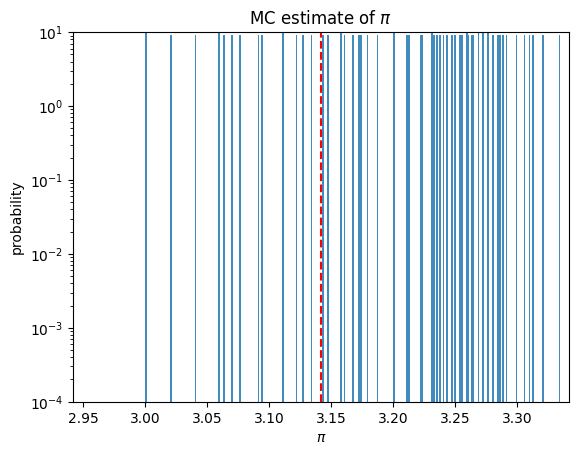

In [ ]:
m, bins, patches = plt.hist(pi_arr, 1000, density = True, alpha = 0.85)
plt.plot(np.ones(5) * np.pi, np.logspace(-4, 1, 5), color = 'red', linestyle = '--')  # true value
plt.xlabel(r'$\pi$')
plt.ylabel('probability')
plt.title('MC estimate of $\\pi$')
plt.axis([np.pi - .2, np.pi + .2, 1e-4, 10.])
plt.yscale('log')

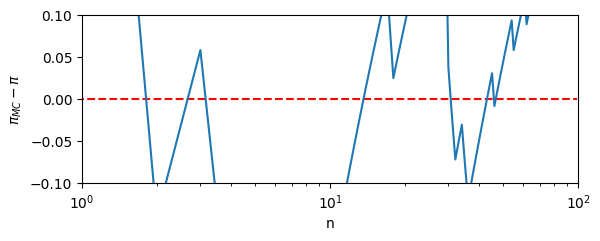

In [ ]:
plt.subplot(212)
dPi = pi_arr - np.ones(len(pi_arr)) * np.pi
plt.plot(np.arange(n), np.zeros(n), color = 'red', linestyle = '--')  # true value
plt.plot(np.arange(len(pi_arr)), dPi)
plt.ylabel('$\\pi_{MC} - \\pi$')
plt.xlabel('n')
plt.axis([1, n, -.1, .1])
plt.xscale('log')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 600x600 with 0 Axes>

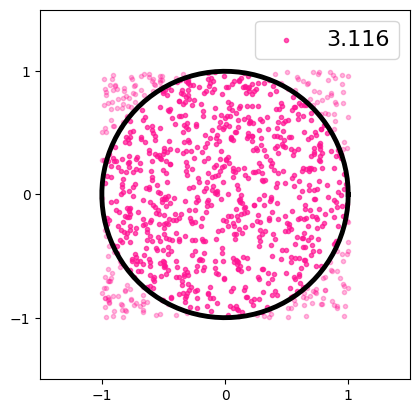

In [ ]:
N = 10_00
inside ,outside = [],[]

for i in range(N):
  x = np.random.uniform(-1, 1)
  y = np.random.uniform(-1, 1)
  if np.sqrt(x**2 + y**2) < 1:
    inside.append((x, y))
  else:
    outside.append((x, y))

plt.figure(figsize=(6, 6))
pi=4 * len(inside)/float(N)

theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

#ax.set_yticklabels([-1.5,0,1.5])
#ax.set_xticklabels([])
# Plot the circle

ax.plot(x, y,linewidth=3.5,color='black')
plt.xlim([-1.5,1.5]); plt.ylim([-1.5,1.5])
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])

plt.scatter([x[0] for x in inside], [x[1] for x in inside], color='deeppink',marker=".", alpha=0.7,label=pi)
plt.scatter([x[0] for x in outside], [x[1] for x in outside], color='deeppink',marker=".", alpha=0.3)
plt.legend(fontsize='16')

In [ ]:
import random

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
t_max = 4
site = 8
t = 0
print(site)
while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0, 3)]
    print(site)

8
8
7
4
3


Text(0.5, 1.0, 'Jump Diffusion Process')

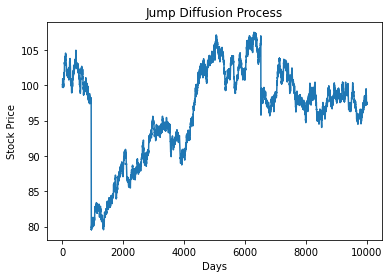

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)

    return np.exp(geo+poi_rv)*S


S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
steps =10000 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

[[100.           0.           0.           0.           0.        ]
 [100.          43.44665527  20.13809204   8.50540161   0.        ]
 [100.          56.7414856   30.9375      14.6651268    0.        ]
 [100.          54.93209839  33.77180099  19.60923195   0.        ]
 [100.          30.          30.          30.           0.        ]]


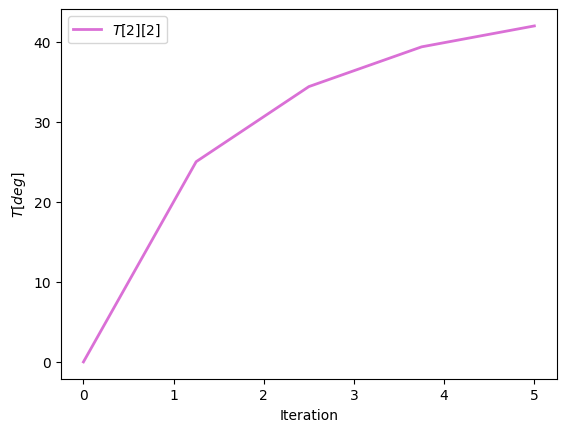

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 5    #max iter  #Set Dimension and delta
lenX = lenY = 5
delta = 1
#Boundary condition
Ttop      = 30; Tbottom   = 0; Tleft     = 100; Tright    = 0  #Trandom   = 100
Tguess = 0   #Intial guess for internal grid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
T = np.empty((lenX, lenY))
T.fill(Tguess)

x2=np.linspace(0,lenX,lenX)  #setting boundary condition
for m in range(0,lenX):
 T[(lenY-1):, :]   = Ttop
 T[:1, :]          = Tbottom
 T[:, (lenX-1):]   = Tright
 T[:, :1]          = Tleft
Tcen,Tcen1=[],[]
for k in range(0,N):
    Tcen.append(T[1][1])
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
print(T)
x1 = np.linspace(0,N,N)
plt.xlabel('Iteration');plt.ylabel(r'$T[deg]$')
plt.plot(x1,Tcen,linewidth=2.0,color='orchid',label=r'$T[2][2]$')
plt.legend()

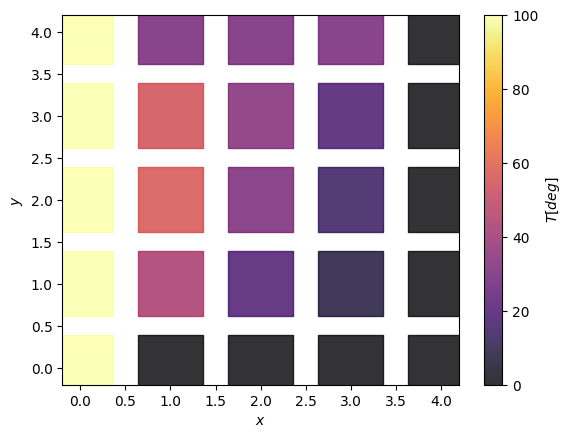

In [ ]:
plt.scatter(X,Y,c=T,marker='s',s=2200.0,alpha=0.8,cmap=plt.cm.inferno)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(label=r'$T[deg]$')

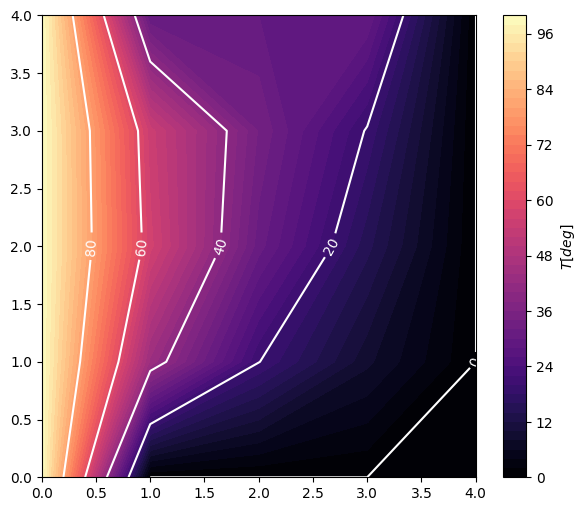

In [ ]:
plt.figure(figsize=(7,6))
contours = plt.contour(X, Y, T, 5,colors='white') # 5 contours
plt.clabel(contours, inline=True, fontsize=10.0)
plt.contourf(X, Y, T, 60, cmap=plt.cm.magma)
plt.colorbar(label=r'$T [deg]$')

In [ ]:
import numpy as np
from math import *

# Grid size
m=64
a=np.zeros((m))
b=np.empty((m))
snaps=40
iters=400
z=np.empty((m,snaps+1))

# PDE-related constants. Change the timestep prefactor to 0.5001 to go slightly
# beyond the point of stability, where the 2-gridpoint oscillation will slowly
# grow.
dx=1.0/m
dt=0.1*dx*dx
mu=dt/(dx*dx)

# Initial condition
for j in range(m):
    x=dx*j
    if x>0.25 and x<0.75: a[j]=1
z[:,0]=a

# Integrate the PDE
for i in range(1,snaps+1):
    for k in range(iters):
        for j in range(m):
            jl=j-1
            if jl<0: jl+=m
            jr=j+1
            if jr>=m: jr-=m
            b[j]=((1-2*mu)*a[j]+mu*(a[jl]+a[jr]))
        a=np.copy(b)
    z[:,i]=a

# Output results
for j in range(m):
    e=[str(j*dx)]
    for i in range(snaps+1):
        e.append(str(z[j,i]))
    print(" ".join(e))

$$V_{ABM}(r,c)=D_{ABM}R(r)\left ( \sum_{l=0}^{N_{leg}}W_{l}P_{l}(c) \right )$$

Text(0, 0.5, '$V_{ABM}$')

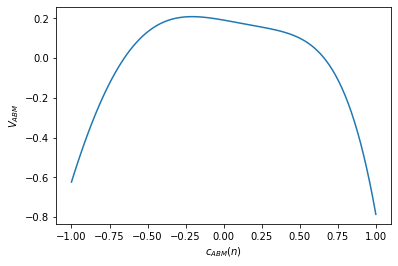

In [ ]:
x2=np.linspace(-1,1,100)
def P1(x):
  return x
def P2(x):
  return 0.5*(3*x**2-1)
def P3(x):
  return 0.5*(5*x**3-3*x)
def P4(x):
  return 0.125*(35*x**4-30*x**2+3)
def P5(x):
  return 0.125*(63*x**5-70*x**3+15*x)
W0=1; W1=10.109; W2=177.85;W3=77.393;W4=88.839;W5=29.637
Leg = W0+W1*P1(x2)+W2*P2(x2)+W3*P2(x2)+W4*P4(x2)+W5*P5(x2)
#plt.plot(x2,P0(x2))
Rabm=1.755
Dabm=2.0436*1e-3
def R(x2):
  return np.exp(-(Rabm/x2)**6)-1

plt.plot(x2,Dabm*Leg*R(x2))
plt.xlabel(r'$c_{ABM}(n)$')
plt.ylabel(r'$V_{ABM}$')

In [ ]:
# Simple Numerical Laplace Equation Solution using Finite Difference Method
import numpy as np
import matplotlib.pyplot as plt

# Set maximum iteration
N = 500
# Set Dimension and delta
lenX = lenY = 5
delta = 1
# Boundary condition
Ttop      = 100
Tbottom   = 0
Tleft     = 0
Tright    = 30

Tguess = 20
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :]  = Ttop
T[:1, :]        = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1]        = Tleft

print(T)

[[  0.   0.   0.   0.  30.]
 [  0.  20.  20.  20.  30.]
 [  0.  20.  20.  20.  30.]
 [  0.  20.  20.  20.  30.]
 [  0. 100. 100. 100.  30.]]


Integral= 0.30000000000000004


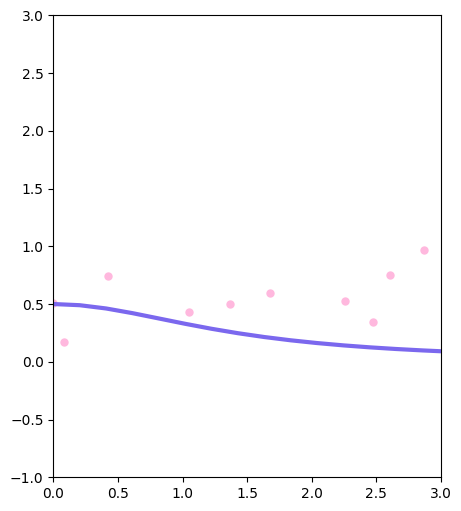

In [ ]:
#19 Nov 2022
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
x_ran,y_ran=[],[]
def funci(x):
  return 1/(2+x**2)
def monte_carlo_integrate(f, a, b, c, d, num_points):
    inside_count = 0
    for i in range(num_points):
        x = uniform(a,b)
        y = uniform(c,d)
        x_ran.append(x);y_ran.append(y)
        if  0 <= y <= f(x):
          inside_count += 1
        elif f(x) <= y <= 0:
          inside_count -= 1
        #print(inside_count)
    return inside_count/num_points*(b-a)*(d-c)
print("Integral=",monte_carlo_integrate(funci,0,3,0,1,10))
x1=np.linspace(0,10)
plt.figure(figsize=(5,6));plt.xlim([0,3]); plt.ylim([-1,3])
plt.plot(x1,funci(x1),color='mediumslateblue',linewidth=3.0)
plt.scatter(x_ran,y_ran,linewidth=0.007,c ="deeppink",alpha=0.3)

0.6757319999999999


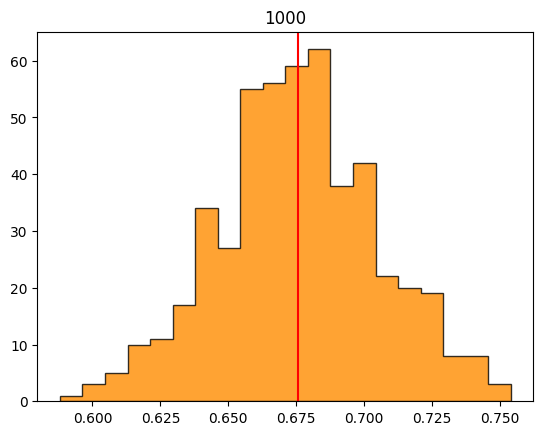

In [ ]:
monty=[]
N  = 500   #number of times
N1 = 1000 #number of points
def funci(x):
  return 1/(2+x**2)
for k in range(0,N):
  monty.append(monte_carlo_integrate(funci,0,2,0,1,N1))
sum=0
for i in range(0, len(monty)):
   sum = sum + monty[i];
average=sum/len(monty)
print(average)
plt.hist(monty,histtype='stepfilled',color='darkorange',alpha=0.8,edgecolor='black', bins=20)
plt.title(N1)
plt.axvline(average,color='red')

In [ ]:
#FORTRAN 20 Nov 2022
program montecarlo
  integer            :: i,N,count
  real               :: f,integral,a,b,c,d,x,y
  real, dimension(1) :: x_1,w_1
  real, allocatable  :: x_ran(:),y_ran(:)

num_points=100
allocate(x_ran(N),y_ran(N))

count = 0
    do i =1,num_points
        x = RAND(4)
        y = RAND(4)

         if(0 .le. y .and. y.le. f(x)) then
            count = count + 1
         elseif(f(x) .le. y .and. y .le. 0) then
            count = count - 1
         end if
    end do
Integral= count/num_points*(b-a)*(d-c)
 print*,Integral

end program montecarlo

REAL function f(x1)
REAL::x1
  f=x1*EXP(x1)
return
end function

In [ ]:
#simpson 3/8
PROGRAM simpsimp38
IMPLICIT NONE
INTEGER::j,n
REAL::a,b,h,I,f

a=0;b=1;n=100
h=(b-a)/n
I=f(a)+f(b)

DO j=1,n-1
  IF (MOD(j,3)==0) THEN
    I=I+(2*f(a+(j*h)))
  ELSE
    I=I+(3*f(a+(j*h)))
  END IF
END DO

I=(3/8.)*h*I

WRITE(6,9) "I=",I
9 FORMAT (a,5F9.6)
END PROGRAM

REAL function f(x1)
  f=x1**2
return
end function

In [ ]:
PROGRAM numeric
IMPLICIT NONE
real,allocatable ::x(:),y(:)
integer::N,k,num,j
REAL::I,h

!counter gin bhai
N = 0
OPEN (1, file ='notoo.txt')
DO
    READ (1,*, END=10)
    N = N + 1
END DO
10 CLOSE (1)
allocate (x(N),y(N))  !allocate the arrays from the text file
!Reading the coefficients from the file
open (unit = 1, file ='notoo.txt', status ='old')
do k = 1,N
     read (1,*) x(k),y(k)
end do
close(1)
I=y(1)+y(N)
DO j=1,N-1
  IF (MOD(j,3)==0) THEN
    I=I+(2*y(j))
  ELSE
    I=I+(3*y(j))
  END IF
END DO
I=(3/8.)*(x(2)-x(1))*I

WRITE(6,9) "I=",I
9 FORMAT (a,5F9.6)
END PROGRAM numeric

In [ ]:
#Function generator
program Predictor
IMPLICIT NONE
REAL::a,b,h,f
INTEGER::N,i
real, allocatable :: x(:), y(:)
a=0;b=4;h=0.2
N=INT((b-a)/h) !Number of steps
allocate(x(N),y(N))
x(1)=a
do i=1,N
    x(i+1) = x(i) + h
    y(i+1) = f(x(i+1))
end do
do i = 1,N
    write(*,*) x(i),y(i)
end do
end program Predictor

REAL function f(x1)
REAL::x1
  f=x1**3
return
end function


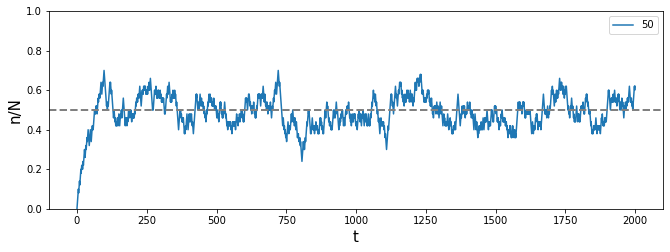

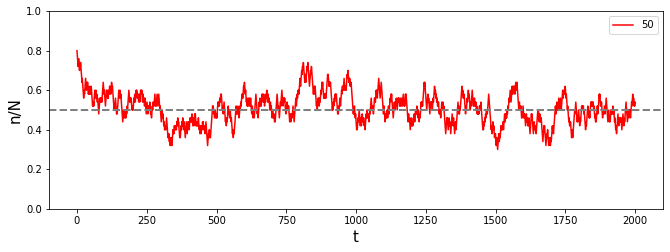

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 50         # Number of particles
nstep = 2000    # Number of steps
n = np.zeros(nstep)
n[0] = 0 # Initial number on left side
for i in range(1,nstep):
    r = np.random.rand(1)
    if (r<n[i-1]/N):
        n[i] = n[i-1] - 1 # Move atom from left to right
    else:
        n[i] = n[i-1] + 1 # Move atom from right to left
plt.figure(figsize=(11,8))
plt.subplot(2,1,1)
plt.plot(range(0,nstep),n/N,label=N)
plt.axhline(0.5, color='grey',linestyle='--',linewidth=2)
plt.xlabel('t',fontsize=15);plt.ylabel('n/N',fontsize=15);plt.ylim([0,1]);plt.legend()
plt.figure(figsize=(11,8))
plt.subplot(2,1,2)
N2 = 50       # Number of particles
nstep = 2000    # Number of steps
v = np.zeros(nstep)
v[0] = 40 # Initial number on left side
for i in range(1,nstep):
    r = np.random.rand(1)
    if (r<v[i-1]/N2):
        v[i] = v[i-1] - 1 # Move atom from left to right
    else:
        v[i] = v[i-1] + 1 # Move atom from right to left
plt.plot(range(0,nstep),v/N2,color='red',label=N2)
plt.axhline(0.5, color='grey',linestyle='--',linewidth=2)
plt.xlabel('t',fontsize=15);plt.ylabel('n/N',fontsize=15);plt.ylim([0,1])
plt.legend();plt.show()

3.048


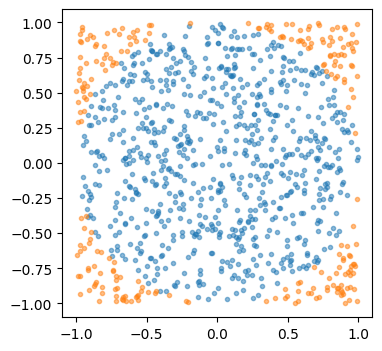

In [ ]:
import numpy
import matplotlib.pyplot as plt

#plt.style.use("bmh")
#%config InlineBackend.figure_formats=["png"]

N = 10_00
inside = [] ; outside = []

for i in range(N):

  x = numpy.random.uniform(-1, 1)
  y = numpy.random.uniform(-1, 1)

  if numpy.sqrt(x**2 + y**2) < 1:
    inside.append((x, y))
  else:
    outside.append((x, y))


plt.figure(figsize=(4, 4))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.5)
plt.scatter([x[0] for x in outside], [x[1] for x in outside], marker=".", alpha=0.5)

pi = 4 * len(inside)/float(N)

print(pi)

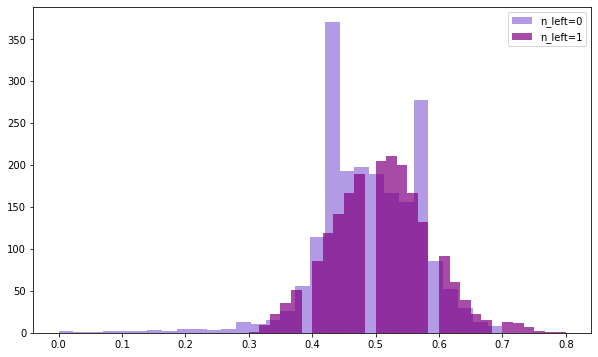

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(n/N,30,color='mediumpurple',label='n_left=0',alpha=0.7)
plt.hist(v/N2,30,color='purple',label='n_left=1',alpha=0.7)
plt.legend(loc='upper right')

In [ ]:
def secant(f, a, b, toler=1e-10):
    while f(b)!=0 and abs(b-a)>toler:
        a, b = b, b - f(b)*(b-a)/(f(b)-f(a))
    return b
secant(lambda x:1-2*x-x**5, 2, 1)

0.486389035934543

https://zingale.github.io/comp_astro_tutorial/basics/floating-point/numerical_error.html

In [ ]:
# the closer together we make these numbers, the larger
# the relative error
a = 1.e18
b = 1.000000001e18

# compute the two algebraically equivalent expressions
f = a**2 - b**2
g = (a - b) * (a + b)

# print both expressions and the relative error
print(f, g, abs((f-g)/g))

-1.9999999769683095e+27 -2.000000001e+27 1.201584528005781e-08


In [ ]:
!This code is used to calculate the first order derivative of a function
!This code is in FORTRAN!!

program deriv
  implicit none
  ! declare variables
  integer             :: i,upper,lower,N
  real                :: step
  !real, dimension(N) :: x, y, dy
  real, allocatable :: x(:), y(:),dy(:),dy2(:),diff(:)
  print*,'Enter value of upper'
  read*, upper
  print*,'Enter value of lower'
  read*, lower
  print*,'Enter step size'
  read*,step
  N=(upper-lower)/step
  allocate (x(N),y(N),dy(N),dy2(N),diff(N))    !allocate array size
  !assign data
  do i  =1,N
   x(i) = lower+i*step     !fill grid spaces
  end do
  !x = (/ 0., 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9, 1. /)    !Array constructor
  do i  =1,N
   y(i) = EXP(-(x(i)**2))
  end do
  ! compute derivation
  do i = 2, N-1
     dy(i) = (y(i+1) - y(i-1)) / (x(i+1) - x(i-1))  !derivative of function
  end do
  ! compute first and last derivation using linear extrapolation
  dy(1) = dy(2) + (dy(3)-dy(2))/(x(3)-x(2))*(x(1)-x(2))
  dy(N) = dy(N-1) + (dy(N-1)-dy(N-2))/(x(N-1)-x(N-2))*(x(N)-x(N-1))
  do i = 1, N
    diff(i)=dy(i)-((-2*x(i))*EXP(-(x(i)**2)))
  end do
 !print the results
 !write (*,'(4a10)') 'x', 'y=f(x)', 'dy/dx','d2y/dx2'
 write (*,'(5a10)') 'x', 'y=f(x)', 'dy/dx','diff','d2y/dx2'
  do i = 1, N
    write(*,'(5f10.2)') x(i), y(i), dy(i),diff(i),dy2(i)
  end do
end program deriv

h= 0.2


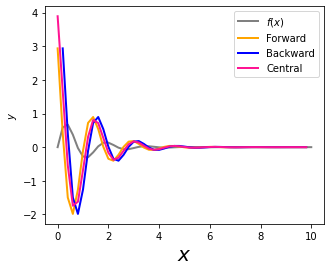

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=[] ; y=[]

lower=0 ; upper=10; step=0.2
N=int(((upper-lower)/step))
dy = [0]*N ; back=[0]*N ; forw=[0]*N


def f(x):
  return np.sin(4*x)*np.exp(-x)
for i in range(0,N+1):
  x_step = lower+i*step
  x.append(x_step)
  y.append(f(x[i]))

for i in range(1,N-1):
  dy[i]=(y[i+1] - y[i-1]) / (x[i+1] - x[i-1])  #central difference formula
for i in range(1,N):
  back[i]=(y[i] - y[i-1]) / (x[i] - x[i-1])    #backward difference
for i in range(0,N):
  forw[i]=(y[i+1] - y[i]) / (x[i+1] - x[i])    #forward difference


dy[0] = dy[1] + (dy[2]-dy[1])/(x[2]-x[1])*(x[0]-x[1])
dy[N-1] = dy[N-2] + (dy[N-2]-dy[N-3])/(x[N-2]-x[N-3])*(x[N-1]-x[N-2])

plt.figure(figsize=(5,4))
print('h=',step)
plt.plot(x,y,color='grey',linewidth=2.0,label=r'$f(x)$')
plt.plot(x[:-1],forw,color='orange',linewidth=2.0,label='Forward')
plt.plot(x[1:-1],back[1:],color='blue',linewidth=2.0,label='Backward')
plt.plot(x[:-1],dy,color='deeppink',linewidth=2.0,label='Central')
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$')
plt.legend(loc='upper right')

Text(0, 0.5, '$\\frac{\\delta y}{y}$')

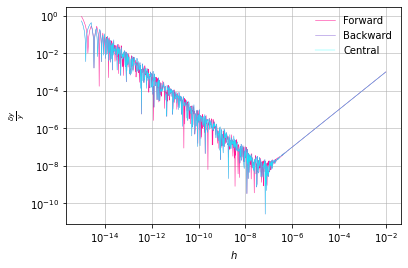

In [ ]:
#Nov 19,2022
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    """our function to numerically differentiate"""
    return x*x*x
def forwi(x, h):
    """a discrete approximation to the derivative at x"""
    return (f(x+h) - f(x))/h
def backi(x, h):
    return (f(x) - f(x-h))/h
def centri(x, h):
    return (f(x) - f(x-h))/h
def fprime(x):
    return 3*x*x
hs = np.logspace(-15, -2, 1000)   # generate a set of h's from 1.e-16 to 0.1
#x = np.pi/3.0                     # we'll look at the error at pi/3
x=10.0
forward  = forwi(x, hs)           #compute the numerical difference for all h's
backward = backi(x, hs)
central  = centri(x,hs)
ans = fprime(x)                  # get the analytic derivative
err1 = np.abs(forward  - ans)/ans  # compute the relative error
err2 = np.abs(backward - ans)/ans
err3 = np.abs(central  - ans)/ans
#fig = plt.figure()               # plot the error vs h
#ax = fig.add_subplot(111)
plt.grid(alpha=0.69)
plt.loglog(hs, err1,color='deeppink',linewidth=0.5,label='Forward')
plt.loglog(hs, err2,color='mediumpurple',linewidth=0.5,label='Backward')
plt.loglog(hs, err3,color='cyan',linewidth=0.3,label='Central')
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'$h$')
plt.ylabel(r'$\frac{\delta y}{y}$')

In [ ]:
def f(t, y):
    return -1.e3 * (y - np.exp(-t)) - np.exp(-t)

https://qsm.quantumtinkerer.tudelft.nl/1_basics_of_noise/

(-5.0, 5.0)

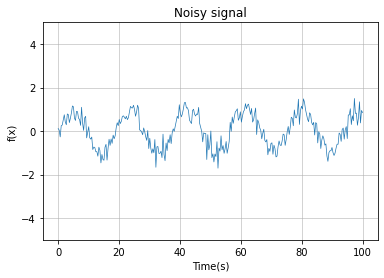

In [ ]:
mu, sigma = 0, 1
x = np.linspace(0,100,300)
x1 = np.asarray([np.random.normal(mu,sigma) for i in x])
def func(x,x1):
  return np.sin(x/3)+np.sin(x1/3)
plt.grid(alpha=0.69)
plt.legend(loc='upper right',frameon=False)
plt.plot(x,func(x,x1),linewidth=0.69)
plt.title("Noisy signal");plt.xlabel("Time(s)");plt.ylabel("f(x)")
plt.ylim(-5,5)

(-5.0, 5.0)

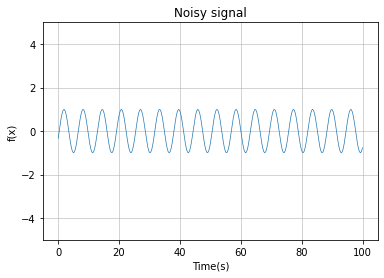

In [ ]:
mu, sigma = 0, 1
x = np.linspace(0,100,300)
def func(x):
  return np.sin(x+np.random.normal(0,0.3))
plt.grid(alpha=0.69)
plt.legend(loc='upper right',frameon=False)
plt.plot(x,func(x),linewidth=0.69)
plt.title("Noisy signal");plt.xlabel("Time(s)");plt.ylabel("f(x)")
plt.ylim(-5,5)

In [ ]:
b=np.random.normal(0,2)
print(b)

-0.32012181220981384


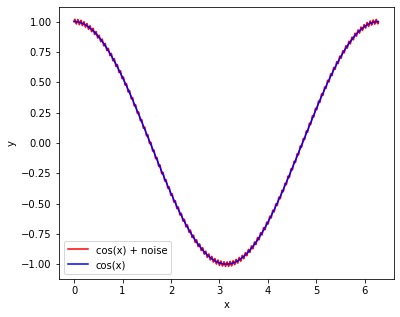

In [ ]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.02
y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

plt.figure(figsize=(6,5))
plt.plot(x, y_noise, 'r-',label = 'cos(x) + noise')
plt.plot(x, y, 'b-',label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

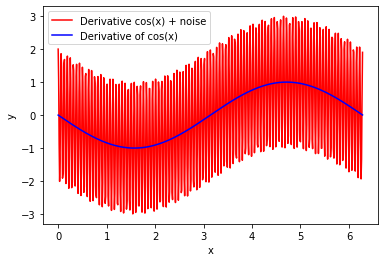

In [ ]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)
# Plot solution
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

In [ ]:
def f(x):
    return 5*x**3-3*x**2+2*x+1
a = -1
b =  1
# compute the 3 different approximations
I_r = f(a)*(b - a)                                       #Rectangular
I_t = 0.5*(f(a) + f(b))*(b - a)                          #Trapezoidal
I_s = (b - a)/ 6.0*(f(a) + 4*f((a + b)/2) + f(b))        #Simpson
I_a = 0                                                  #Analytical

print(I_r, I_t, I_s, I_a)

-18 -4.0 0.0 0


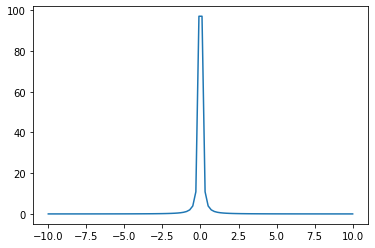

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
  return 1/(1e-4+x**2)
x_g=np.linspace(-10,10,100)
plt.plot(x_g,g(x_g))

I_r 382.18470200804234
I_t 252017147871.94287
I_s 84005715999.08205


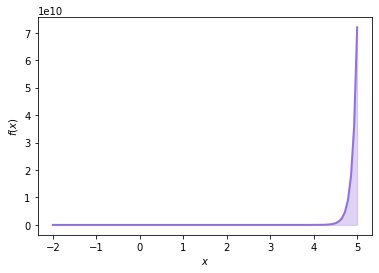

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/(np.exp(-x**2)+np.exp(-x**4))
a = -2
b = 5
# compute the 3 different approximations
I_r = f(a) * (b - a)                                     #rectangular
I_t = 0.5 * (f(a) + f(b)) * (b - a)                      #trapezoidal
I_s = (b - a) / 6.0 * (f(a) + 4 * f((a + b)/2) + f(b))   #Simpson

print('I_r',I_r)
print('I_t',I_t)
print('I_s',I_s)
x_c=np.linspace(a,b,100)
plt.plot(x_c,f(x_c),color='mediumpurple',linewidth=2.0,label='f(x)')
plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)$')
plt.fill_between(x_c, f(x_c), 0, color='mediumpurple', alpha=.3)

$$\int_{1}^{3}x^{2}ln(x)dx\approx 0.69986 $$

In [ ]:
#FORTRAN CODE 24 Nov 2022
program Integral

  implicit none
  integer            :: i,N
  real               :: f,a,b,I_t,I_s,I_r
  a = 0.0 ; b = 1.0
  I_r = f(a)*(b-a)
  I_t = 0.5*(f(a+f(b)))*(b-a)
  I_s = (b-a)/6.0*(f(a) + 4*f((a+b)/2) + f(b))
  write (*,'(3a10)') 'I_r','I_t','I_s'
  write(*,'(5f10.4)') I_r,I_t,I_s

end program Integral

REAL function f(x1)
REAL::x1
  f=x1**2
return
end function



In [ ]:
#gauss quadrature
def f(x):
  return 5*x**3-3*x**2+2*x+1
a = 2
b = 4
# compute the 3 different approximations
I_g1 = 2*f(0)
I_g2 = 1*f(-0.577)+1*f(0.577)
I_g3 = 0.888*f(0)+0.555*f(-0.744)+0.555*f(0.744)
I_g4 = 0.652*f(-0.347)+0.652*f(0.347)+0.347*f(-0.861)+0.347*f(-0.861)
print(I_g1,I_g2,I_g3,I_g4)

2 0.0024260000000002613 0.15472511999999994 -3.4263608420699985


$$I_2=w_1f(x_1)+w_2f(x_2)$$

In [ ]:
#gauss quadrature #20 Nov 2022
import numpy as np
def f(x):
    #return 1/(np.exp(np.sin(x**3)))
    #return 1/(np.log(x**2)+np.exp(x**3))
    return (np.sin(1/x*(2-x)))**2
a = 2
b = 4
x_1=[0]                         ; w_1 = [2]
x_2=[-0.577,0.577]              ; w_2 = [1.000,1.000]
x_3=[0.000,-0.744,0.744]        ; w_3 = [0.888,0.555,0.555]
x_4=[-0.339,0.339,-0.861,0.861] ; w_4 = [0.652,0.652,0.347,0.347]
I_1 = w_1[0]*(b-a)*0.5*(f((0.5*((b-a)*x_1[0]+(b+a)))))
I_2 = w_2[0]*(b-a)*0.5*(f((0.5*((b-a)*x_2[0]+(b+a)))))+ w_2[1]*(b-a)*0.5*(f((0.5*((b-a)*x_2[1]+(b+a)))))
I_3 = w_3[0]*(b-a)*0.5*(f((0.5*((b-a)*x_3[0]+(b+a)))))+ w_3[1]*(b-a)*0.5*(f((0.5*((b-a)*x_3[1]+(b+a)))))+ w_3[2]*(b-a)*0.5*(f((0.5*((b-a)*x_3[2]+(b+a)))))
#print(w_3[0]*(b-a)*0.5*(f((0.5*((b-a)*x_3[0]+(b-a))))))
I_4=0
for i in range(len(x_4)):
  I_4 = I_4 +w_4[i]*(b-a)*0.5*(f((0.5*((b-a)*x_4[i]+(b+a)))))
print(I_1, I_2,I_3,I_4)

0.21411273922305196 0.21226593692805398 0.21414448763619623 0.21478736927804282


In [ ]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

In [ ]:
f = lambda x: x*np.exp(x)
quad(f, 0, 3)

(41.171073846375336, 4.570907413278851e-13)

In [ ]:
x = smp.symbols('x', real=True)
f = (1+smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)
smp.integrate(f, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

0.7992288630651051


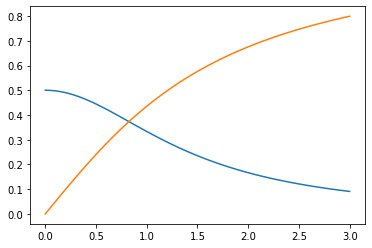

In [ ]:
x_test =np.linspace(0,3,100)
y_test =1/(2+x_test*x_test)
plt.plot(x_test,y_test)
I_nt = cumulative_trapezoid(y_test,x_test, initial=0)
print(I_nt[-1])
plt.plot(x_test,I_nt)

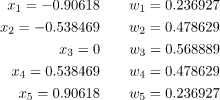

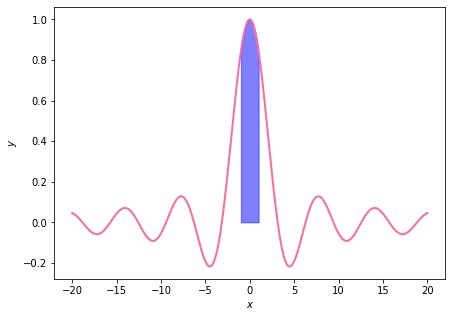

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-20,20,500)
def analytic(x):
  return np.sin(x)/x
plt.figure(figsize=(7,5));
#plt.xlim([0.1,150]);
#plt.ylim([0,20])
xcord=np.linspace(-1,1,100)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.fill_between(xcord,analytic(xcord),color='blue',alpha=0.5)
plt.plot(x,analytic(x),linewidth=2.0,color='#FD6c9E')

A = -0.03999999999999968


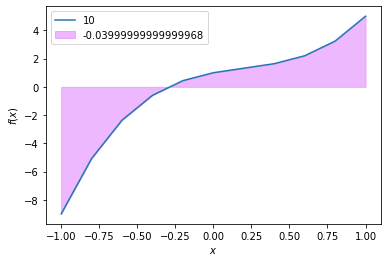

In [ ]:
#Trapezoid 31 Dec 2022

import numpy as np
import matplotlib.pyplot as plt
a = -1; b = 1
N = 10
x = np.linspace(a,b,N+1)
#y = 1 + 0.25*x*np.sin(np.pi*x);
y  = 5*x**3-3*x**2+2*x+1
y_right = y[1:] #Riemann Right sum
y_left = y[:-1] #Riemann Left sum
dx = (b - a)/N
A = (dx/2)*np.sum(y_right + y_left)
print("A =",A)
plt.plot(x,y,label=N)
plt.fill_between(x,y,color='#DF73FF',alpha=0.5,label=A)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

I_t = 1.2627294795933854
Error_I_t= 0.07027052040661452


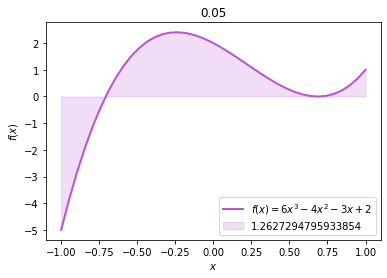

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = -1 ; b =1
h = 0.05
n = int((b-a)/(h))
x = np.linspace(a, b, n)
#f = 5*x**3-3*x**2+2*x+1
f=6*x**3-4*x**2-3*x+2

I_trap  = (h/2)*(f[0]+2*sum(f[1:n-2:1])+f[n-1])
analyt  = 1.333            #analytical result
error   = analyt-I_trap  #error
print('I_t =',I_trap)

plt.plot(x,f,color='mediumorchid',linewidth=2.0,label=r'$f(x)=6x^{3}-4x^{2}-3x+2$')
plt.fill_between(x, f, 0, color='mediumorchid', alpha=.2,label=I_trap)
plt.title(h)0
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()
#print('I_t =',I_trap)
print('Error_I_t=',error)

In [ ]:
#Gauss Legendre Quadrature
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    #return 1/(2+x**2)
    return x**2
a = 0
b = 1
x_1 = [0]                                       ; w_1 = [2]
x_2 = [-0.577,0.577]                            ; w_2 = [1.000,1.000]
x_3 = [0.000,-0.744,0.744]                      ; w_3 = [0.888,0.555,0.555]
x_4 = [-0.339,0.339,-0.861,0.861]               ; w_4 = [0.652,0.652,0.347,0.347]
x_5=  [-0.90618,-0.538469,0,0.538469,0.909618]  ; w_5 = [0.236927,0.478629,0.56889,0.478629,0.236927]
integral=0
N=2
if N == 1:
    integral += w_1[0]*(b-a)*0.5*(f((0.5*((b-a)*x_1[0]+(b+a)))))
elif N == 2:
  for i in range(len(x_2)):
      integral += +w_2[i]*(b-a)*0.5*(f((0.5*((b-a)*x_2[i]+(b+a)))))
elif N == 3:
  for i in range(len(x_3)):
      integral += w_3[i]*(b-a)*0.5*(f((0.5*((b-a)*x_3[i]+(b+a)))))
elif N == 4:
    for i in range(len(x_4)):
      integral += w_4[i]*(b-a)*0.5*(f((0.5*((b-a)*x_4[i]+(b+a)))))
else :
    for i in range(len(x_5)):
      integral += w_5[i]*(b-a)*0.5*(f((0.5*((b-a)*x_5[i]+(b+a)))))
print(integral)

0.33323225


In [ ]:
#Gauss Chebyshev quadrature
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    #return 1/(2+x**2)
    return 1+0.25*x*np.sin(3.14*x)
a = 0.5
b = 1.5
x_2 = [-0.7071068,0.7071068]                       ; w_2 = [1.5707963,1.5707963]
x_3 = [0.0000,0.8660254,-0.8660254]                ; w_3 = [1.0471976,1.0471976,1.047196]
x_4 = [0.3826834,-0.3826834,0.9238795,-0.9238795]  ; w_4 = [0.7853982,0.7853982,0.7853982,0.7853982]
integral=0
N=1
if N == 1:
    integral += w_1[0]*(b-a)*0.5*(f((0.5*((b-a)*x_1[0]+(b+a)))))
elif N == 2:
  for i in range(len(x_2)):
      integral += +w_2[i]*(b-a)*0.5*(f((0.5*((b-a)*x_2[i]+(b+a)))))
elif N == 3:
  for i in range(len(x_3)):
      integral += w_3[i]*(b-a)*0.5*(f((0.5*((b-a)*x_3[i]+(b+a)))))
elif N == 4:
    for i in range(len(x_4)):
      integral += w_4[i]*(b-a)*0.5*(f((0.5*((b-a)*x_4[i]+(b+a)))))
else :
    for i in range(len(x_5)):
      integral += w_5[i]*(b-a)*0.5*(f((0.5*((b-a)*x_5[i]+(b+a)))))
print(integral)

1.4598072155358004


In [ ]:
#Gauss Hermite quadrature
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    #return 1/(2+x**2)
    return 1+0.25*x*np.sin(3.14*x)
a = 0.5
b = 1.5
x_2 = [-0.7071068,0.7071068]                       ; w_2 = [0.8862269,0.8862269]
x_3 = [0.0000,1.2247449,-1.2247449]                ; w_3 = [1.1816359,0.2954090,-0.2954090]
x_4 = [0.5246476,-0.5246476,1.6506801,-1.6506081]  ; w_4 = [0.8049141,0.8049141,0.0813128,0.0813128]
integral=0
N=4
if N == 1:
    integral += w_1[0]*(b-a)*0.5*(f((0.5*((b-a)*x_1[0]+(b+a)))))
elif N == 2:
  for i in range(len(x_2)):
      integral += +w_2[i]*(b-a)*0.5*(f((0.5*((b-a)*x_2[i]+(b+a)))))
elif N == 3:
  for i in range(len(x_3)):
      integral += w_3[i]*(b-a)*0.5*(f((0.5*((b-a)*x_3[i]+(b+a)))))
elif N == 4:
    for i in range(len(x_4)):
      integral += w_4[i]*(b-a)*0.5*(f((0.5*((b-a)*x_4[i]+(b+a)))))
else :
    for i in range(len(x_5)):
      integral += w_5[i]*(b-a)*0.5*(f((0.5*((b-a)*x_5[i]+(b+a)))))
print(integral)

0.8389197809665616


In [ ]:
#FORTRAN gauss code
program gaussquad
  implicit none
  ! declare variables
  integer            :: i,N
  real               :: f,integral,a,b
  real, dimension(1) :: x_1,w_1
  real, dimension(2) :: x_2,w_2
  real, dimension(3) :: x_3,w_3
  real, dimension(4) :: x_4,w_4

  x_1=(/0/)                         ; w_1 = (/2/)
  x_2=(/-0.577,0.577/)              ; w_2 = (/1.000,1.000/)
  x_3=(/0.000,-0.744,0.744/)        ; w_3 = (/0.888,0.555,0.555/)
  x_4=(/-0.339,0.339,-0.861,0.861/) ; w_4 = (/0.652,0.652,0.347,0.347/)

  a = 0.0
  b = 3.0
  N = 4
  do i = 1,N
     integral = integral+ w_4(i)*(b-a)*0.5*(f((0.5*((b-a)*x_4(i)+(b-a)))))
  end do
 write (6,9) 'I=',integral
9 FORMAT(1a3,2f10.6)
end program gaussquad

REAL function f(x1)
REAL::x1
  f=x1*EXP(x1)
return
end function

In [ ]:
import numpy as np
def f(x):
    return 1 + 0.25 * x * np.sin(np.pi * x)

def I_t(x):
    """composite trapezoid rule"""
    N = len(x)-1
    I = 0.0
    for n in range(N):
        I += 0.5*(x[n+1] - x[n]) * (f(x[n]) + f(x[n+1]))
    return I

def I_s(x):
    """composite Simpsons rule"""
    N = len(x)-2
    I = 0.0
    for n in range(0, N, 2):
        dx = x[n+1]-x[n]
        I += dx/3.0*(f(x[n])+ 4*f(x[n+1]) + f(x[n+2]))
    return I
# integration bounds
a = 0.5; b = 1.5
points=3000
x = np.linspace(a,b,points)
trap_res=I_t(x)
simp_res=I_s(x)
print(trap_res,np.abs(I_a-trap_res))
print(simp_res,np.abs(I_a-simp_res))
# analytic solution
I_a = 1 - 1/(2 * np.pi**2)

0.9493394035461136 4.632717542918385e-09
0.9491309914568814 0.00020841672194971128


I_s = -0.5275279983366776
I_t = -0.22590316761914406
Error_I_s= 0.5275279983366776
Error_I_t= 0.22590316761914406


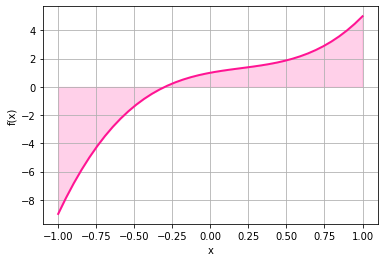

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = -1 ; b =1
h=0.05
n = int((b-a)/(h))
x = np.linspace(a, b, n)

f = 5*x**3-3*x**2+2*x+1
#f  = x**2
I_simp  = (h/3)*(f[0] + 4*sum(f[1:n-1:2]) + 2*sum(f[:n-2:2])+f[n-1])
I_trap  = (h/2)*(f[0]+2*sum(f[1:n-2:1])+f[n-1])
I_ana    = 0.0

err_simp =  I_ana - I_simp
err_trap =  I_ana - I_trap

plt.plot(x,f,color='deeppink',linewidth=2.0,label='f(x)')
plt.fill_between(x, f, 0, color='deeppink', alpha=.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
print('I_s =',I_simp)
print('I_t =',I_trap)
print('Error_I_s=',err_simp)
print('Error_I_t=',err_trap)

In [ ]:
import scipy.integrate as integrate
f = lambda x : np.exp(x)
a = 0.; b = 3;
I = integrate.quad(f,a,b)
print('The approximate value is f%',I[0])

The approximate value is f% 19.085536923187668


NameError: ignored

In [ ]:
from math import exp
import numpy as np
from sympy import Symbol, integrate, exp, oo

# function for the trapezoidal rule
def TrapezoidalRule(a,b,f,n):
   h = (b-a)/float(n)
   s = 0
   x = a
   for i in range(1,n,1):
       x = x+h
       s = s+ f(x)
   s = 0.5*(f(a)+f(b)) +s
   return h*s

# function for the Gaussian quadrature with Laguerre polynomials
def GaussLaguerreRule(n):
   s = 0
   xgauleg, wgauleg = np.polynomial.laguerre.laggauss(n)
   for i in range(1,n,1):
       s = s+ xgauleg[i]*xgauleg[i]*wgauleg[i]
   return s

#  function to compute
def function(x):
    return x*x*exp(-x)


# Integration limits for the Trapezoidal rule
a = 0.0; b = 10000.0
# define x as a symbol to be used by sympy
x = Symbol('x')
# find result from sympy
exact = integrate(function(x), (x, a, oo))
# set up the arrays for plotting the relative error
n = np.zeros(40); Trapez = np.zeros(4); LagGauss = np.zeros(4);
# find the relative error as function of integration points
for i in range(1, 3, 1):
    npts = 10**i
    n[i] = npts
    Trapez[i] = abs((TrapezoidalRule(a,b,function,npts)-exact)/exact)
    LagGauss[i] = abs((GaussLaguerreRule(npts)-exact)/exact)
print("Integration points=", n[1], n[2])
print("Trapezoidal relative error=", Trapez[1], Trapez[2])
print("LagGuass relative error=", LagGauss[1], LagGauss[2])

Integration points= 10.0 100.0
Trapezoidal relative error= 1.0 1.0
LagGuass relative error= 0.002928191982085049 3.7659283941282595e-06


-1.3
-2.6057971014492756
-2.0947917737398534
-1.907089621108938
-1.8799376384646134
root = -1.8793854679155002


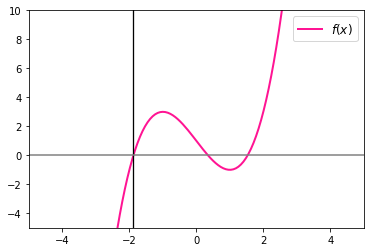

In [ ]:
#Last update:Piyush
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,10,200)

def f(x):     #function
  return x**3-3*x+1
def f_prime(x):   #first derivative
  return 3*x**2-3
def newtoroot(f, df, x0, tol):  #newton raphson method
    if abs(f(x0)) < tol:
        return x0
    else:
        print(x0)
        return newtoroot(f, df, x0 - f(x0)/df(x0), tol)

result = newtoroot(f,f_prime, -1.3, 1e-5) #broo nikal root nikaal
print("root =", result)
plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.axvline(x=result,color='black',linewidth=1.3);plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

-2
-1.8806584362139918
root = -1.879385243567535


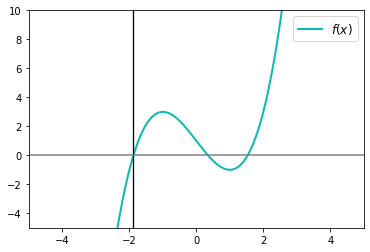

In [ ]:
#Chebyshev Method
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,10,200)

def f(x):           #function
  return x**3-3*x+1
def f_prime(x):     #first derivative
  return 3*x**2-3
def f_2prime(x):    #second derivative
  return 6*x
def chebyroot(f, df, x0, tol):  #chebyshev
    if abs(f(x0)) < tol:
        return x0
    else:
        print(x0)
        return chebyroot(f, df, x0 - f(x0)/df(x0)-0.5*f_2prime(x0)*((f(x0)**2)/(f_prime(x0))**3), tol)

result = chebyroot(f,f_prime, -2, 1e-5)
print("root =", result)
plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='#0ABAB5')
plt.axvline(x=result,color='black',linewidth=1.3);plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

In [ ]:
#Jan 1 2022
PROGRAM CHEBYSHEV
IMPLICIT NONE
REAL           :: A,B,tol,DX,X0,X1,DF,F,D2F
INTEGER        :: I

      tol = 1.0E-06
      A  = -3.0 ; B  = 0.0
      DX = B-A
      X0 = (A+B)/2.0 !midpoint
      I = 0
  DO 21 WHILE (ABS(DX).GT.tol)
        X1 = X0 - F(X0)/DF(X0)-0.5*D2F(X0)*((F(X0))**2/DF(X0)**3)
        DX = X1 - X0
        X0 = X1
        I = I + 1  !step
  21 END DO
      WRITE (6,9) I,X0,DX
      STOP
  9 FORMAT (I4,2F16.8)
END PROGRAM CHEBYSHEV

FUNCTION F(X)
  F = X**3-3*X+1
RETURN
END

FUNCTION DF(X)
  DF = 3*X**2-3
RETURN
END

FUNCTION D2F(X)
  D2F = 6*X
RETURN
END


-1.3
-1.677376472016511
-1.874627317955854
root = -1.8793851960842431


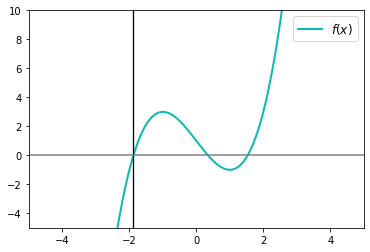

In [ ]:
#Halley Method
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,10,200)

def f(x):           #function
  return x**3-3*x+1
def f_prime(x):     #first derivative
  return 3*x**2-3
def f_2prime(x):    #second derivative
  return 6*x
def chebyroot(f, df, x0, tol):  #Halley
    if abs(f(x0)) < tol:
        return x0
    else:
        print(x0)
        return halleyroot(f, df, x0 - (2*f(x0)*f_prime(x0))/(2*(f_prime(x0)**2)-f(x0)*f_2prime(x0)), tol)

result = chebyroot(f,f_prime, -1.3, 1e-5)
print("root =", result)
plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='#0ABAB5')
plt.axvline(x=result,color='black',linewidth=1.3);plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

1
2.0
1.75
1.7321428571428572
root = 1.7320508100147276


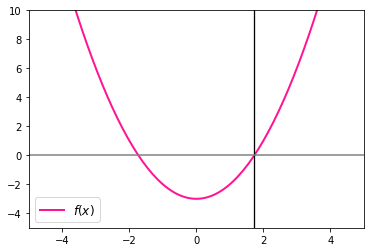

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,10,200)
a=  3
k = 2
def f(x):          #function
  return x**k-a
def f_prime(x):   #first derivative
  return k*x**(k-1)
def newtoroot(f, df, x0, tol):  #newton raphson method
    if abs(f(x0)) < tol:
        return x0
    else:
        print(x0)
        return newtoroot(f, df, x0 - f(x0)/df(x0), tol)

result = newtoroot(f,f_prime, 1, 1e-5) #broo nikal root nikaal
print("root =", result)
plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.axvline(x=result,color='black',linewidth=1.3);plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

In [ ]:
def f(x):
  return x**3-3*x+1

def secant(f, a, b, toler):
    while f(b)!=0 and abs(b-a)>toler:
        a, b = b, b - f(b)*(b-a)/(f(b)-f(a))
    return b

secant(f,1.0,3.0,1e-3)

1.5320890539396204

In [ ]:
#Jan1 2022

    PROGRAM SECANTROOT
      DL = 1.0E-06
      A  = 10.0
      B  = 30.0
      DX = (B-A)/10.0
      X0 = (A+B)/2.0
      CALL SECANT (DL,X0,DX,ISTEP)
    END PROGRAM SECANTROOT

    SUBROUTINE SECANT (DL,X0,DX,ISTEP)
    !Subroutine for the root of f(x)=0 with the secant method.
      I = 0
      X1 = X0 + DX
     DO 21  WHILE (ABS(DX).GT.DL) !stop the loop when
        X2 = X1 - F(X1)*(X1-X0)/(F(X1) - F(X0))
        X0 = X1
        X1 = X2
        DX = X1 - X0
        I = I + 1
        WRITE (6,9) I,X0,DX
        9 FORMAT (I4,2F16.8)
  21 END DO
     RETURN
     END

      FUNCTION F(X)
        F = X**2-612
      RETURN
      END

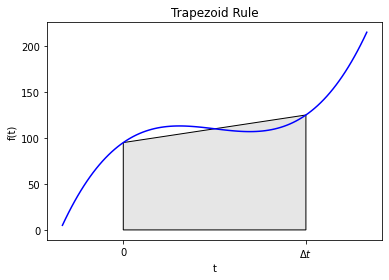

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
f = lambda x: (x-3)*(x-5)*(x-7)+110
x = np.linspace(0,10,100)
plt.plot(x,f(x),label="f(x)",color="blue")
ax = plt.gca()
a = 2;b = 8
verts = [(a,0),(a,f(a)), (b,f(b)),(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
ax.set_xticks((a,b))
ax.set_xticklabels(('0','$\Delta t$'))
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Trapezoid Rule")
plt.show()

In [ ]:
from scipy.integrate import quad
def f(x):
  return 3.0*x*x + 1.0
I, err = quad(f, 0, 1)
print(I,err)

2.0 2.220446049250313e-14


In [ ]:
from scipy.integrate import dblquad
area = dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)
print(area)

(0.010416666666666668, 4.101620128472366e-16)


Optimal parameters are a=2.4805, b=1.24503, and c=0.489509


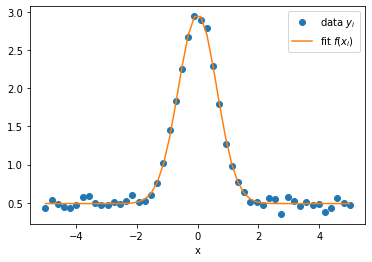

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def f(x,a,b,c):
    return a*np.exp(-b*x**2) + c
x = np.linspace(-5,5,50)
y = f(x,a=2.5,b=1.3,c=0.5)
#add noise
yi = y + 0.05 * np.random.normal(size=len(x))
#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

import matplotlib.pyplot as plt
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])
plt.plot(x, yi, 'o', label='data $y_i$')
plt.plot(x, yfitted, '-', label='fit $f(x_i)$')
plt.xlabel('x')
plt.legend()

Exact parameters:
x0, y0, ap, bp, phi = 4 -3.5 7 3 0.7853981633974483
Fitted parameters:
a, b, c, d, e, f = [ -0.51660429   0.69653587  -0.49795361   6.48492396  -6.24362499
 -16.1735249 ]
x0, y0, ap, bp, e, phi =  3.879009412946607 -3.556311014194732 6.873304757442906 2.9617956117556474 0.9023935293841796 0.7987831327730351


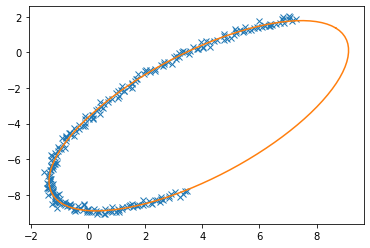

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def fit_ellipse(x, y):
    """

    Fit the coefficients a,b,c,d,e,f, representing an ellipse described by
    the formula F(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0 to the provided
    arrays of data points x=[x1, x2, ..., xn] and y=[y1, y2, ..., yn].

    Based on the algorithm of Halir and Flusser, "Numerically stable direct
    least squares fitting of ellipses'.


    """

    D1 = np.vstack([x**2, x*y, y**2]).T
    D2 = np.vstack([x, y, np.ones(len(x))]).T
    S1 = D1.T @ D1
    S2 = D1.T @ D2
    S3 = D2.T @ D2
    T = -np.linalg.inv(S3) @ S2.T
    M = S1 + S2 @ T
    C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)
    M = np.linalg.inv(C) @ M
    eigval, eigvec = np.linalg.eig(M)
    con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
    ak = eigvec[:, np.nonzero(con > 0)[0]]
    return np.concatenate((ak, T @ ak)).ravel()


def cart_to_pol(coeffs):
    """

    Convert the cartesian conic coefficients, (a, b, c, d, e, f), to the
    ellipse parameters, where F(x, y) = ax^2 + bxy + cy^2 + dx + ey + f = 0.
    The returned parameters are x0, y0, ap, bp, e, phi, where (x0, y0) is the
    ellipse centre; (ap, bp) are the semi-major and semi-minor axes,
    respectively; e is the eccentricity; and phi is the rotation of the semi-
    major axis from the x-axis.

    """

    # We use the formulas from https://mathworld.wolfram.com/Ellipse.html
    # which assumes a cartesian form ax^2 + 2bxy + cy^2 + 2dx + 2fy + g = 0.
    # Therefore, rename and scale b, d and f appropriately.
    a = coeffs[0]
    b = coeffs[1] / 2
    c = coeffs[2]
    d = coeffs[3] / 2
    f = coeffs[4] / 2
    g = coeffs[5]

    den = b**2 - a*c
    if den > 0:
        raise ValueError('coeffs do not represent an ellipse: b^2 - 4ac must'
                         ' be negative!')

    # The location of the ellipse centre.
    x0, y0 = (c*d - b*f) / den, (a*f - b*d) / den

    num = 2 * (a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g)
    fac = np.sqrt((a - c)**2 + 4*b**2)
    # The semi-major and semi-minor axis lengths (these are not sorted).
    ap = np.sqrt(num / den / (fac - a - c))
    bp = np.sqrt(num / den / (-fac - a - c))

    # Sort the semi-major and semi-minor axis lengths but keep track of
    # the original relative magnitudes of width and height.
    width_gt_height = True
    if ap < bp:
        width_gt_height = False
        ap, bp = bp, ap

    # The eccentricity.
    r = (bp/ap)**2
    if r > 1:
        r = 1/r
    e = np.sqrt(1 - r)

    # The angle of anticlockwise rotation of the major-axis from x-axis.
    if b == 0:
        phi = 0 if a < c else np.pi/2
    else:
        phi = np.arctan((2.*b) / (a - c)) / 2
        if a > c:
            phi += np.pi/2
    if not width_gt_height:
        # Ensure that phi is the angle to rotate to the semi-major axis.
        phi += np.pi/2
    phi = phi % np.pi

    return x0, y0, ap, bp, e, phi


def get_ellipse_pts(params, npts=100, tmin=0, tmax=2*np.pi):
    """
    Return npts points on the ellipse described by the params = x0, y0, ap,
    bp, e, phi for values of the parametric variable t between tmin and tmax.

    """

    x0, y0, ap, bp, e, phi = params
    # A grid of the parametric variable, t.
    t = np.linspace(tmin, tmax, npts)
    x = x0 + ap * np.cos(t) * np.cos(phi) - bp * np.sin(t) * np.sin(phi)
    y = y0 + ap * np.cos(t) * np.sin(phi) + bp * np.sin(t) * np.cos(phi)
    return x, y


if __name__ == '__main__':
    # Test the algorithm with an example elliptical arc.
    npts = 250
    tmin, tmax = np.pi/6, 4 * np.pi/3
    x0, y0 = 4, -3.5
    ap, bp = 7, 3
    phi = np.pi / 4
    # Get some points on the ellipse (no need to specify the eccentricity).
    x, y = get_ellipse_pts((x0, y0, ap, bp, None, phi), npts, tmin, tmax)
    noise = 0.1
    x += noise * np.random.normal(size=npts)
    y += noise * np.random.normal(size=npts)

    coeffs = fit_ellipse(x, y)
    print('Exact parameters:')
    print('x0, y0, ap, bp, phi =', x0, y0, ap, bp, phi)
    print('Fitted parameters:')
    print('a, b, c, d, e, f =', coeffs)
    x0, y0, ap, bp, e, phi = cart_to_pol(coeffs)
    print('x0, y0, ap, bp, e, phi = ', x0, y0, ap, bp, e, phi)

    plt.plot(x, y, 'x')     # given points
    x, y = get_ellipse_pts((x0, y0, ap, bp, e, phi))
    plt.plot(x, y)
    plt.show()

Text(0.5, 0, 'x')

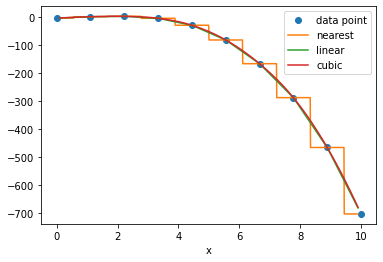

In [ ]:
import numpy as np
import scipy.interpolate
import pylab

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    x = np.linspace(0, 10, n)
    y = - x**3+3*x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y
n = 10
x, y = create_data(n)
#use finer and regular mesh for plot
xfine = np.linspace(0.1, 9.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

<ipython-input-18-e4ecc3d96ed4>:12: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t=scipy.arange(0,signal_length,dt) #the time vector
<ipython-input-18-e4ecc3d96ed4>:16: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  y=scipy.sin(3*pi*50*t)+scipy.sin(2*pi*70*t+pi/4)
<ipython-input-18-e4ecc3d96ed4>:22: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  freqs=df*scipy.arange(0,(n_t-1)/2.,dtype='d') #d=double precision float


Text(0, 0.5, 'abs(DFT(signal))')

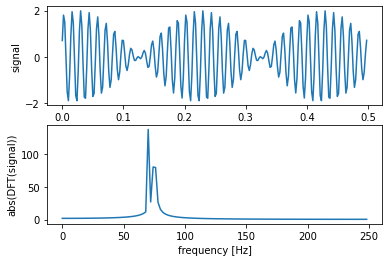

In [ ]:
import scipy
from scipy.fft import fft
import matplotlib.pyplot as plt
pi = scipy.pi

signal_length = 0.5   #[seconds]
sample_rate=500       #sampling rate [Hz]
dt = 1./sample_rate   #time between two samples [s]
df = 1/signal_length  #frequency between points in
                      #in frequency domain [Hz]
t=scipy.arange(0,signal_length,dt) #the time vector
n_t=len(t)            #length of time vector
#create signal
y=scipy.sin(3*pi*50*t)+scipy.sin(2*pi*70*t+pi/4)

#compute fourier transform
f=fft(y)
#work out meaningful frequencies in fourier transform
freqs=df*scipy.arange(0,(n_t-1)/2.,dtype='d') #d=double precision float
n_freq=len(freqs)
#plot input data y against time
plt.subplot(2,1,1)
plt.plot(t,y,label='input data')
plt.xlabel('time [s]')
plt.ylabel('signal')

#plot frequency spectrum
plt.subplot(2,1,2)
plt.plot(freqs,abs(f[0:n_freq]),
         label='abs(fourier transform)')
plt.xlabel('frequency [Hz]')
plt.ylabel('abs(DFT(signal))')

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Start search at x=1., minimum is [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Start search at x=2., minimum is [3.13847656]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.cos is deprecated and will be rem

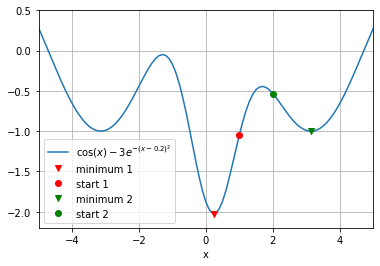

In [ ]:
from scipy import arange, cos, exp
from scipy.optimize import fmin
import pylab

def f(x):
    return cos(x) - 3 * exp( -(x - 0.2) ** 2)

# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

# plot function
x = arange(-10, 10, 0.1)
y = f(x)
pylab.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
pylab.xlabel('x')
pylab.grid()
pylab.axis([-5, 5, -2.2, 0.5])

# add minimum1 to plot
pylab.plot(minimum1, f(minimum1), 'vr',
           label='minimum 1')
# add start1 to plot
pylab.plot(1.0, f(1.0), 'or', label='start 1')

# add minimum2 to plot
pylab.plot(minimum2,f(minimum2),'vg',\
           label='minimum 2')
# add start2 to plot
pylab.plot(2.0,f(2.0),'og',label='start 2')

pylab.legend(loc='lower left')

In [ ]:
import scipy.integrate as spi
import numpy as np

integrand = lambda x : 2*x*np.exp(-x)
a = 1.
b = 5.
result, error = spi.quad(integrand, a, b)
print('Result is ', result, 'with error ', error)

Result is  1.3906624006967436 with error  1.54394541673402e-14


In [ ]:
result, none = spi.fixed_quad(integrand, a, b, n=5)
print('Result is ', result)

Result is  1.39066368239563


In [ ]:
result, error = spi.quadrature(integrand, a, b)
print('Result is ', result, 'with error ', error)

Result is  1.3906624007789083 with error  1.225092050027854e-08


In [ ]:
result, none = spi.fixed_quad(integrand, a, b, n=5)
print('Result is ', result)

Result is  1.39066368239563


In [ ]:
a = 1.
b = 5.
step = 1e-4
xs = np.arange(a, b, step)
ys = integrand(xs)
result = spi.trapezoid(ys, xs)
print('Result is ', result)

Result is  1.3906556624352673


In [ ]:
a = 1.
b = 5.
step = 1e-4

xs = np.arange(a, b, step)
ys = integrand(xs)

result = spi.cumulative_trapezoid(ys, xs)
result = result[-1]
print('Result is ', result)

Result is  1.3906556624352677


In [ ]:
a = 1.
b = 5.
step = 1e-4

xs = np.arange(a, b, step)
ys = integrand(xs)

result = spi.simpson(ys, xs)
print('Result is ', result)

Result is  1.3906556624801614


In [ ]:
integrand = lambda x : 2 * x * np.exp(-x)
a = 1.
b = np.inf
result, error = spi.quad(integrand, a, b)
print('Result is ', result, 'with error ', error)

Result is  1.4715177646857691 with error  3.7568301883294814e-10


In [ ]:
import numpy as np
from scipy import integrate

f = lambda y, x: x*y**2
integrate.dblquad(f, 0, 2, 0, 1)

(0.6666666666666667, 7.401486830834377e-15)

In [ ]:
https://computationalmindset.com/en/mathematics/integral-calculus-in-python.html

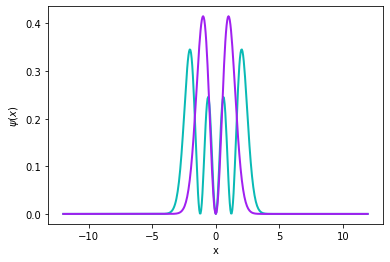

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.hermite as Herm
import math
m=1.0
w=1.0
hbar=1.0
dx = 0.05
x_lim =12
x = np.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = np.sqrt(m*w/hbar)*x
    herm_coeffs = np.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)

def wavefunction(x,n):
    xi = np.sqrt(m*w/hbar)*x
    psi = 1./math.sqrt(2.**n * math.factorial(n))*(m*w/(np.pi*hbar))**(0.25)*np.exp(- xi**2 / 2) * hermite(x,n)
    return psi

plt.plot(x, stationary_state(x,3)**2,linewidth=2.0,color='#0ABAB5')
plt.plot(x, stationary_state(x,1)**2,linewidth=2.0,color='#A020F0')
plt.xlabel(r"x")
plt.ylabel(r"$\psi(x)$")
plt.show()

Text(0, 0.5, '$\\psi^{2}(x)$')

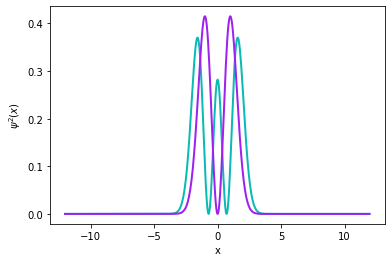

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.hermite as Herm
import math
m=1.0
w=1.0
hbar=1.0
dx = 0.05
x_lim =12
x = np.arange(-x_lim,x_lim,dx)

def hermite(x, n):         #Hermite function
    if (n==1):
      return 2*x
    elif n==2:
      return 4*x**2-2
    elif n==3 :
      return 8*x**3-12*x
    elif n==4:
      return 16*x**4-48*x**2+12
    elif n==5:
      return 32*x**5-160*x**3+120*x

def wavefunction(x,n):
    xi = np.sqrt(m*w/hbar)*x
    wavi = 1./math.sqrt(2.**n*math.factorial(n))*(m*w/(np.pi*hbar))**(0.25)*np.exp(-xi**2/2)*hermite(x,n)
    return wavi

plt.plot(x, stationary_state(x,2)**2,linewidth=2.0,color='#0ABAB5')
plt.plot(x, stationary_state(x,1)**2,linewidth=2.0,color='#A020F0')
plt.xlabel(r"x")
plt.ylabel(r"$\psi^{2}(x)$")

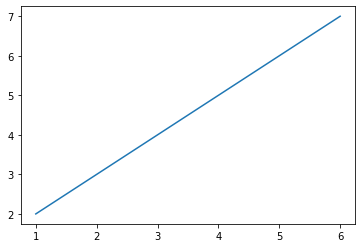

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt('poing.txt')
x1  = data[:,0]
x2  = data[:,1]

plt.plot(x1,x2)

y = 300.77169407920707 + -0.01295431980196626 x


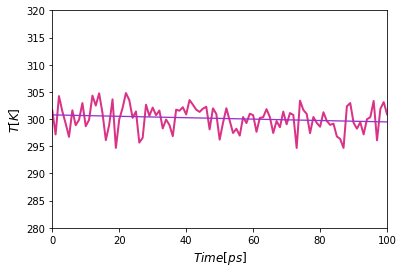

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#x = [1,2,3]
#y = [3,2,9]
sumX,sumX2,sumY,sumXY = 0,0,0,0
data=np.loadtxt('poing.txt')
x  = data[:,0]
y  = data[:,1]
n  = len(x)
for i in range(n):
    sumX =  sumX  + x[i]
    sumX2 = sumX2 + x[i]*x[i]
    sumY =  sumY  + y[i]
    sumXY = sumXY + x[i]*y[i]
b = (n*sumXY-sumX*sumY)/(n*sumX2-sumX*sumX)
a = (sumY - b*sumX)/n

print('y', '=', a, '+', b,'x')
xco=np.linspace(x[0],x[-1],100)
plt.xlim([0,100])
plt.ylim([280,320])
plt.xlabel('$Time [ps]$',fontsize=12)
plt.ylabel('$T [K]$',fontsize=12)
plt.plot(x,y,linewidth=2.0,color='#DA3287')
plt.plot(xco,a+b*xco,linewidth=1.3,color='#9932CC')

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

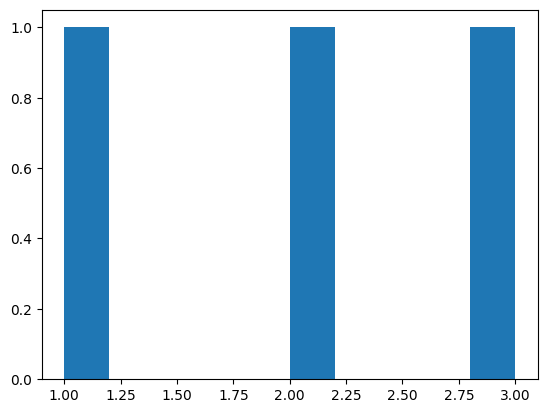

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y = [1,2,3]
xco=np.linspace(x[0],x[-1],100)
plt.hist(y)
#plt.ylim([280,320])
#plt.xlabel('$Time [ps]$',fontsize=12)
#plt.ylabel('$T [K]$',fontsize=12)
#plt.plot(x,y,linewidth=2.0,color='#DA3287')
#plt.plot(xco,a+b*xco,linewidth=1.3,color='#9932CC')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
[301.634277 297.174927 304.236694 301.450134 299.187195 296.727051
 301.615021 298.864349 299.871307 302.94931  298.692413 299.86142
 304.322083 302.488373 304.742767 301.128998 296.120056]
20 -10541643.142196223


Text(0, 0.5, '$T [K]$')

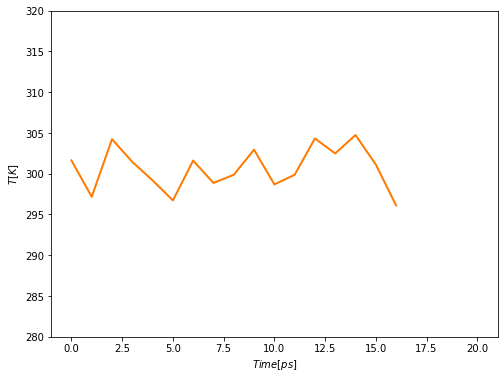

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = np.loadtxt('data.txt')
x = data1[:,0]
y = data1[:,1]

n = len(x)
xp       = 20   #x value at which point should be interpolated
y_interp = 0
for i in range(n):
  p = 1
  for j in range(n):
    if i!=j:
      p = p*(xp-x[j])/(x[i]-x[j])
  y_interp = y_interp + p*y[i]
print(xp, y_interp)
plt.figure(figsize = (8,6))
plt.ylim([290,320])
plt.plot(x, y,linewidth=2.0,color='#FF7A00')
plt.plot(xp, y_interp,'bo',color='#B53389')
plt.ylim([280,320])
plt.xlabel(r'$Time[ps]$')
plt.ylabel(r'$T [K]$')

7 1387.0


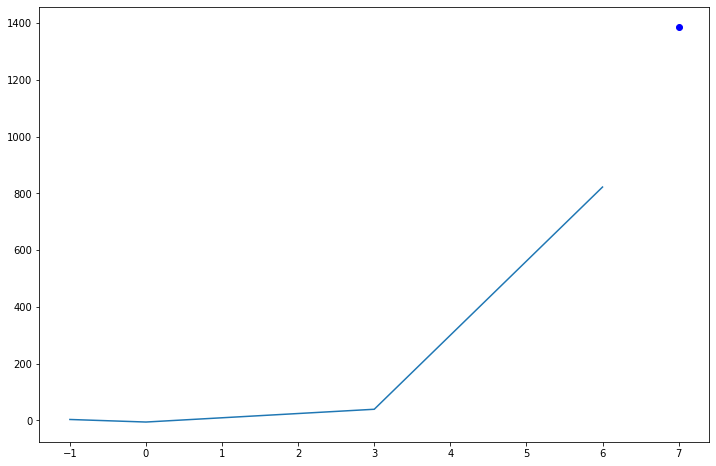

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#x = ([-1,0,3,6])
#y = ([3,-6,39,822])
data1 = np.loadtxt('data.txt')
x = data1[:,0]
y = data1[:,1]

n = len(x)
xp       = 20   #x value at which point should be interpolated
y_interp = 0
xp = 7
yp = 0
for i in range(n):
  p = 1
  for j in range(n):
    if i != j:
      p = p * (xp - x[j])/(x[i] - x[j])
  yp = yp + p * y[i]
print(xp, yp)
plt.figure(figsize = (12, 8))
plt.plot(x, y)
plt.plot(xp, yp,'bo')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt('poing.txt')
x  = data[:,0]  ;  y  = data[:,1]
N=len(x)
dy = [0]*N;
for i in range(1,N-1):
  dy[i]=(y[i+1] - y[i-1]) / (x[i+1] - x[i-1])  #central difference formula

dy[0] = dy[1] + (dy[2]-dy[1])/(x[2]-x[1])*(x[0]-x[1])
dy[N-1] = dy[N-2] + (dy[N-2]-dy[N-3])/(x[N-2]-x[N-3])*(x[N-1]-x[N-2])
plt.figure(figsize=(8,6))
plt.plot(x,y,color='grey',linewidth=2.0,label=r'$f(x)$')
plt.plot(x[:],dy,color='deeppink',linewidth=2.0,label='Central')
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15)
plt.legend(loc='upper right')


FileNotFoundError: ignored

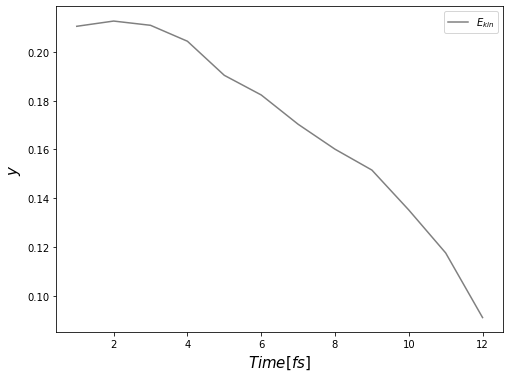

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt('deuter_sn1.txt')
x  = data[:,0]  ;  y  = data[:,1]
N=len(x)
dy = [0]*N;
for i in range(1,N-1):
  dy[i]=(y[i+1] - y[i-1]) / (x[i+1] - x[i-1])  #central difference formula
#dy[0] = dy[1] + (dy[2]-dy[1])/(x[2]-x[1])*(x[0]-x[1])
#dy[N-1] = dy[N-2] + (dy[N-2]-dy[N-3])/(x[N-2]-x[N-3])*(x[N-1]-x[N-2])
plt.figure(figsize=(8,6))
plt.plot(x,y,color='grey',linewidth=1.5,label=r'$E_{kin}$')
#plt.plot(x[:],dy,color='deeppink',linewidth=1.5,label='Central')
plt.xlabel('$Time [fs]$',fontsize=15)
plt.ylabel('$y$',fontsize=15)
plt.legend(loc='upper right')

y = 0.7943083612368029 + 0.00016891904977374674 x


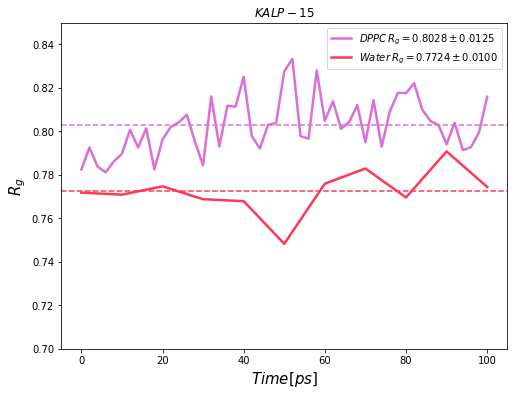

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data  = np.loadtxt('area.txt')
data1 = np.loadtxt('area1.txt')

x  = data[:,0]  ;     y  = data[:,1]
x1  = data1[:,0]  ;  y1  = data1[:,1]
#x2  = data2[:,0]  ;  y2  = data2[:,1]
sumX,sumX2,sumY,sumXY = 0,0,0,0
n  = len(x)
for i in range(n):
    sumX = sumX + x[i]
    sumX2 = sumX2 + x[i]*x[i]
    sumY = sumY + y[i]
    sumXY = sumXY + x[i]*y[i]
b = (n*sumXY-sumX*sumY)/(n*sumX2-sumX*sumX)
a = (sumY - b*sumX)/n
print('y', '=', a, '+', b,'x')
xco=np.linspace(x[0],x[-1],100)
plt.figure(figsize=(8,6))
plt.plot(x,y,color='#DA70D6',linewidth =2.5 ,label  = r'$DPPC\: R_{g}=0.8028\pm 0.0125$')
plt.plot(x1,y1,color='#FF3855',linewidth=2.5,label =  r'$Water\:R_{g}=0.7724\pm 0.0100 $')
plt.axhline(0.8028,linestyle='dashed',color='#DA70D6')
plt.axhline(0.7724,linestyle='dashed',color='#FF3855')
plt.xlabel(r'$Time[ps]$',fontsize=15)
plt.ylabel(r'$R_{g}$',fontsize=15)
#plt.xlim([3,10])
plt.title(r'$KALP-15$')
plt.ylim([0.7,0.85])
plt.legend(loc='upper right')

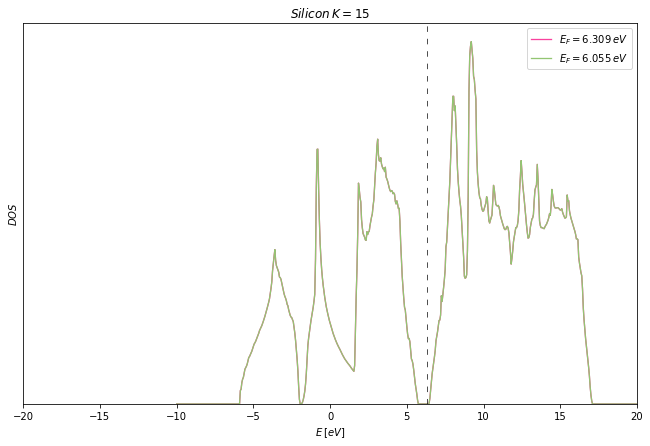

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline
energy, dos, idos = np.loadtxt('Si_bands.txt', unpack=True)
energy1, dos1, idos1 = np.loadtxt('Si_bands.txt', unpack=True)
# make plot
plt.figure(figsize = (11, 7))
plt.plot(energy, dos, linewidth=1.3, color='#F9429E',label=r'$E_{F}=6.309\:eV$')
plt.plot(energy1, dos1, linewidth=1.3, color='#93C572',label=r'$E_{F}=6.055\:eV$')
plt.yticks([]) #empty ylabel
plt.xlabel(r'$E\:[eV]$')
plt.ylabel(r'$DOS$')
plt.axvline(x=6.3090, linewidth=0.69, color='k', linestyle=(0, (8, 10)))
plt.xlim(-20.0,20.0)
plt.ylim(0, )
#plt.fill_between(energy, 0, dos, where=(energy < 6.055), facecolor='#F9429E', alpha=0.67)
#plt.fill_between(energy1, 0, dos1, where=(energy < 6.309), facecolor='#93C572', alpha=0.17)
plt.legend()
plt.title(r'$Silicon\:K=15$')
plt.show()

In [ ]:
#Akshara's plot

import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline
energy,bands = np.loadtxt('/bands.dat.gnu', unpack=True)
# make plot
plt.figure(figsize = (11, 7))
#plt.plot(energy, bands, linewidth=1.3, color='#F9429E',label=r'$E_{F}=6.309\:eV$')
plt.scatter(energy, bands-7.262,s=2.0, color='#F9429E')
#plt.yticks([]) #empty ylabel
plt.ylabel(r'$E\:[eV]$')
#plt.ylabel(r'$$')
plt.axvline(x=0.0000, linewidth=0.69, color='k', linestyle=(0, (8, 10)))
plt.axvline(x=0.5774, linewidth=0.69, color='k', linestyle=(0, (8, 10)))
plt.axvline(x=0.9107, linewidth=0.69, color='k', linestyle=(0, (8, 10)))
plt.axvline(x=1.5774, linewidth=0.69, color='k', linestyle=(0, (8, 10)))
plt.axhline(y=0)
#plt.xlim(-20.0,20.0)
plt.ylim(-5,10)
#plt.fill_between(energy, 0, dos, where=(energy < 6.055), facecolor='#F9429E', alpha=0.67)
#plt.fill_between(energy1, 0, dos1, where=(energy < 6.309), facecolor='#93C572', alpha=0.17)
plt.legend()
#plt.title(r'$Silicon\:K=15$')
plt.show()

FileNotFoundError: ignored

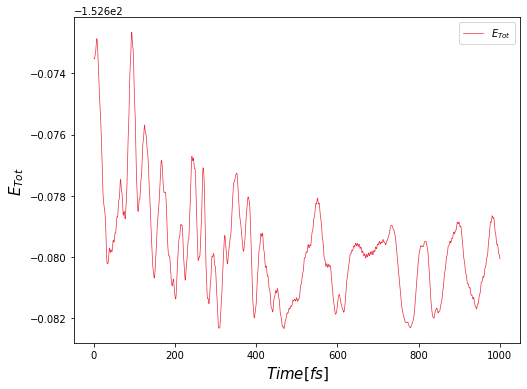

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt('/tempout.txt')
x  = data[:,1]  ;  y  = data[:,7]
N=len(x)
plt.figure(figsize=(8,6))
plt.plot(x,y,color='#ED2939',linewidth=0.69,label=r'$E_{Tot}}$')
#plt.ylim([-0.090,-0.060])
plt.xlabel('$Time [fs]$',fontsize=15)
plt.ylabel('$E_{Tot}$',fontsize=15)
plt.legend(loc='upper right')

In [ ]:
program filereader
implicit none
character(len=10),allocatable:: a(:),b(:),c(:)
real,allocatable ::p(:),q(:),x(:),y(:),z(:),k(:),l(:),d(:),m(:)
integer::N,i,num
real :: moda=0,modb=0,dot_prod=0,var
real :: veca(3),vecb(3)
N = 0
OPEN (1, file ='protein.pdb')
DO
	READ (1,*, END=10)
	N = N + 1
END DO
10 CLOSE (1)
!print*,N
allocate (a(N),p(N),b(N),c(N),q(N),x(N),y(N),z(N),k(N),l(N),d(N),m(n))  !allocate the arrays from the text file

open (unit = 1, file ='protein.pdb', status ='old')
do i = 1,N
 	read (1,*) a(i),p(i),b(i),c(i),q(i),x(i),y(i),z(i),k(i),l(i)
end do
close (1)

!File contents
!do i =1,N
!	write(*,*) x(i),y(i),z(i)
!end do
veca=(/x(1)-x(N),y(1)-y(N),z(1)-z(N)/)
vecb=(/0,0,1/)
do i =1,3
 	write(*,*) veca(i)
end do
do i=1,3
  dot_prod=dot_prod+veca(i)*vecb(i)
  moda=moda+veca(i)**2
  modb=modb+vecb(i)**2
end do

write(*,*) SQRT(moda),SQRT(modb),dot_prod
var = (dot_prod)/(SQRT(moda)*SQRT(modb))
write(*,*) var
write(*,*) ACOS(var)
do i=1,N
   d(i)=SQRT(x(i)**2+y(i)**2+z(i)**2)
end do
!mass assigner
do i=1,N
    if(b(i)=='C') then
       m(i)=12
    else if (b(i)='H') then
      m(i)=1
    end if
end do

!do i =1,N
! 	if(b(i)=='C')
! 	   m(i)=12
!end do
do i =1,N
 	!write(*,*) d(i)
 	write(*,*) m(i)
end do

do i =1,N
 	!write(*,*) d(i)
 	write(*,*) m(i)
end do



end program filereader

In [ ]:
program filereader
implicit none
character(len=10),allocatable:: a(:),b(:),c(:),d_1(n),last(:)
real,allocatable ::p(:),q(:),x(:),y(:),z(:),k(:),l(:),d(:),m(:)
integer::N,i,num
REAL ::H_m,C_m,N_m,O_m,F_m,P_m,S_m,Cl_m
real :: moda=0,modb=0,dot_prod=0,var
real :: veca(3),vecb(3)

!atomic masses
H_m  =   0.12
C_m  =   0.65
N_m  =   0.155
O_m  =   0.152
F_m  =   0.147
P_m  =   0.18
S_m  =   0.18
Cl_m =   0.175
N = 0
OPEN (1, file ='protein.pdb')
DO
	READ (1,*, END=10)
	N = N + 1
END DO
10 CLOSE (1)
!print*,N
!           c   n    c    c    c     n   n    n    n    n    n    n    n
allocate (a(N),p(N),b(N),c(N),d(n),q(N),x(N),y(N),z(N),k(N),l(N),d(N),last(n))  !allocate the arrays from the text file

open (unit = 1, file ='protein.pdb', status ='old')
do i = 1,N
 	read (1,*) a(i),p(i),b(i),c(i),d(i),q(i),x(i),y(i),z(i),k(i),l(i),last(i)
end do
close (1)

!File contents
!do i =1,N
!	write(*,*) x(i),y(i),z(i)
!end do
veca=(/x(1)-x(N),y(1)-y(N),z(1)-z(N)/)
vecb=(/0,0,1/)
do i =1,3
 	write(*,*) veca(i)
end do
do i=1,3
  dot_prod=dot_prod+veca(i)*vecb(i)
  moda=moda+veca(i)**2
  modb=modb+vecb(i)**2
end do

write(*,*) SQRT(moda),SQRT(modb),dot_prod
var = (dot_prod)/(SQRT(moda)*SQRT(modb))
write(*,*) var
write(*,*) ACOS(var)
do i=1,N
   d(i)=SQRT(x(i)**2+y(i)**2+z(i)**2)
end do

!mass assigner
do i=1,N
    if(last(i)=='C') then
      m(i) = 12.011
    elseif (last(i)=='H') then
      m(i) = 1.00784
    elseif (last(i)=='N') then
      m(i) = 14.0067
    end if
end do



do i =1,N
 	write(*,*) m(i)
end do

do i =1,N
 	write(*,*) d(i)
end do



end program filereader

In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [ ]:
print(image_data.shape)

(893, 891)


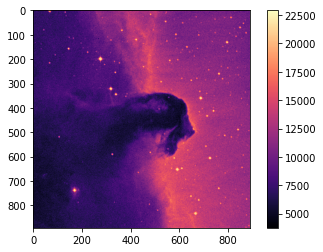

In [ ]:
plt.figure()
plt.imshow(image_data, cmap='magma')
plt.colorbar()

In [ ]:
hdu_list = fits.open(hello.fts)
hdu_list.info()

NameError: ignored

In [ ]:
from astropy.io import fits
image_file = fits.open('https://umbra.nascom.nasa.gov/pub/lasco/lastimage/level_05/221228/c3/33736995.fts')

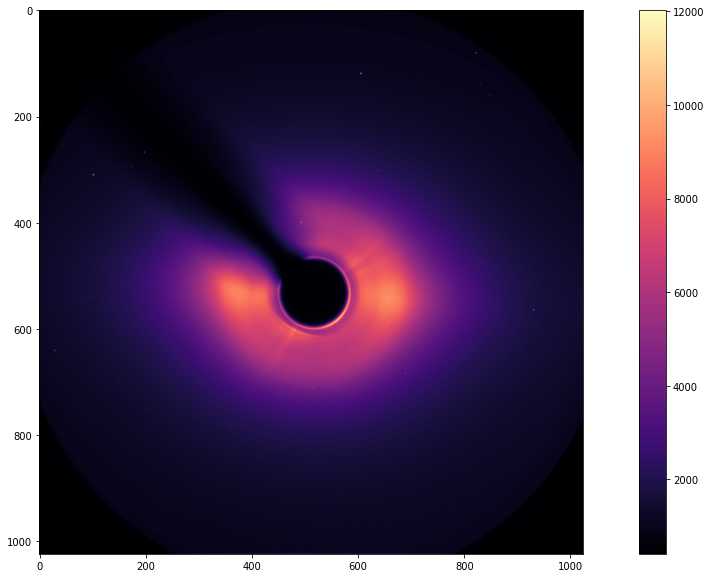

In [ ]:
image_data = image_file[0].data
plt.figure(figsize=(20,10))
plt.imshow(image_data, cmap='magma')
plt.colorbar()

#Statistical Mechanics

In [ ]:
#Oct 20,2023
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 50 by 50 grid
N = 30

In [ ]:
init_random = np.random.random((N,N)) #is also a NxN matrix that loads random numbers
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.50] =  0
lattice_n[init_random<0.50]  =  0

In [ ]:
lattice_n

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
lattice_n[0][0]=1   #select a point to have a specific value

In [ ]:
i = 0
j = 0
N = 50
lattice_n = np.zeros((N, N))
lattice_n[i][j]=1
for num in range(500):
  if((numbo >= 0.20)):
    lattice_n[i+1][j] = lattice_n[i][j]
  else:
    lattice_n[i][j+1] = lattice_n[i][j]
    #lattice_n[i][j]   = 0
plt.imshow(lattice_n,cmap='Spectral')
plt.colorbar()

NameError: ignored

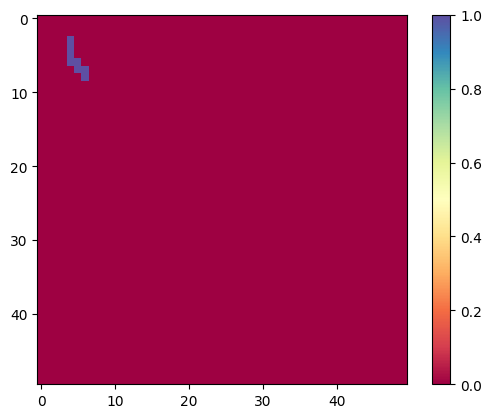

In [ ]:
I = 3
J = 4
N = 50
lattice_n = np.zeros((N, N))
lattice_n[I][J]=1

for i in range(I,N-1):
  for j in range(J,N-1):
    numbo=np.random.random(1)
    #print(numbo)
    if((numbo >= 0.20)):
      lattice_n[i+1][j] = lattice_n[i][j]
    else:
      lattice_n[i][j+1] = lattice_n[i][j]
      #lattice_n[i][j]   = 0
plt.imshow(lattice_n,cmap='Spectral')
plt.colorbar()

In [ ]:
init_random

array([[0.18830473, 0.12548696, 0.69632822, 0.0973266 , 0.86020008],
       [0.1365598 , 0.79492601, 0.14704273, 0.16603814, 0.42128328],
       [0.07424368, 0.87880108, 0.4448797 , 0.42127411, 0.65508906],
       [0.33898208, 0.2083996 , 0.60068839, 0.56512248, 0.22666455],
       [0.24299768, 0.44985409, 0.62048333, 0.03229146, 0.84543811]])

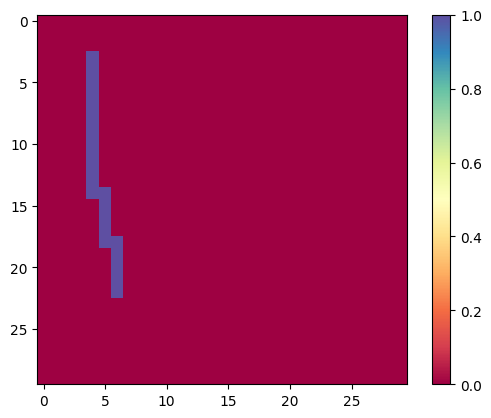

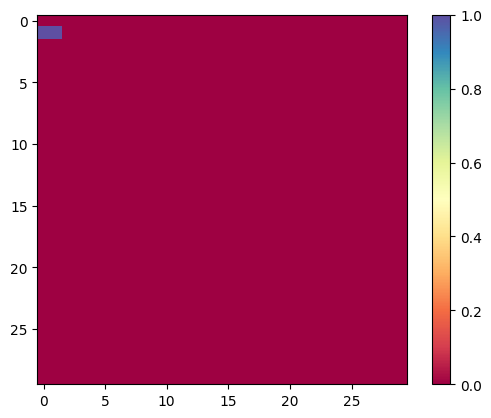

In [ ]:
plt.imshow(lattice_n,cmap='Spectral')
plt.colorbar()

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
#Ising Model
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science','notebook', 'grid'])
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [ ]:
# 50 by 50 grid
N = 50

In [ ]:
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.50] = 1
lattice_n[init_random<0.50] = -1

init_random = np.random.random((N,N))
lattice_p = np.zeros((N, N))
lattice_p[init_random>=0.25] = 1
lattice_p[init_random<0.25] = -1

In [ ]:
plt.imshow(lattice_p,cmap='Spectral')

In [ ]:
plt.imshow(lattice_n,cmap='Spectral')

In [ ]:
def get_energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1)
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()

In [ ]:
struct = generate_binary_structure(2, 1)
struct

In [ ]:
get_energy(lattice_p)

In [ ]:
@numba.njit("UniTuple(f8[:], 2)(f8[:,:], i8, f8, f8)", nopython=True, nogil=True)
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in range(0,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip

        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]

        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE

        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy

    return net_spins, net_energy

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Make an array with ones in the shape of an 'X'
a = np.eye(10,10)
a += a[::-1,:]

fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(a, interpolation='bilinear', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(a, interpolation='nearest', cmap=cm.Greys_r)

plt.show()

In [ ]:
import numpy as np
from scipy import linalg

A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

In [ ]:
linalg.inv(A)
#A.dot(linalg.inv(A)) #double check

#Quantum Mechanics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10,5000)
deltax = x[1]-x[0]

In [ ]:
def norm(phi):
    norm = np.sum(np.square(np.abs(phi)))*deltax
    return phi/np.sqrt(norm)

In [ ]:
def complex_plot(x,y,prob=True,**kwargs):
    real = np.real(y)
    imag = np.imag(y)
    a,*_ = plt.plot(x,real,label='Re',**kwargs)
    b,*_ = plt.plot(x,imag,label='Im',**kwargs)
    plt.xlim(-2,2)
    if prob:
        p,*_ = plt.plot(x,np.abs(y),label='$\sqrt{P}$')
        return a,b,p
    else:
        return a,b

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


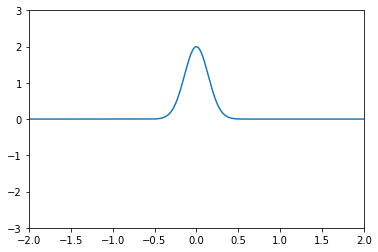

In [ ]:
def wave_packet(pos,mom,sigma):
    return norm(np.exp(-1j*mom*x)*np.exp(-np.square(x-pos)/sigma/sigma,dtype=complex))

plt.ylim([-3,3])
plt.xlim([-2,2])
plt.plot(x,wave_packet(0,0,0.2))

#Molecular Simulations

https://www.swissparam.ch/
https://gcm.upc.edu/en/members/luis-carlos/molecular-dynamics
http://chopra-modules.science.purdue.edu/class/chm579/spring2020/public/assignments/lab4/lab4a.html
https://jyhuang.idv.tw/JYH_MDSimulation.html

http://zarbi.chem.yale.edu/ligpargen/gmx_tutorial.html

http://www1.lsbu.ac.uk/water/water_models.html

https://github.com/gabrielachavez2019/Zika_MD

http://academics.wellesley.edu/Chemistry/Don/bambed/lab1.pdf

https://extras.csc.fi/chem/courses/gmx2004/exercises/

https://gaseri.org/en/tutorials/gromacs/1-tip4pew-water/#summary  this one this one

https://www2.icp.uni-stuttgart.de/~icp/mediawiki/images/d/d3/Sim_Meth_II_T2_SS_10_11.pdf

http://tubiana.me/teaching_files/biocat2020/Tutorial_Gromacs-2019.pdf

https://www.biotite-python.org/examples/gallery/structure/md_analysis.html

https://i12r-studfilesrv.informatik.tu-muenchen.de/wiki/images/5/51/MD_analysis.pdf

https://becksteinlab.physics.asu.edu/pages/courses/2013/SimBioNano/11/SimulatingLiquidArgon/gromacs_argon.html


In [ ]:
let L be a Python list of RMSD values:

import numpy
import matplotlib.pyplot as plt
# average (avg) & standard deviation (sd)
avg = numpy.average(L)
sd = numpy.std(L)
# histogram
plt.hist(L)

**Umbrella Sampling**

2BEG\
https://www.rcsb.org/structure/2BEG

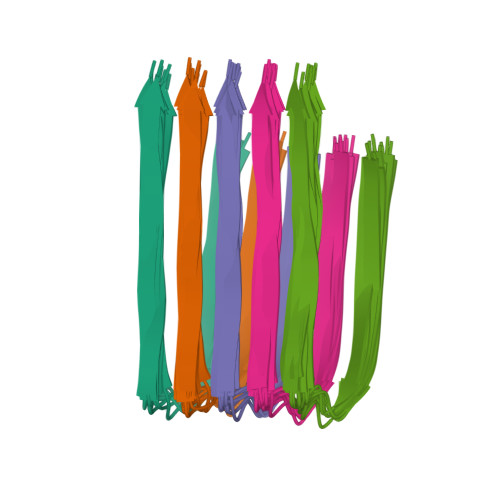

In [ ]:
gmx pdb2gmx -f 2BEG_model1_capped.pdb -ignh -ter -o complex.gro

Choose the GROMOS96 53A6 parameter set, SPC water, "None" for the N-termini, and "COO-" for the C-termini for each chain.
Modify topol_Protein_chain_B.itp to include the following lines
#ifdef POSRES_B
#include "posre_Protein_chain_B.itp"
#endif

We will be using chain B as an immobile reference later on in the pulling simulations, hence the need to specially position-restrain this chain only, and none of the others.

gmx editconf -f complex.gro -o newbox.gro -center 3.280 2.181 2.4775 -box 6.560 4.362 12

gmx solvate -cp newbox.gro -cs spc216.gro -o solv.gro -p topol.top

In [ ]:
; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep     ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0    ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01      ; Energy step size
nsteps      = 50000     ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet    ; Buffered neighbor searching
ns_type         = grid      ; Method to determine neighbor list (simple, grid)
rlist           = 1.4       ; Cut-off for making neighbor list (short range forces)
coulombtype     = cutoff    ; Treatment of long range electrostatic interactions
rcoulomb        = 1.4       ; Short-range electrostatic cut-off
rvdw            = 1.4       ; Short-range Van der Waals cut-off
pbc             = xyz       ; Periodic Boundary Conditions

In [ ]:
#Next, we will add ions using genion, utilizing this .mdp file. We are going to be conducting
#these simulations in the presence of 100 mM NaCl, on top of neutralizing counterions
gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr
gmx genion -s ions.tpr -o solv_ions.gro -p topol.top -pname NA -nname CL -neutral -conc 0.1

Select group 13 (SOL) to replace water molecules with ions.

In [ ]:
title       = NPT Equilibration
define      = -DPOSRES          ; position restrain the protein
; Run parameters
integrator  = md                ; leap-frog integrator
nsteps      = 50000             ; 2 * 50000 = 100 ps
dt          = 0.002             ; 2 fs
; Output control
nstxout     = 1000              ; save coordinates every 2 ps
nstvout     = 1000              ; save velocities every 2 ps
nstenergy   = 1000              ; save energies every 2 ps
nstlog      = 1000              ; update log file every 2 ps
; Bond parameters
continuation         = no        ; Initial simulation
constraint_algorithm = lincs     ; holonomic constraints
constraints          = all-bonds ; all bonds (even heavy atom-H bonds) constrained
lincs_iter           = 1         ; accuracy of LINCS
lincs_order          = 4         ; also related to accuracy
; Neighborsearching
ns_type     = grid              ; search neighboring grid cels
nstlist     = 5                 ; 10 fs
rlist       = 1.4               ; short-range neighborlist cutoff (in nm)
rcoulomb    = 1.4               ; short-range electrostatic cutoff (in nm)
rvdw        = 1.4               ; short-range van der Waals cutoff (in nm)
; Electrostatics
coulombtype     = PME           ; Particle Mesh Ewald for long-range electrostatics
pme_order       = 4             ; cubic interpolation
fourierspacing  = 0.16          ; grid spacing for FFT
; Temperature coupling is on
tcoupl      = Berendsen             ; Weak coupling for initial equilibration
tc-grps     = Protein   Non-Protein ; two coupling groups - more accurate
tau_t       = 0.1       0.1         ; time constant, in ps
ref_t       = 310       310         ; reference temperature, one for each group, in K
; Pressure coupling is on
pcoupl              = Berendsen     ; Pressure coupling on in NPT, also weak coupling
pcoupltype          = isotropic     ; uniform scaling of x-y-z box vectors
tau_p               = 2.0           ; time constant, in ps
ref_p               = 1.0           ; reference pressure (in bar)
compressibility     = 4.5e-5        ; isothermal compressibility, bar^-1
refcoord_scaling    = com
; Periodic boundary conditions
pbc     = xyz                   ; 3-D PBC
; Dispersion correction
DispCorr    = EnerPres          ; account for cut-off vdW scheme
; Velocity generation
gen_vel     = yes               ; Velocity generation is on
gen_temp    = 310               ; temperature for velocity generation
gen_seed    = -1                ; random seed
; COM motion removal
; These options remove COM motion of the system
nstcomm         = 10
comm-mode       = Linear
comm-grps       = System

In [ ]:
; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep     ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0    ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01      ; Energy step size
nsteps      = 50000     ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet    ; Buffered neighbor searching
ns_type         = grid      ; Method to determine neighbor list (simple, grid)
rlist           = 1.4       ; Cut-off for making neighbor list (short range forces)
coulombtype     = PME       ; Treatment of long range electrostatic interactions
rcoulomb        = 1.4       ; Short-range electrostatic cut-off
rvdw            = 1.4       ; Short-range Van der Waals cut-off
pbc             = xyz       ; Periodic Boundary Conditions

In [ ]:
gmx grompp -f minim.mdp -c solv_ions.gro -p topol.top -o em.tpr
gmx mdrun -v -deffnm em

gmx grompp -f npt.mdp -c em.gro -p topol.top -r em.gro -o npt.tpr
gmx mdrun -deffnm npt


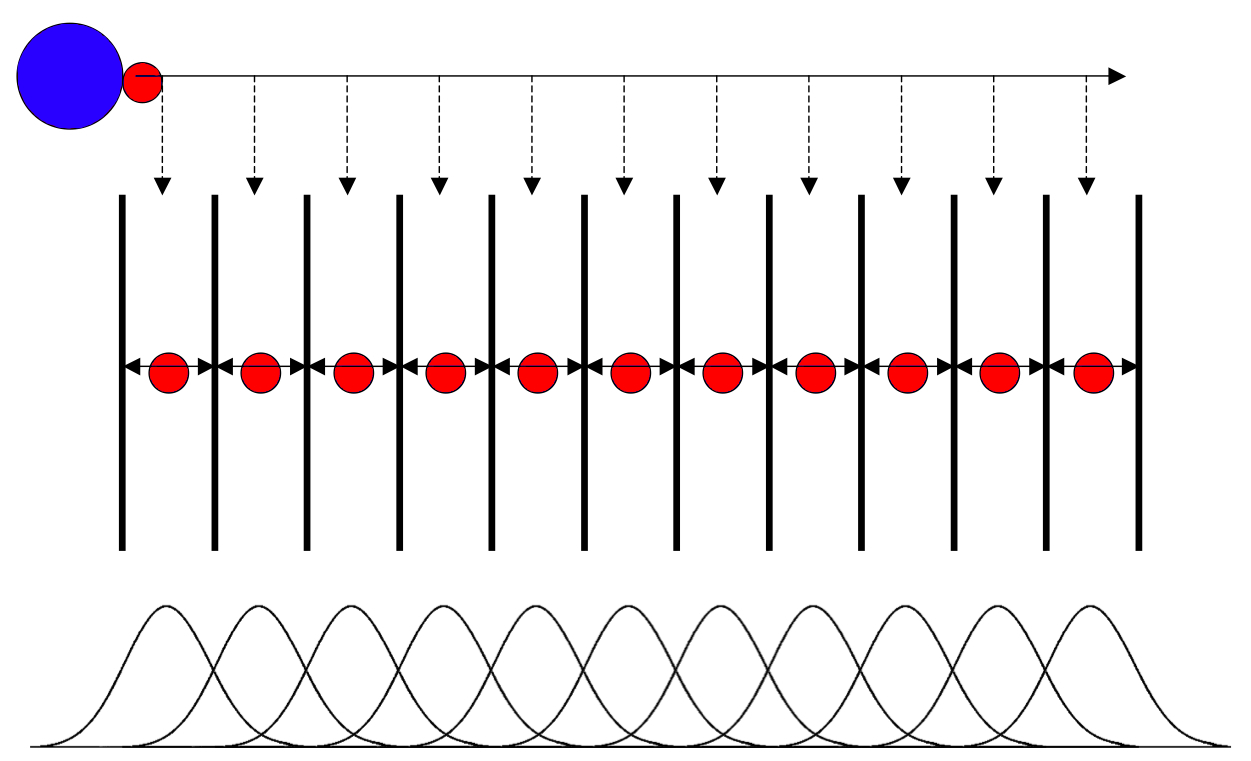

In [ ]:
title       = Umbrella pulling simulation
define      = -DPOSRES_B
; Run parameters
integrator  = md
dt          = 0.002
tinit       = 0
nsteps      = 250000    ; 500 ps
nstcomm     = 10
; Output parameters
nstxout     = 5000      ; every 10 ps
nstvout     = 5000
nstfout     = 500
nstxtcout   = 500       ; every 1 ps
nstenergy   = 500
; Bond parameters
constraint_algorithm    = lincs
constraints             = all-bonds
continuation            = yes       ; continuing from NPT
; Single-range cutoff scheme
cutoff-scheme   = Verlet
nstlist         = 20
ns_type         = grid
rlist           = 1.4
rcoulomb        = 1.4
rvdw            = 1.4
; PME electrostatics parameters
coulombtype     = PME
fourierspacing  = 0.12
fourier_nx      = 0
fourier_ny      = 0
fourier_nz      = 0
pme_order       = 4
ewald_rtol      = 1e-5
optimize_fft    = yes
; Berendsen temperature coupling is on in two groups
Tcoupl      = Nose-Hoover
tc_grps     = Protein   Non-Protein
tau_t       = 1.0       1.0
ref_t       = 310       310
; Pressure coupling is on
Pcoupl          = Parrinello-Rahman
pcoupltype      = isotropic
tau_p           = 1.0
compressibility = 4.5e-5
ref_p           = 1.0
refcoord_scaling = com
; Generate velocities is off
gen_vel     = no
; Periodic boundary conditions are on in all directions
pbc     = xyz
; Long-range dispersion correction
DispCorr    = EnerPres
; Pull code
pull                    = yes
pull_ncoords            = 1         ; only one reaction coordinate
pull_ngroups            = 2         ; two groups defining one reaction coordinate
pull_group1_name        = Chain_A
pull_group2_name        = Chain_B
pull_coord1_type        = umbrella  ; harmonic potential
pull_coord1_geometry    = distance  ; simple distance increase
pull_coord1_dim         = N N Y
pull_coord1_groups      = 1 2
pull_coord1_start       = yes       ; define initial COM distance > 0
pull_coord1_rate        = 0.01      ; 0.01 nm per ps = 10 nm per ns
pull_coord1_k           = 1000      ; kJ mol^-1 nm^-2


In [ ]:
gmx make_ndx -f npt.gro
...
 > r 1-27
 > name 19 Chain_A
 > r 28-54
 > name 20 Chain_B
 > q

In [ ]:
gmx grompp -f md_pull.mdp -c npt.gro -p topol.top -r npt.gro -n index.ndx -t npt.cpt -o pull.tpr
gmx mdrun -deffnm pull -pf pullf.xvg -px pullx.xvg

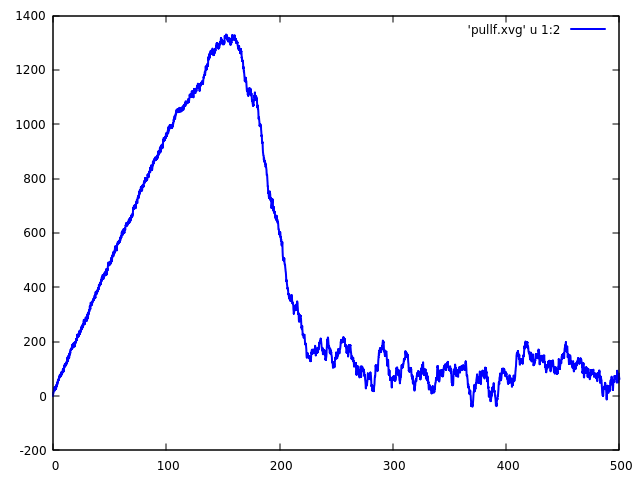

In [ ]:
echo 0 | gmx trjconv -s pull.tpr -f pull.xtc -o conf.gro -sep

# compute distances
for (( i=0; i<501; i++ ))
do
    gmx distance -s pull.tpr -f conf${i}.gro -n index.ndx -select 'com of group "Chain_A" plus com of group "Chain_B"' -oall dist${i}.xvg
done

# compile summary
touch summary_distances.dat
for (( i=0; i<501; i++ ))
do
    d=`tail -n 1 dist${i}.xvg | awk '{print $2}'`
    echo "${i} ${d}" >> summary_distances.dat
    rm dist${i}.xvg
done

exit;

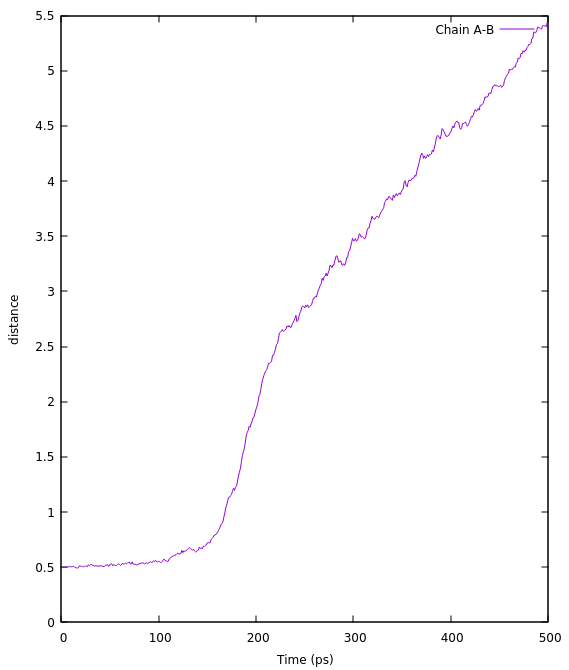

In [ ]:
gmx trjconv -s pull.tpr -f pull.xtc -o conf.gro -sep

In [ ]:
In this example, we will be sampling COM distances from 0.5 - 5.0 nm along the z-axis using roughly 0.2-nm spacing.

Creating frame-specific output for files:
run-umbrella.sh
     frame      dist    d_dist
         0     1.708        NA
        68     1.903     0.195
        92     2.106     0.202
       112     2.310     0.204
       137     2.509     0.199
       149     2.704     0.195
       170     2.905     0.201
       184     3.103     0.199
       202     3.324     0.221
       220     3.525     0.201
       241     3.717     0.191
       266     3.914     0.198
       285     4.117     0.203
       293     4.286     0.169
       310     4.481     0.195
       323     4.682     0.201
       351     4.883     0.201
       359     5.072     0.189
       378     5.272     0.200
       404     5.460     0.188
       416     5.664     0.204
       443     5.858     0.194
       478     6.060     0.202
       495     6.137     0.077


In [ ]:
gmx grompp -f npt_umbrella.mdp -c conf6.gro -p topol.top -r conf6.gro -n index.ndx -o npt0.tpr
...
gmx grompp -f npt_umbrella.mdp -c conf449.gro -p topol.top -r conf449.gro -n index.ndx -o npt22.tpr

In [ ]:
gmx mdrun -deffnm npt0
...
gmx mdrun -deffnm npt22

In [ ]:
title       = Umbrella pulling simulation
define      = -DPOSRES_B
; Run parameters
integrator  = md
dt          = 0.002
tinit       = 0
nsteps      = 5000000   ; 10 ns
nstcomm     = 10
; Output parameters
nstxout-compressed  = 5000      ; every 10 ps
nstenergy           = 5000
; Bond parameters
constraint_algorithm    = lincs
constraints             = all-bonds
continuation            = yes
; Single-range cutoff scheme
cutoff-scheme   = Verlet
nstlist         = 20
ns_type         = grid
rlist           = 1.4
rcoulomb        = 1.4
rvdw            = 1.4
; PME electrostatics parameters
coulombtype     = PME
fourierspacing  = 0.12
fourier_nx      = 0
fourier_ny      = 0
fourier_nz      = 0
pme_order       = 4
ewald_rtol      = 1e-5
optimize_fft    = yes
; Berendsen temperature coupling is on in two groups
Tcoupl      = Nose-Hoover
tc_grps     = Protein   Non-Protein
tau_t       = 1.0       1.0
ref_t       = 310       310
; Pressure coupling is on
Pcoupl          = Parrinello-Rahman
pcoupltype      = isotropic
tau_p           = 1.0
compressibility = 4.5e-5
ref_p           = 1.0
refcoord_scaling = com
; Generate velocities is off
gen_vel     = no
; Periodic boundary conditions are on in all directions
pbc     = xyz
; Long-range dispersion correction
DispCorr    = EnerPres
; Pull code
pull                    = yes
pull_ncoords            = 1         ; only one reaction coordinate
pull_ngroups            = 2         ; two groups defining one reaction coordinate
pull_group1_name        = Chain_A
pull_group2_name        = Chain_B
pull_coord1_type        = umbrella  ; harmonic potential
pull_coord1_geometry    = distance  ; simple distance increase
pull_coord1_dim         = N N Y
pull_coord1_groups      = 1 2
pull_coord1_start       = yes       ; define initial COM distance > 0
pull_coord1_rate        = 0.0       ; restrain in place
pull_coord1_k           = 1000      ; kJ mol^-1 nm^-2


In [ ]:
numbers = [1, 2, 3, 7, 9]
window_size = 3
i = 0
moving_averages = []
while i < len(numbers) - window_size + 1:
    this_window = numbers[i : i + window_size]
    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1
print(moving_averages)

[2.0, 4.0, 6.333333333333333]


In [ ]:
import matplotlib.pyplot as plt
import numpy

t,data,x,y,z = numpy.loadtxt("gyrate.xvg", unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(t,data, color="magenta", linestyle="-", alpha=0.1)
ax.plot(t,data, color="magenta", linestyle="-")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"protein $R_\mathrm{gyr}$ (nm)")

fig.savefig("rgyr.png", dpi=300)
fig.savefig("rgyr.svg")
fig.savefig("rgyr.pdf")

**Water Models RDF**

#Electronic Structure Theory

Butane
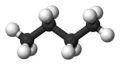


$$1 Hartree = 627.15 kcal/mol$$
$$1 Hartree = 2625.5 kJ/mol$$
$$1 Hartree = 27.2116 eV$$
$$1 Hartree = 4.3597482\times10^{-18} J/particle$$


In [ ]:
https://www.cup.uni-muenchen.de/ch/compchem/geom/basic.html

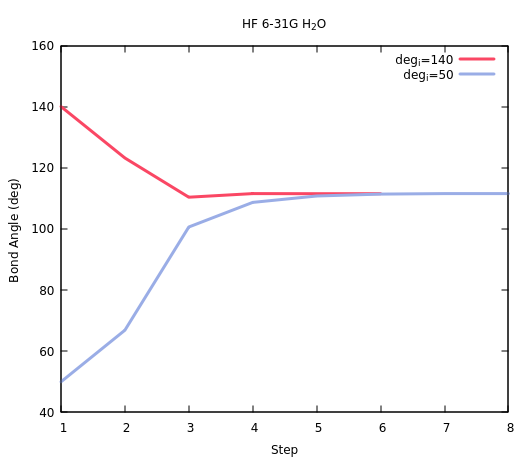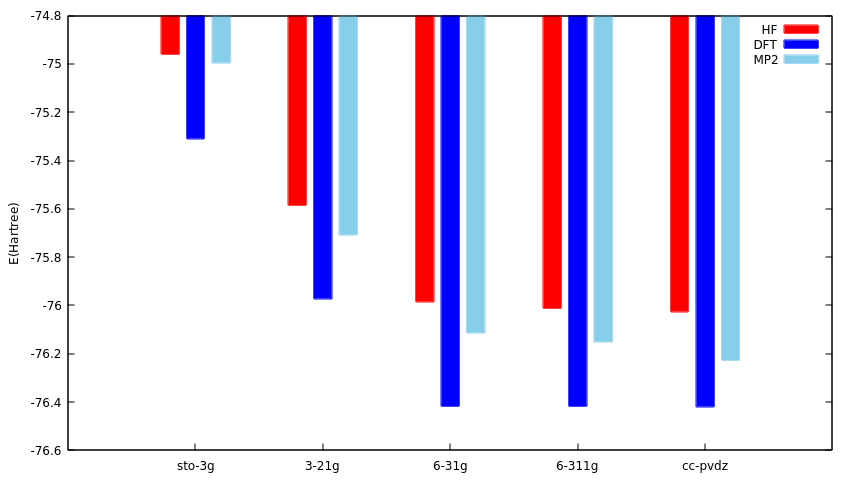

***ORCA***

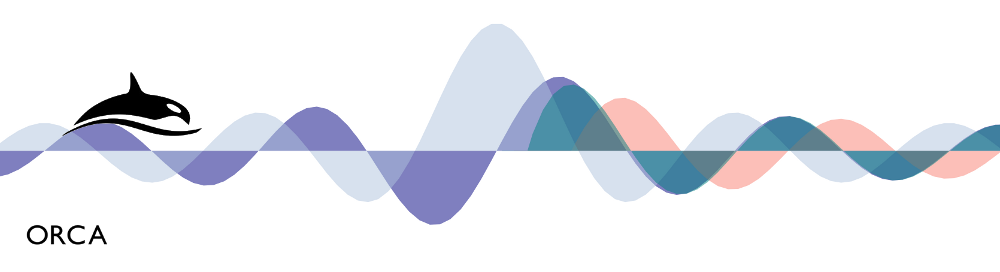

https://sites.google.com/site/orcainputlibrary/geometry-optimizations \
https://www.orcasoftware.de/tutorials_orca/first_steps/first_calc.html \

https://pc2.uni-paderborn.de/fileadmin/pc2/events/2020-02-10_Winterschool/RagnarBjornsson-Paderborn-ORCAtalk.pdf \ this one \

https://www.molphys.org/orca_tutorial_2020/en/intro_orca.html \
http://ewins2016.ijs.si/slides/tutorial-ORCA.pdf \

https://notendur.hi.is/hj/reikniefnafr/lab2.pdf \

https://pc2.uni-paderborn.de/fileadmin/pc2/events/2020-02-10_Winterschool/Brehm_ORCA_MD_2020.pdf \

https://distributedscience.wordpress.com/2019/09/03/multi-step-geometry-optimization-with-orca/ \

https://events.prace-ri.eu/event/674/attachments/618/886/Patzschke_vmd_2018.pdf \
https://www.cup.uni-muenchen.de/oc/zipse/teaching/computational-chemistry-2/topics/orca-input-files/


In [ ]:
https://www.cup.uni-muenchen.de/ch/compchem/geom/scan.html
https://www.orcasoftware.de/tutorials_orca/prop/relativistic.html
https://chemistry.stackexchange.com/questions/145967/orca-how-to-plot-an-adiabatic-potential-in-dihydrogen-h2-molecule

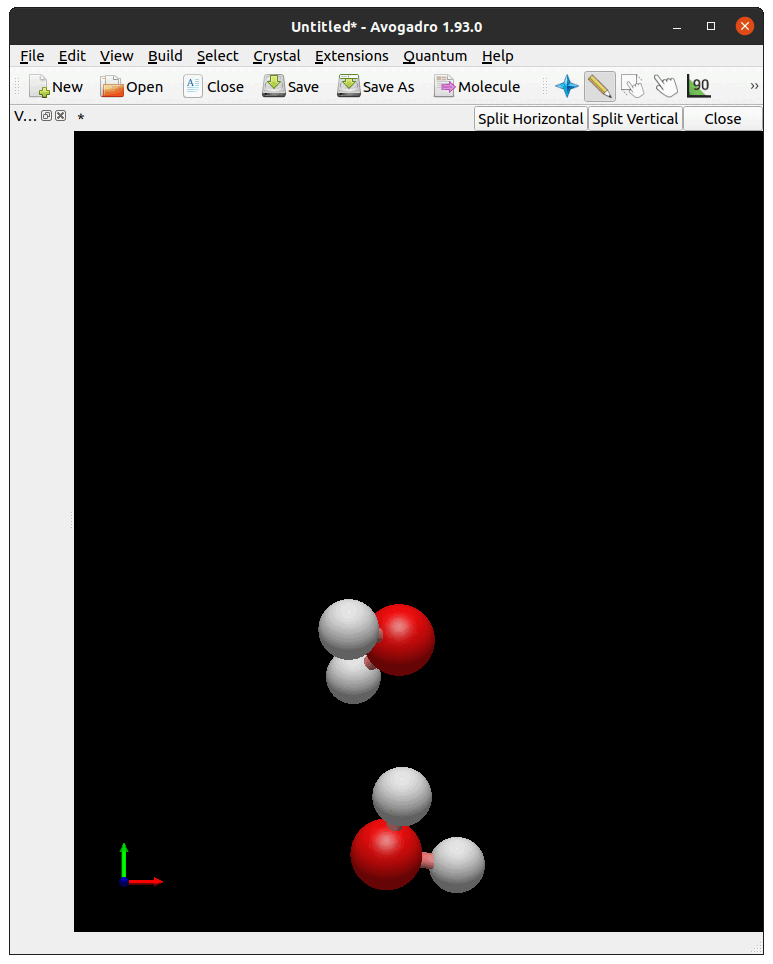

In [ ]:
!B3LYP DEF2-SVP
* xyz 0 1
O         -3.56626        1.77639        0.00000
H         -2.59626        1.77639        0.00000
H         -3.88959        1.36040       -0.81444
*

In [ ]:
Let us look at the case of the potential energy surface of the N2 molecule. We study it with three different
basis sets: TZVP, TZVPP and QZVP. The input is the following:

! RHF TZVPP CCSD(T)
%paras R= 1.05,1.13,8
end
* xyz 0 1
N 0 0 0
N 0 0 {R}
*

In [ ]:
able 8.2: Computed spectroscopic constants of N2 with coupled-cluster methods.
Method     Basis set Re (pm) ωe (cm−1) ωexe (cm−1)
CCSD(T)     SVP 111.2 2397 14.4
            TZVP 110.5 2354 14.9
            TZVPP 110.2 2349 14.1
            QZVP 110.0 2357 14.3
            ano-pVDZ 111.3 2320 14.9
            ano-pVTZ 110.5 2337 14.4

$$N_2 + 3H_2 -> 2NH_3$$

In [ ]:
!B3LYP def2-TZVP OPT FREQ
* xyz 0 1
 N                  0.09693534    0.67079829   -0.02382055
 H                  0.43025724   -0.27201480   -0.02382055
 H                  0.43027445    1.14219847    0.79267619
 H                  0.43027445    1.14219847   -0.84031728
*

In [ ]:
NH3
Electronic energy                ...    -56.54931630 Eh
Zero point energy                ...      0.03414519 Eh
N2
Electronic energy                ...   -109.52112776 Eh
Zero point energy                ...      0.00558370 Eh
H2
Electronic energy                ...     -1.17301492 Eh
Zero point energy                ...      0.01007159 Eh


21.655128530000002

In [ ]:
NH3 = -56.54931630 + 0.03414519
H2 =  -1.17301492  + 0.01007159
N2 = -109.52112776 + 0.00558370

a = -56.54931630
b =  -1.17301492
c =  -109.52112776
delH= 2*NH3-(3*H2+N2)
delH_Z=2*a-(3*b+c)
print("Heat of Reaction")
print(delH,"Hartrees")
print(delH*627.503,"kcal/mol")
print(delH*2625.5,"kJ/mol")

print("Zero Point ")
print(delH_Z,"Hartrees")
print((delH_Z)*627.503,"kcal/mol")
print((delH_Z)*2625.5,"kJ/mol")

Heat of Reaction
-0.025968170000012947 Hartrees
-16.295104579518124 kcal/mol
-68.179430335034 kJ/mol
Zero Point 
-0.058460080000003245 Hartrees
-36.68387558024204 kcal/mol
-153.4869400400085 kJ/mol


In [ ]:
B3LYP 6-311+G**
N2 =  -109.507+0.0055
H2 =  -1.1729+0.01006
NH3 = -56.546+0.0342
delH= 2*NH3-(3*H2+N2)
print("Heat of Reaction")
print(delH,"Hartrees")
print(delH*627.503,"kcal/mol")
print(delH*2625.5,"kJ/mol")

Heat of Reaction
-0.03358000000000061 Hartrees
-21.071550740000383 kcal/mol
-88.1642900000016 kJ/mol


In [ ]:
#B3LYP def2 TZVP
N2 =  -109.51223932
H2 =  -1.15963867
NH3 = -56.51135620

In [ ]:
#B3LYP def2 TZVP
CH4 = -40.45331165
H2  = -1.15963845
H2O = -76.40112668
CO  = -113.30200278

delH= (CO+3*H2)-(CH4+H2O)
print("Heat of Reaction")
print(delH,"Hartrees")
print(delH*627.503,"kcal/mol")
print(delH*2625.5,"kJ/mol")

Heat of Reaction
0.07352020000001858 Hartrees
46.13414606061166 kcal/mol
193.02728510004877 kJ/mol


#DFT
https://qs3.mit.edu/images/pdf/theory_slides_web_Giustino.pdf \
http://www.esqc.org/lectures/ESQC17-Neese-Lecture2-Approximations.pdf \
https://pc2.uni-paderborn.de/fileadmin/pc2/events/2020-02-10_Winterschool/Pantazis_DFT-BasisSets.pdf \


#Solid State Physics

**Carbon Nanotubes**
https://turin.nss.udel.edu/research/tubegenonline.html \
https://sites.google.com/site/cntcomposites/structure-of-cnts \
https://journals.sagepub.com/doi/pdf/10.1177/096369351302200602

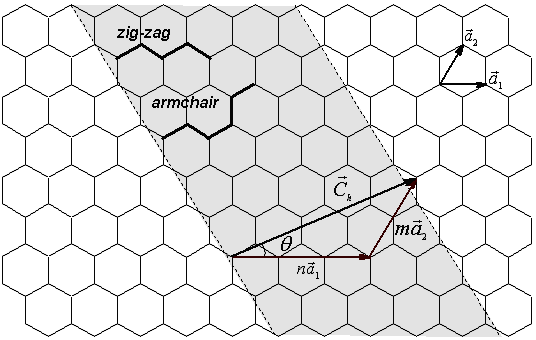

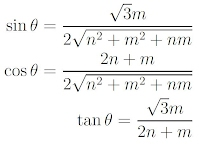

# Matplotlib pratice


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#27Feb 2023
krish=[49,45,20,40,40,30]
piyush=[25,25,30,25]
kavita=[39,35]
a=np.sum(krish)+np.sum(piyush)+np.sum(kavita)
print(a/3)
print((a/3)-np.sum(krish))
print((a/3)-np.sum(piyush))
print((a/3)-np.sum(kavita))

134.33333333333334
-89.66666666666666
29.333333333333343
60.33333333333334


In [ ]:
import matplotlib.pyplot as plt
import numpy as np



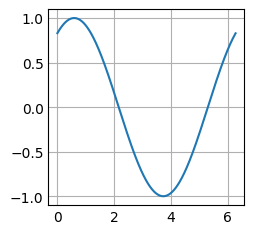

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,
ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

plt.show()


In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

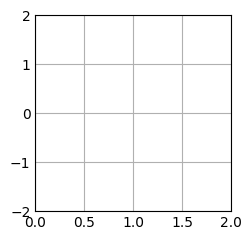

In [ ]:
#First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [ ]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=20, blit=True)
#HTML(anim.to_html5_video())

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
anim

In [ ]:
!brew install imagemagick

/bin/bash: brew: command not found


In [ ]:
anim.save('animation.gif', writer='imagemagick', fps=60)

Enter bob mass [kg]                      : 10
Enter length of pendulum [m]             : 3
Enter acceleration due to gravity [ms^-2]: 9.8
Enter intial angle [deg]                 : 50


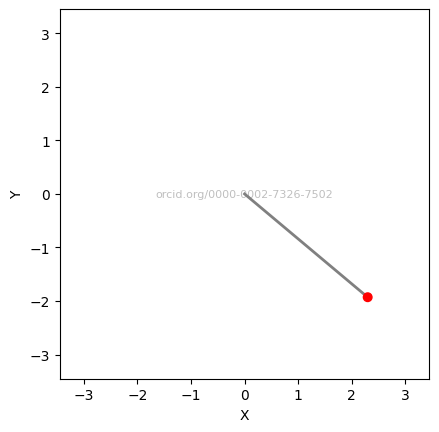

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

m     = float(input('Enter bob mass [kg]                      : '))# kg(bob mass)
L     = float(input('Enter length of pendulum [m]             : '))# m (pendulum length)
g     = float(input('Enter acceleration due to gravity [ms^-2]: '))# ms^{-2}
ang   = float(input('Enter intial angle [deg]                 : '))# Angle [deg]
#deg to rad (initial angular displacement)
angle_0 = np.radians(ang)

#Should we take these values from the user as well?
v_0       = 0              # m/s (tangential vel)
step      = 0              # starting simulation time step
dt        = 0.01           # time step for integration calculation
angle     = [angle_0]      # prepare array for angle data
v         = [v_0]          # prepare array for vel data
angle_old = angle_0

# Period calculation
T = 2 * np.pi * np.sqrt(L / g)

while 1==1:
    step += 1
    t = step * dt

    angle_old, v_old = angle[-1], v[-1]
    arc_length = v_old * dt
    angle_change = arc_length/L
    angle_new = angle_old - angle_change

    acc = -g * np.sin(angle_old)
    v_new = v_old - acc * dt

    if t > T:
        # end
        break


    #fill arrays
    angle.append(angle_new)
    v.append(v_new)

#intial values
x0 = L * np.sin(angle_old)
y0 = -L * np.cos(angle_old)

fig, ax = plt.subplots()
ax.set_xlim(-L*1.15, L*1.15)
ax.set_ylim(-L*1.15, L*1.15)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
ax.text(0.5, 0.5, 'orcid.org/0000-0002-7326-7502', transform=ax.transAxes, fontsize=8, color='gray', alpha=0.5, ha='center', va='center', rotation=0)
graph = ax.plot([0, x0], [0, y0], lw=2, color='grey')[0]

bob = ax.add_patch(plt.Circle((x0,y0), 0.08,color='red', zorder=2))

def animate(frame_i):
    x, y = L * np.sin(angle[frame_i]), -L * np.cos(angle[frame_i])
    graph.set_data([0, x], [0, y])
    bob.set_center((x, y))

anim = FuncAnimation(fig,
                    animate,
                    frames=len(angle),
                    interval=2,
                    repeat=True,
                    )

#anim.save(r'1pendulum.mp4')
anim.save('1pendulum.gif', writer='PillowWriter', fps=40)
#plt.show()

# Raman Spectrum

In [ ]:
# Loading the required packages:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import savgol_filter, general_gaussian
import sklearn.linear_model as linear_model

In [ ]:
def Gauss(x, mu, sigma, A = 1):
    # This def returns the Gaussian function of x
    # x is an array
    # mu is the expected value
    # sigma is the square root of the variance
    # A is a multiplication factor
    gaussian = A/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

    return gaussian

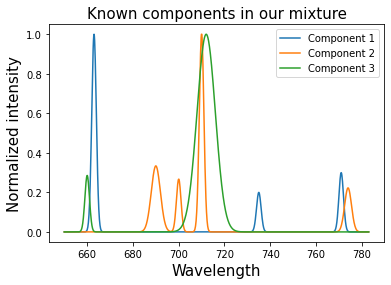

In [ ]:
# X-axis (Wavelengths)
x_range =  np.linspace(650, 783, 1024)

# Let's create three different components

# Component A
mu_a1 = 663
sigma_a1 = 1
intensity_a1 = 1

mu_a2 = 735
sigma_a2 = 1
intensity_a2 = 0.2

mu_a3 = 771
sigma_a3 = 1
intensity_a3 = 0.3

gauss_a =  Gauss(x_range, mu_a1, sigma_a1, intensity_a1) + Gauss(x_range, mu_a2, sigma_a2, intensity_a2) + Gauss(x_range, mu_a3, sigma_a3, intensity_a3)

# Component B
mu_b = 700
sigma_b = 1
intensity_b = 0.2

mu_b1 = 690
sigma_b1 = 2
intensity_b1 = 0.5

mu_b2 = 710
sigma_b2 = 1
intensity_b2 = 0.75

mu_b3 = 774
sigma_b3 = 1.5
intensity_b3 = 0.25

gauss_b = Gauss(x_range, mu_b, sigma_b, intensity_b) + Gauss(x_range, mu_b1, sigma_b1, intensity_b1) + Gauss(x_range, mu_b2, sigma_b2, intensity_b2) + Gauss(x_range, mu_b3, sigma_b3, intensity_b3)

# Component C
mu_c1 = 660
sigma_c1 = 1
intensity_c1 = 0.05

mu_c2 = 712
sigma_c2 = 4
intensity_c2 = 0.7

gauss_c = Gauss(x_range, mu_c1, sigma_c1, intensity_c1) + Gauss(x_range, mu_c2, sigma_c2, intensity_c2)

# Component normalization
component_a = gauss_a/np.max(gauss_a)
component_b = gauss_b/np.max(gauss_b)
component_c = gauss_c/np.max(gauss_c)

# How do they look?
plt.plot(x_range, component_a, label = 'Component 1')
plt.plot(x_range, component_b, label = 'Component 2')
plt.plot(x_range, component_c, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()


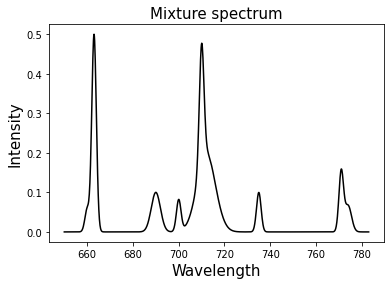

In [ ]:
# What concentrations we want these components to have in our mixture:
c_a = 0.5
c_b = 0.3
c_c = 0.2

comps = np.array([c_a, c_b, c_c])

# Let's build the spectrum to be studied: The mixture spectrum
mix_spectrum = c_a * component_a + c_b * component_b + c_c *component_c

# How does it look?
plt.plot(x_range, mix_spectrum, color = 'black', label = 'Mixture spectrum with noise')
plt.title('Mixture spectrum', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.show()

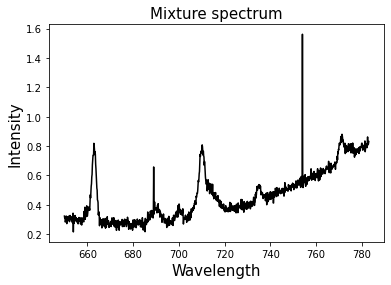

In [ ]:
# Let's add some noise for a bit of realism:

# Random noise:
mix_spectrum = mix_spectrum +  np.random.normal(0, 0.02, len(x_range))

# Spikes:
mix_spectrum[800] = mix_spectrum[800] + 1
mix_spectrum[300] = mix_spectrum[300] + 0.3

# Baseline as a polynomial background:
poly = 0.2 * np.ones(len(x_range)) + 0.0001 * x_range + 0.000051 * (x_range - 680)**2
mix_spectrum = mix_spectrum + poly

# How does it look now?
plt.plot(x_range, mix_spectrum, color = 'black', label = 'Mixture spectrum with noise')
plt.title('Mixture spectrum', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.show()

In [ ]:
# The next function calculates the modified z-scores of a diferentiated spectrum

def modified_z_score(ys):
    ysb = np.diff(ys) # Differentiated intensity values
    median_y = np.median(ysb) # Median of the intensity values
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ysb]) # median_absolute_deviation of the differentiated intensity values
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ysb] # median_absolute_deviationmodified z scores
    return modified_z_scores

# The next function calculates the average values around the point to be replaced.
def fixer(y,ma):
    threshold = 7 # binarization threshold
    spikes = abs(np.array(modified_z_score(y))) > threshold
    y_out = y.copy()
    for i in np.arange(len(spikes)):
        if spikes[i] != 0:
            w = np.arange(i-ma,i+1+ma)
            we = w[spikes[w] == 0]
            y_out[i] = np.mean(y[we])
    return y_out

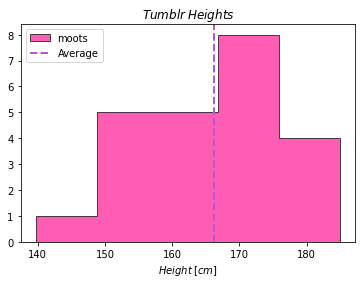

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n=5
x1 = [172.72,180.34,180.34,167.64,139.7,165.1,160.02,170.18,175,158,170,177.8,173,155,157.48,185,154.95,157.48,157.48,167.64,162.65,165,170.18]
aver = np.sum(x1)/len(x1)
#plt.xlim([4,9])
plt.xlabel(r'$Height\:[cm]$')
plt.title(r'$Tumblr\:Heights$')
plt.hist(x1,histtype='stepfilled',color='deeppink',alpha=0.69,edgecolor='black', bins=n,label='moots')
plt.axvline(aver,color='mediumorchid',linestyle='dashed',linewidth=2.0, label='Average')

plt.legend()

Master Thesis

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
#data=np.loadtxt('POTENTIAL')
x, y, z = np.loadtxt('POTENTIAL', unpack=True)
#x  = data[:,0]  ;  y  = data[:,1]

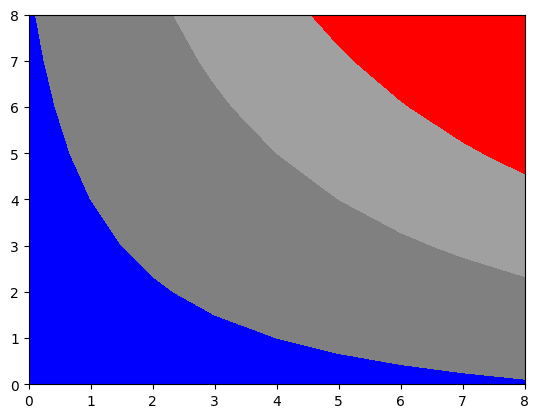

In [ ]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

In [ ]:
#!/usr/bin/python3
from math import exp
# RHS of differential equation to integrate
lam=0.5
def f(y):
    return lam*y
# Function to perform Adams-Bashforth integration over the range 0<=t<=2, and
# evaluate error
def ad_bash(n):
    # Calculate timestep size
    h=2./n
    # Initialize two values to exactly match solution
    y=[1,exp(lam*h)]
    # Perform (n-1) Adams-Bashforth updates
    for i in range(n-1):
        yy=y[1]+h*(1.5*f(y[1])-0.5*f(y[0]))
        y[0]=y[1]
        y[1]=yy
    # Return error between numerical result and exact solution
    return y[1]-exp(lam*2)
# Evaluate error for different numbers of timesteps
n=1
while n<=65536:
    # Print the number of timesteps, the timestep size, and the error
    print(n,2./n,ad_bash(n))
    # Double the number of timesteps
    n*=2

1 2.0 0.0
2 1.0 -0.08301960473382097
4 0.5 -0.04240417948572217
8 0.25 -0.014066005429220763
16 0.125 -0.0039727858906677405
32 0.0625 -0.0010500882408934764
64 0.03125 -0.0002695588441348207
128 0.015625 -6.826236436152655e-05
256 0.0078125 -1.7174164563815708e-05
512 0.00390625 -4.30707869680802e-06
1024 0.001953125 -1.0784596593538254e-06
2048 0.0009765625 -2.698260175293399e-07
4096 0.00048828125 -6.748288861047058e-08
8192 0.000244140625 -1.6874005304146067e-08
16384 0.0001220703125 -4.218945637290972e-09
32768 6.103515625e-05 -1.0547713813480186e-09
65536 3.0517578125e-05 -2.6372193318024983e-10


In [ ]:
# Import pandas
import pandas as pd
# Read TSV file into DataFrame
#df = pd.read_table('trial.csv')
df = pd.read_table('this.tsv', usecols =['Allele ID','Allele Symbol','Variant Consequence'])
print(df)

          Allele ID                Allele Symbol  \
0      rs1033057482  NC_000001.11:g.241579748T>C   
1       rs907717679  NC_000001.11:g.241578051T>A   
2      rs1042281874  NC_000001.11:g.241589834C>T   
3      rs1034751286  NC_000001.11:g.241581773T>C   
4      rs1456472184  NC_000001.11:g.241581091T>C   
...             ...                          ...   
14395   rs552838410  NC_000001.11:g.241592567T>C   
14396    rs79502042  NC_000001.11:g.241532498G>T   
14397    rs76387396  NC_000001.11:g.241555654T>C   
14398   rs767498478  NC_000001.11:g.241562281G>C   
14399  rs1238320553  NC_000001.11:g.241594974C>T   

                                     Variant Consequence  
0           intron_variant|non_coding_transcript_variant  
1           intron_variant|non_coding_transcript_variant  
2                                         intron_variant  
3           intron_variant|non_coding_transcript_variant  
4           intron_variant|non_coding_transcript_variant  
...                  

In [ ]:
df.to_csv("trial.csv")

In [ ]:
hello=df.loc[df['Allele ID'].isin(['rs10926510',
'rs10926513',
'rs10926514',
'rs113249571'])]

In [ ]:
pip install nltk

In [ ]:
nltk.download()

NameError: ignored

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
word_stemmer = PorterStemmer()

In [ ]:
word_stemmer.stem('Drawing')

'draw'

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize('Hydrogen formation in interstellar dust grains')

LookupError: ignored

In [ ]:
import pandas as pd
import materialsproject as mp

# Create a list of materials
materials = ["LiFePO4", "NaCl", "SiO2"]

# Create a DataFrame
df = pd.DataFrame(columns=["Material ID", "Formula", "Structure", "Band gap", "Elastic constants", "Thermal conductivity", "Electrical conductivity", "Magnetic properties", "Surface energy", "Hardness", "Young's modulus"])

# Fill the DataFrame with data from the Materials Project
for material in materials:
    data = mp.get_data(material)
    df.loc[len(df)] = [data["material_id"], data["formula"], data["structure"], data["band_gap"], data["elastic_constants"], data["thermal_conductivity"], data["electrical_conductivity"], data["magnetic_properties"], data["surface_energy"], data["hardness"], data["young_s_modulus"]]

# Print the DataFrame
print(df)


ModuleNotFoundError: ignored

In [ ]:
21 Aug 2023

In [ ]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.0 MB/s eta 0:00:00
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [ ]:
#Aug 23 2023
class Robot:
  def __init__(self,name,color,weight):  #Constructor
    self.name   = name
    self.color  = color
    self.weight = weight

  def introduce_self(self):
    print("My name is " + self.name)

In [ ]:
#Select and press Ctrl + /
# r1 = Robot()   #Create a new object
# r1.name   = 'Tom'  #Attributes
# r1.color  = 'red'
# r1.weight = 30

# r2 = Robot()
# r2.name   = 'Jerry'
# r2.color  = 'red'
# r2.weight = 40

r1 = Robot("Tom","red",30)
r2 = Robot("Jerry","blue",40)

In [ ]:
r1.introduce_self()
r2.introduce_self()

My name is Tom
My name is Jerry


In [ ]:
#Aug 27,2023

In [ ]:
#Greg Winther ODE Solvers
import numpy as np

class ODESolver:
  """ODEsolver superclass
  ODE:
  u' = f(u,t) , u(0)= U_0

  """
  def __init__(self, f):
    self.f = f
  def set_initial_conditions(self, U0):
    if isinstance(U0, (int, float)):
      #Scalar ODE
      self.number_of_eqns = 1
      U0 = float(U0)
    else:
      #System of Equations
      U0 = np.asarray(U0)
      self.number_of_eqns = U0.size
    self.U0 = U0

  def solve(self, time_points):
    self.t = np.asarray(time_points)
    n = self.t.size

    self.u = np.zeros((n,self.number_of_eqns))
    self.u[0,:] = self.U0

    #Integrate
    for i in range(n-1):
      self.i = i
      self.u[i+1] = self.advance()

    return self.u,self.t

    def advance(self):
      """Advance solution one time step"""
      raise NotImplementedError

class ForwardEuler(ODESolver):

  def advance(self):
    u, f, i, t = self.u, self.f, self.i, self.t
    dt = t[i+1]-t[i]
    return u[i,:] + dt*f(u[i,:],t[i])


class RungeKutta4(ODESolver):

  def advance(self):
    u, f, i, t = self.u, self.f, self.i, self.t
    dt  = t[i+1]-t[i]
    dt2 = dt / 2
    K1 =  dt*f(u[i,:],t[i])
    K2 =  dt*f(u[i,:]+ 0.5 * K1,t[i]+dt2)
    K3 =  dt*f(u[i,:]+ 0.5 * K2,t[i]+dt2)
    K4 =  dt*f(u[i,:]+ K3,t[i]+dt)
    return u[i,:]+(1/6)*(K1+2*K2+2*K3+K4)




In [ ]:
import numpy as np
from matplotlib import pyplot as plt

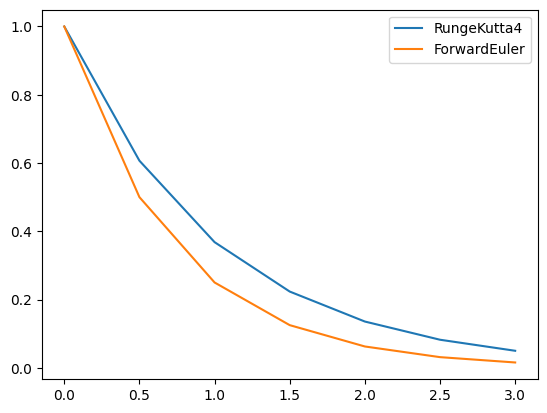

In [ ]:
from matplotlib.legend import time
def f(u, t):
  return -u

T = 3
dt =0.5
n =int(round(T/dt))
time_points = np.linspace(0,T,n+1)

for solver_class in [RungeKutta4, ForwardEuler]:
  solver = solver_class(f)
  solver.set_initial_conditions(1)
  u, t = solver.solve(time_points)
  plt.plot(t, u,label=solver_class.__name__)

plt.plot
plt.legend()



```
# This is formatted as code
```



In [ ]:
#31 Aug 2023
#NumPy Broadcasting

import numpy as np

array1 = np.array([1,2,3])
array2 = np.array([[1],[2],[3]])

sum= array1+array2

print(sum)

[[2 3 4]
 [3 4 5]
 [4 5 6]]


y = 3.00000 * x + 3.00000


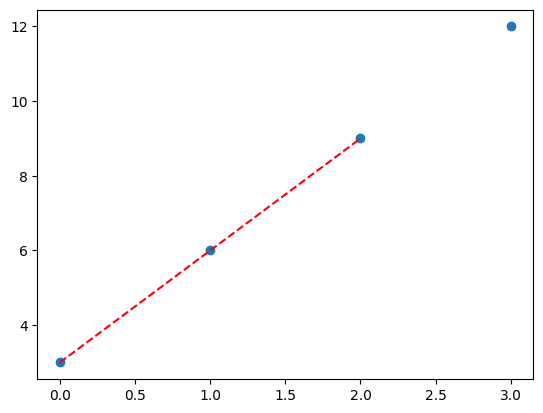

In [ ]:
# fit a straight line to the economic data
from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b):
	return a * x + b
# load the dataset
# choose the input and output variables
#x, y = data[:, 4], data[:, -1]
x =[0,1,2,3];y=[3,6,9,12]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

##VASP calculations

In [ ]:
!pip install py4vasp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.2/809.2 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.3/380.3 kB 26.8

In [ ]:
import py4vasp
my_calc = py4vasp.Calculation.from_path("./e04_O2-bond")
my_calc.structure.print()